In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer

In [2]:
# Configure pandas to display all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('House_price.csv')

In [4]:
df.head(20)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0    1          60       RL         65.0     8450   Pave   NaN      Reg   
1    2          20       RL         80.0     9600   Pave   NaN      Reg   
2    3          60       RL         68.0    11250   Pave   NaN      IR1   
3    4          70       RL         60.0     9550   Pave   NaN      IR1   
4    5          60       RL         84.0    14260   Pave   NaN      IR1   
5    6          50       RL         85.0    14115   Pave   NaN      IR1   
6    7          20       RL         75.0    10084   Pave   NaN      Reg   
7    8          60       RL          NaN    10382   Pave   NaN      IR1   
8    9          50       RM         51.0     6120   Pave   NaN      Reg   
9   10         190       RL         50.0     7420   Pave   NaN      Reg   
10  11          20       RL         70.0    11200   Pave   NaN      Reg   
11  12          60       RL         85.0    11924   Pave   NaN      IR1   
12  13          20       RL          NaN    12968   Pave   NaN      IR2   
13  14          20       RL         91.0    10652   Pave   NaN      IR1   
14  15          20       RL          NaN    10920   Pave   NaN      IR1   
15  16          45       RM         51.0     6120   Pave   NaN      Reg   
16  17          20       RL          NaN    11241   Pave   NaN      IR1   
17  18          90       RL         72.0    10791   Pave   NaN      Reg   
18  19          20       RL         66.0    13695   Pave   NaN      Reg   
19  20          20       RL         70.0     7560   Pave   NaN      Reg   

   LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1          Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3          Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4          Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
5          Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
6          Lvl    AllPub    Inside       Gtl      Somerst       Norm   
7          Lvl    AllPub    Corner       Gtl       NWAmes       PosN   
8          Lvl    AllPub    Inside       Gtl      OldTown     Artery   
9          Lvl    AllPub    Corner       Gtl      BrkSide     Artery   
10         Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
11         Lvl    AllPub    Inside       Gtl      NridgHt       Norm   
12         Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
13         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
14         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
15         Lvl    AllPub    Corner       Gtl      BrkSide       Norm   
16         Lvl    AllPub   CulDSac       Gtl        NAmes       Norm   
17         Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
18         Lvl    AllPub    Inside       Gtl      SawyerW       RRAe   
19         Lvl    AllPub    Inside       Gtl        NAmes       Norm   

   Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0        Norm     1Fam     2Story            7            5       2003   
1        Norm     1Fam     1Story            6            8       1976   
2        Norm     1Fam     2Story            7            5       2001   
3        Norm     1Fam     2Story            7            5       1915   
4        Norm     1Fam     2Story            8            5       2000   
5        Norm     1Fam     1.5Fin            5            5       1993   
6        Norm     1Fam     1Story            8            5       2004   
7        Norm     1Fam     2Story            7            6       1973   
8        Norm     1Fam     1.5Fin            7            5       1931   
9      Artery   2fmCon     1.5Unf            5            6       1939   
10       Norm     1Fam     1Story            5            5       1965   
11       Norm     1Fam     

In [5]:
df.shape

(1460, 81)

In [6]:
df = df.drop(columns=['Id'])

In [7]:
df.isnull().sum()*100/1460

MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType       59.726027
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
BsmtUnfSF         0.000000
T

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [9]:
df.duplicated().sum()

0

In [10]:
# Select only categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# Iterate over categorical columns and print value counts
for column in categorical_columns:
    print(f"Value counts for column '{column}':")
    print(df[column].value_counts())
    print("\n")  # Add a newline for better readability

Value counts for column 'MSZoning':
MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64


Value counts for column 'Street':
Street
Pave    1454
Grvl       6
Name: count, dtype: int64


Value counts for column 'Alley':
Alley
Grvl    50
Pave    41
Name: count, dtype: int64


Value counts for column 'LotShape':
LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: count, dtype: int64


Value counts for column 'LandContour':
LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: count, dtype: int64


Value counts for column 'Utilities':
Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64


Value counts for column 'LotConfig':
LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: count, dtype: int64


Value counts for column 'LandSlope':
LandSlope
Gtl    1382
Mod      65
Sev      13
Name: count, dtype: int64


Value counts for column 'Neighborhood':
Neighbor

# missing value imputation

In [12]:
for i in df.columns:
    if df[i].isnull().sum() != 0:
        print(i ,' : ',df[i].isnull().sum(),' : [',df[i].isnull().sum()*100/1460,'%]',)

LotFrontage  :  259  : [ 17.73972602739726 %]
Alley  :  1369  : [ 93.76712328767124 %]
MasVnrType  :  872  : [ 59.726027397260275 %]
MasVnrArea  :  8  : [ 0.547945205479452 %]
BsmtQual  :  37  : [ 2.5342465753424657 %]
BsmtCond  :  37  : [ 2.5342465753424657 %]
BsmtExposure  :  38  : [ 2.6027397260273974 %]
BsmtFinType1  :  37  : [ 2.5342465753424657 %]
BsmtFinType2  :  38  : [ 2.6027397260273974 %]
Electrical  :  1  : [ 0.0684931506849315 %]
FireplaceQu  :  690  : [ 47.26027397260274 %]
GarageType  :  81  : [ 5.5479452054794525 %]
GarageYrBlt  :  81  : [ 5.5479452054794525 %]
GarageFinish  :  81  : [ 5.5479452054794525 %]
GarageQual  :  81  : [ 5.5479452054794525 %]
GarageCond  :  81  : [ 5.5479452054794525 %]
PoolQC  :  1453  : [ 99.52054794520548 %]
Fence  :  1179  : [ 80.75342465753425 %]
MiscFeature  :  1406  : [ 96.3013698630137 %]


## LotFrontage

In [14]:
df['LotFrontage'].value_counts()

LotFrontage
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
65.0      44
85.0      40
78.0      25
21.0      23
90.0      23
68.0      19
64.0      19
24.0      19
73.0      18
55.0      17
63.0      17
79.0      17
72.0      17
100.0     16
66.0      15
74.0      15
51.0      15
52.0      14
59.0      13
82.0      12
71.0      12
67.0      12
43.0      12
40.0      12
57.0      12
76.0      11
69.0      11
92.0      10
34.0      10
53.0      10
86.0      10
88.0      10
84.0       9
35.0       9
62.0       9
44.0       9
77.0       9
93.0       8
98.0       8
96.0       8
61.0       8
95.0       7
58.0       7
120.0      7
107.0      7
94.0       6
81.0       6
36.0       6
30.0       6
48.0       6
91.0       6
41.0       6
54.0       6
89.0       6
110.0      6
105.0      6
32.0       5
47.0       5
87.0       5
56.0       5
37.0       5
83.0       5
102.0      4
42.0       4
49.0       4
104.0      3
103.0      3
99.0       3
45.0       3
108.0      3
130.0      3


<Axes: xlabel='LotFrontage', ylabel='Density'>

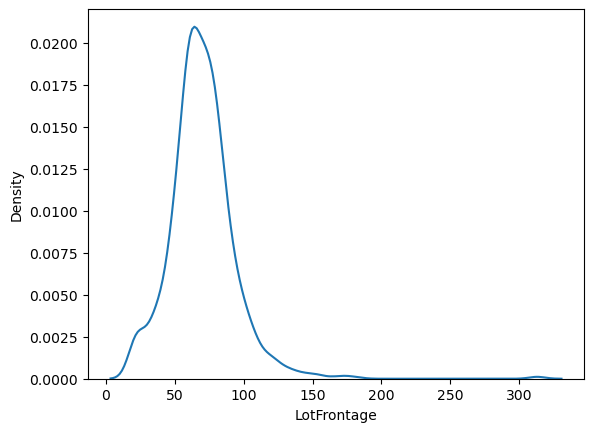

In [15]:
sns.kdeplot(df["LotFrontage"])

In [16]:
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mode()[0])

In [17]:
df['LotFrontage'].isnull().sum()

0

<Axes: xlabel='LotFrontage', ylabel='Density'>

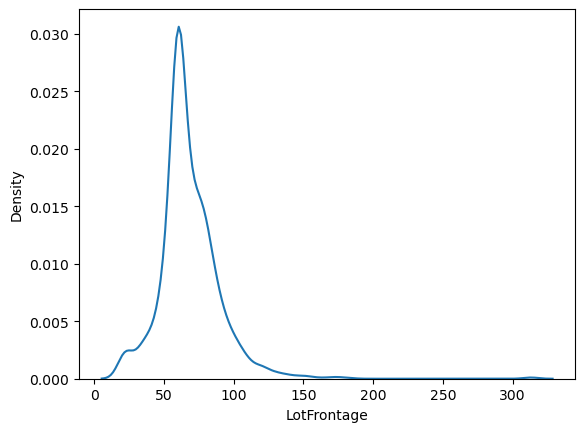

In [18]:
sns.kdeplot(df["LotFrontage"])

## Alley

In [20]:
df['Alley'].value_counts()

Alley
Grvl    50
Pave    41
Name: count, dtype: int64

In [21]:
df['Alley'].isnull().sum()

1369

In [22]:
df['Alley'] = df['Alley'].fillna('NoAlley')

In [23]:
df['Alley'].value_counts()

Alley
NoAlley    1369
Grvl         50
Pave         41
Name: count, dtype: int64

<Axes: xlabel='Alley', ylabel='count'>

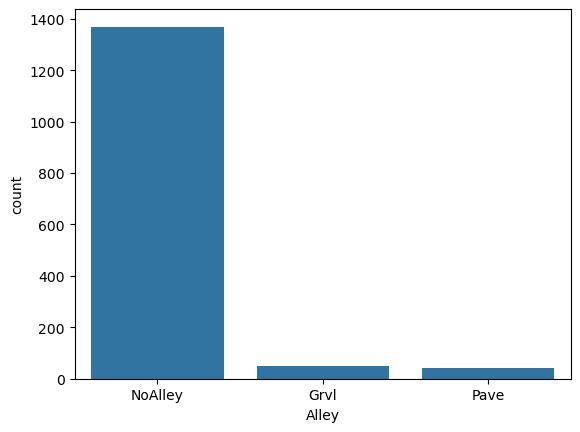

In [24]:
sns.countplot(x='Alley', data=df)

## MasVnrType

In [26]:
df['MasVnrType'].value_counts()

MasVnrType
BrkFace    445
Stone      128
BrkCmn      15
Name: count, dtype: int64

In [27]:
df['MasVnrType'].isnull().sum()

872

In [28]:
df['MasVnrType'] = df['MasVnrType'].fillna('None')

In [29]:
df['MasVnrType'].value_counts()

MasVnrType
None       872
BrkFace    445
Stone      128
BrkCmn      15
Name: count, dtype: int64

In [30]:
df['MasVnrArea'].isnull().sum()

8

In [31]:
df['MasVnrArea'].value_counts()

MasVnrArea
0.0       861
180.0       8
72.0        8
108.0       8
120.0       7
16.0        7
200.0       6
340.0       6
106.0       6
80.0        6
132.0       5
320.0       5
360.0       5
84.0        5
170.0       5
220.0       4
336.0       4
183.0       4
252.0       4
196.0       4
300.0       4
268.0       4
40.0        4
168.0       4
100.0       4
270.0       4
210.0       4
76.0        4
288.0       4
216.0       4
160.0       4
178.0       4
246.0       4
456.0       4
74.0        3
70.0        3
50.0        3
44.0        3
272.0       3
226.0       3
104.0       3
116.0       3
90.0        3
145.0       3
148.0       3
42.0        3
110.0       3
128.0       3
85.0        3
136.0       3
420.0       3
186.0       3
256.0       3
166.0       3
350.0       3
130.0       3
99.0        3
176.0       3
174.0       3
208.0       3
312.0       3
169.0       3
240.0       3
82.0        3
289.0       2
232.0       2
95.0        2
18.0        2
338.0       2
298.0       2
236.0    

In [32]:
df = df.dropna(subset=['MasVnrArea'])

In [33]:
df['MasVnrArea'].isnull().sum()

0

## BsmtQual

In [35]:
df['BsmtQual'].isnull().sum()

37

In [36]:
df['BsmtQual'].info()

<class 'pandas.core.series.Series'>
Index: 1452 entries, 0 to 1459
Series name: BsmtQual
Non-Null Count  Dtype 
--------------  ----- 
1415 non-null   object
dtypes: object(1)
memory usage: 22.7+ KB


In [37]:
df['BsmtQual'].value_counts()

BsmtQual
TA    648
Gd    612
Ex    120
Fa     35
Name: count, dtype: int64

In [38]:
df['BsmtQual'] = df['BsmtQual'].fillna('NA')

In [39]:
df['BsmtQual'].value_counts()

BsmtQual
TA    648
Gd    612
Ex    120
NA     37
Fa     35
Name: count, dtype: int64

## BsmtCond

In [41]:
df['BsmtCond'].isnull().sum()

37

In [42]:
df['BsmtCond'].value_counts()

BsmtCond
TA    1304
Gd      64
Fa      45
Po       2
Name: count, dtype: int64

In [43]:
df['BsmtCond'] = df['BsmtCond'].fillna('NA')

In [44]:
df['BsmtCond'].value_counts()

BsmtCond
TA    1304
Gd      64
Fa      45
NA      37
Po       2
Name: count, dtype: int64

## BsmtExposure

In [46]:
df['BsmtExposure'].isnull().sum()

38

In [47]:
df['BsmtExposure'].value_counts()

BsmtExposure
No    946
Av    221
Gd    133
Mn    114
Name: count, dtype: int64

In [48]:
df['BsmtExposure'] = df['BsmtExposure'].fillna('NA')

In [49]:
df['BsmtExposure'].value_counts()

BsmtExposure
No    946
Av    221
Gd    133
Mn    114
NA     38
Name: count, dtype: int64

In [50]:
df['BsmtExposure'].isnull().sum()

0

## BsmtFinType1 and BsmtFinType2

In [52]:
df['BsmtFinType1'].isnull().sum()

37

In [53]:
df['BsmtFinType1'].value_counts()

BsmtFinType1
Unf    428
GLQ    413
ALQ    220
BLQ    148
Rec    132
LwQ     74
Name: count, dtype: int64

In [54]:
df['BsmtFinType1'] = df['BsmtFinType1'].fillna('NA')

In [55]:
df['BsmtFinType1'].isnull().sum()

0

In [56]:
df['BsmtFinType2'].isnull().sum()

38

In [57]:
df['BsmtFinType2'].value_counts()

BsmtFinType2
Unf    1248
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: count, dtype: int64

In [58]:
df['BsmtFinType2'] = df['BsmtFinType2'].fillna('NA')

In [59]:
df['BsmtFinType2'].value_counts()

BsmtFinType2
Unf    1248
Rec      54
LwQ      46
NA       38
BLQ      33
ALQ      19
GLQ      14
Name: count, dtype: int64

# Electrical

In [61]:
df = df.dropna(subset=['Electrical'])

In [62]:
df['Electrical'].value_counts()

Electrical
SBrkr    1326
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: count, dtype: int64

## FireplaceQu

In [64]:
df['Fireplaces'].value_counts()

Fireplaces
0    685
1    648
2    113
3      5
Name: count, dtype: int64

In [65]:
df['FireplaceQu'].value_counts()

FireplaceQu
Gd    378
TA    311
Fa     33
Ex     24
Po     20
Name: count, dtype: int64

In [66]:
df['FireplaceQu'] = df['FireplaceQu'].fillna('NA')

In [67]:
df['FireplaceQu'].value_counts()

FireplaceQu
NA    685
Gd    378
TA    311
Fa     33
Ex     24
Po     20
Name: count, dtype: int64

## GarageType, GarageFinish, GarageQual, GarageCond 

In [69]:
df['GarageType'].value_counts()

GarageType
Attchd     863
Detchd     387
BuiltIn     86
Basment     19
CarPort      9
2Types       6
Name: count, dtype: int64

In [70]:
df['GarageFinish'].value_counts()

GarageFinish
Unf    605
RFn    418
Fin    347
Name: count, dtype: int64

In [71]:
df['GarageQual'].value_counts()

GarageQual
TA    1302
Fa      48
Gd      14
Ex       3
Po       3
Name: count, dtype: int64

In [72]:
df['GarageCond'].value_counts()

GarageCond
TA    1317
Fa      35
Gd       9
Po       7
Ex       2
Name: count, dtype: int64

In [73]:
df = df.drop(columns = 'GarageYrBlt')

In [74]:
df['GarageType'] = df['GarageType'].fillna('NA')
df['GarageFinish'] = df['GarageFinish'].fillna('NA')
df['GarageQual'] = df['GarageQual'].fillna('NA')
df['GarageCond'] = df['GarageCond'].fillna('NA')

In [75]:
for i in df.columns:
    if df[i].isnull().sum() != 0:
        print(i ,' : ',df[i].isnull().sum(),' : [',df[i].isnull().sum()*100/1460,'%]',)

PoolQC  :  1444  : [ 98.9041095890411 %]
Fence  :  1170  : [ 80.13698630136986 %]
MiscFeature  :  1397  : [ 95.68493150684931 %]


## PoolQC

In [77]:
df['PoolQC'].value_counts()

PoolQC
Gd    3
Ex    2
Fa    2
Name: count, dtype: int64

In [78]:
df['PoolQC'] = df['PoolQC'].fillna('NA')

In [79]:
df['Fence'].value_counts()

Fence
MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: count, dtype: int64

## Fence

In [81]:
df['Fence'] = df['Fence'].fillna('NA')

In [82]:
df['Fence'].value_counts()

Fence
NA       1170
MnPrv     157
GdPrv      59
GdWo       54
MnWw       11
Name: count, dtype: int64

## MiscFeature

In [84]:
df['MiscFeature'].value_counts()

MiscFeature
Shed    49
Gar2     2
Othr     2
TenC     1
Name: count, dtype: int64

In [85]:
df['MiscFeature'] = df['MiscFeature'].fillna('NA')

#### here we complete our missing value imputation

In [87]:
df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

# Devide the catagorical and numerical column for better EDA

In [89]:
numerical_df = df.select_dtypes(include=['number'])
categorical_df = df.select_dtypes(exclude=['number'])

In [90]:
numerical_df.shape,categorical_df.shape ,df.shape

((1451, 36), (1451, 43), (1451, 79))

In [91]:
categorical_df.head()

MSZoning Street    Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave  NoAlley      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave  NoAlley      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave  NoAlley      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave  NoAlley      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave  NoAlley      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl  \
0      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
1      Veenker      Feedr       Norm     1Fam     1Story     Gable  CompShg   
2      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
3      Crawfor       Norm       Norm     1Fam     2Story     Gable  CompShg   
4      NoRidge       Norm       Norm     1Fam     2Story     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual  \
0     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
1     MetalSd     MetalSd       None        TA        TA     CBlock       Gd   
2     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
3     Wd Sdng     Wd Shng       None        TA        TA     BrkTil       TA   
4     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   

  BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC  \
0       TA           No          GLQ          Unf    GasA        Ex   
1       TA           Gd          ALQ          Unf    GasA        Ex   
2       TA           Mn          GLQ          Unf    GasA        Ex   
3       Gd           No          ALQ          Unf    GasA        Gd   
4       TA           Av          GLQ          Unf    GasA        Ex   

  CentralAir Electrical KitchenQual Functional FireplaceQu GarageType  \
0          Y      SBrkr          Gd        Typ          NA     Attchd   
1          Y      SBrkr          TA        Typ          TA     Attchd   
2          Y      SBrkr          Gd        Typ          TA     Attchd   
3          Y      SBrkr          Gd        Typ          Gd     Detchd   
4          Y      SBrkr          Gd        Typ          TA     Attchd   

  GarageFinish GarageQual GarageCond PavedDrive PoolQC Fence MiscFeature  \
0          RFn         TA         TA          Y     NA    NA          NA   
1          RFn         TA         TA          Y     NA    NA          NA   
2          RFn         TA         TA          Y     NA    NA          NA   
3          Unf         TA         TA          Y     NA    NA          NA   
4          RFn         TA         TA          Y     NA    NA          NA   

  SaleType SaleCondition  
0       WD        Normal  
1       WD        Normal  
2       WD        Normal  
3       WD       Abnorml  
4       WD        Normal

In [92]:
numerical_df.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0         706           0        150          856   
1          1976         0.0         978           0        284         1262   
2          2002       162.0         486           0        434          920   
3          1970         0.0         216           0        540          756   
4          2000       350.0         655           0        490         1145   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
0           2         548           0           61              0          0   
1           2         460         298            0              0          0   
2           2         608           0           42              0          0   
3           3         642           0           35            272          0   
4           3         836         192           84              0          0   

   ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SalePrice  
0            0         0        0       2    2008     208500  
1            0         0        0       5    2007     181500  
2            0         0        0       9    2008     223500  
3            0         0        0       2    2006     140000  
4            0         0        0      12    2008     250000

# Seperate Nominal and Odinal Columns into different datframes for better encoding

In [94]:
# List of nominal and ordinal columns as previously defined
nominal_columns = [
    'MSZoning', 'Street', 'Alley', 'LandContour', 'Utilities',
    'LotConfig', 'Neighborhood', 'Condition1', 'Condition2',
    'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
    'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir',
    'Electrical', 'Functional', 'GarageType', 'MiscFeature',
    'SaleType', 'SaleCondition'
]

ordinal_columns = [
    'LotShape', 'LandSlope', 'ExterQual', 'ExterCond', 'BsmtQual',
    'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
    'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageFinish',
    'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence'
]

# Create DataFrames for nominal and ordinal categorical columns
nominal_cat_df = df[nominal_columns].copy()
ordinal_cat_df = df[ordinal_columns].copy()

In [95]:
nominal_cat_df.shape

(1451, 25)

In [96]:
ordinal_cat_df.shape

(1451, 18)

# Apply one-hot encoding to all columns in nominal_df

In [98]:
nominal_encoded_df = pd.get_dummies(nominal_cat_df, drop_first=True,dtype=int)

In [99]:
nominal_encoded_df.head()

MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  \
0            0            0            1            0            1   
1            0            0            1            0            1   
2            0            0            1            0            1   
3            0            0            1            0            1   
4            0            0            1            0            1   

   Alley_NoAlley  Alley_Pave  LandContour_HLS  LandContour_Low  \
0              1           0                0                0   
1              1           0                0                0   
2              1           0                0                0   
3              1           0                0                0   
4              1           0                0                0   

   LandContour_Lvl  Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_FR2  \
0                1                 0                  0              0   
1                1                 0                  0              1   
2                1                 0                  0              0   
3                1                 0                  0              0   
4                1                 0                  0              1   

   LotConfig_FR3  LotConfig_Inside  Neighborhood_Blueste  Neighborhood_BrDale  \
0              0                 1                     0                    0   
1              0                 0                     0                    0   
2              0                 1                     0                    0   
3              0                 0                     0                    0   
4              0                 0                     0                    0   

   Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  \
0                     0                     0                     1   
1                     0                     0                     0   
2                     0                     0                     1   
3                     0                     0                     0   
4                     0                     0                     0   

   Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   
3                     1                     0                     0   
4                     0                     0                     0   

   Neighborhood_IDOTRR  Neighborhood_MeadowV  Neighborhood_Mitchel  \
0                    0                     0                     0   
1                    0                     0                     0   
2                    0                     0                     0   
3                    0                     0                     0   
4                    0                     0                     0   

   Neighborhood_NAmes  Neighborhood_NPkVill  Neighborhood_NWAmes  \
0                   0                     0                    0   
1                   0                     0                    0   
2                   0                     0                    0   
3                   0                     0                    0   
4                   0                     0                    0   

   Neighborhood_NoRidge  Neighborhood_NridgHt  Neighborhood_OldTown  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   
3                     0                     0                     0   
4                     1                     0                     0   

   Neighborhood_SWISU  Neighborhood_Sawyer  Neighborhood_SawyerW  \
0                   0                    0                     0   
1     

In [100]:
nominal_encoded_df.shape

(1451, 153)

In [101]:
nominal_encoded_df.isnull().sum()

MSZoning_FV              0
MSZoning_RH              0
MSZoning_RL              0
MSZoning_RM              0
Street_Pave              0
Alley_NoAlley            0
Alley_Pave               0
LandContour_HLS          0
LandContour_Low          0
LandContour_Lvl          0
Utilities_NoSeWa         0
LotConfig_CulDSac        0
LotConfig_FR2            0
LotConfig_FR3            0
LotConfig_Inside         0
Neighborhood_Blueste     0
Neighborhood_BrDale      0
Neighborhood_BrkSide     0
Neighborhood_ClearCr     0
Neighborhood_CollgCr     0
Neighborhood_Crawfor     0
Neighborhood_Edwards     0
Neighborhood_Gilbert     0
Neighborhood_IDOTRR      0
Neighborhood_MeadowV     0
Neighborhood_Mitchel     0
Neighborhood_NAmes       0
Neighborhood_NPkVill     0
Neighborhood_NWAmes      0
Neighborhood_NoRidge     0
Neighborhood_NridgHt     0
Neighborhood_OldTown     0
Neighborhood_SWISU       0
Neighborhood_Sawyer      0
Neighborhood_SawyerW     0
Neighborhood_Somerst     0
Neighborhood_StoneBr     0
N

# Apply odinal encoding to all the column in odinal_cat_df

In [103]:
from sklearn.preprocessing import OrdinalEncoder

In [104]:
# Define the categories for each ordinal feature
category_orders = [
    ['IR3', 'IR2', 'IR1', 'Reg'],  # LotShape
    ['Sev', 'Mod', 'Gtl'],         # LandSlope
    ['Po', 'Fa', 'TA', 'Gd', 'Ex'],  # ExterQual
    ['Po', 'Fa', 'TA', 'Gd', 'Ex'],  # ExterCond
    ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],  # BsmtQual
    ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],  # BsmtCond
    ['NA', 'No', 'Mn', 'Av', 'Gd'],  # BsmtExposure
    ['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],  # BsmtFinType1
    ['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],  # BsmtFinType2
    ['Po', 'Fa', 'TA', 'Gd', 'Ex'],  # HeatingQC
    ['Po', 'Fa', 'TA', 'Gd', 'Ex'],  # KitchenQual
    ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],  # FireplaceQu
    ['NA', 'Unf', 'RFn', 'Fin'],  # GarageFinish
    ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],  # GarageQual
    ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],  # GarageCond
    ['N', 'P', 'Y'],  # PavedDrive
    ['NA', 'Fa', 'Gd', 'Ex'],  # PoolQC
    ['NA', 'MnWw', 'MnPrv', 'GdWo', 'GdPrv']  # Fence
]


In [105]:
# Initialize and apply OrdinalEncoder
encoder = OrdinalEncoder(categories=category_orders)

In [106]:
ordinal_encoded = encoder.fit_transform(ordinal_cat_df)

In [107]:
ordinal_encoded = ordinal_encoded.astype(int)

In [108]:
# Convert to DataFrame
ordinal_encoded_df = pd.DataFrame(ordinal_encoded, columns=ordinal_cat_df.columns)

In [109]:
ordinal_encoded_df.head()

LotShape  LandSlope  ExterQual  ExterCond  BsmtQual  BsmtCond  \
0         3          2          3          2         4         3   
1         3          2          2          2         4         3   
2         2          2          3          2         4         3   
3         2          2          2          2         3         4   
4         2          2          3          2         4         3   

   BsmtExposure  BsmtFinType1  BsmtFinType2  HeatingQC  KitchenQual  \
0             1             6             1          4            3   
1             4             5             1          4            2   
2             2             6             1          4            3   
3             1             5             1          3            3   
4             3             6             1          4            3   

   FireplaceQu  GarageFinish  GarageQual  GarageCond  PavedDrive  PoolQC  \
0            0             2           3           3           2       0   
1            3             2           3           3           2       0   
2            3             2           3           3           2       0   
3            4             1           3           3           2       0   
4            3             2           3           3           2       0   

   Fence  
0      0  
1      0  
2      0  
3      0  
4      0

In [110]:
ordinal_encoded_df.shape

(1451, 18)

In [111]:
ordinal_encoded_df.isnull().sum()

LotShape        0
LandSlope       0
ExterQual       0
ExterCond       0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
HeatingQC       0
KitchenQual     0
FireplaceQu     0
GarageFinish    0
GarageQual      0
GarageCond      0
PavedDrive      0
PoolQC          0
Fence           0
dtype: int64

In [112]:
final_cat_df =  pd.concat([nominal_encoded_df, ordinal_encoded_df], axis=1)

In [113]:
final_cat_df.isnull().sum()

MSZoning_FV              9
MSZoning_RH              9
MSZoning_RL              9
MSZoning_RM              9
Street_Pave              9
Alley_NoAlley            9
Alley_Pave               9
LandContour_HLS          9
LandContour_Low          9
LandContour_Lvl          9
Utilities_NoSeWa         9
LotConfig_CulDSac        9
LotConfig_FR2            9
LotConfig_FR3            9
LotConfig_Inside         9
Neighborhood_Blueste     9
Neighborhood_BrDale      9
Neighborhood_BrkSide     9
Neighborhood_ClearCr     9
Neighborhood_CollgCr     9
Neighborhood_Crawfor     9
Neighborhood_Edwards     9
Neighborhood_Gilbert     9
Neighborhood_IDOTRR      9
Neighborhood_MeadowV     9
Neighborhood_Mitchel     9
Neighborhood_NAmes       9
Neighborhood_NPkVill     9
Neighborhood_NWAmes      9
Neighborhood_NoRidge     9
Neighborhood_NridgHt     9
Neighborhood_OldTown     9
Neighborhood_SWISU       9
Neighborhood_Sawyer      9
Neighborhood_SawyerW     9
Neighborhood_Somerst     9
Neighborhood_StoneBr     9
N

In [114]:
final_cat_df = final_cat_df.dropna()

In [115]:
final_cat_df = final_cat_df.astype(int)

In [116]:
final_cat_df.head(30)

MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  \
0             0            0            1            0            1   
1             0            0            1            0            1   
2             0            0            1            0            1   
3             0            0            1            0            1   
4             0            0            1            0            1   
5             0            0            1            0            1   
6             0            0            1            0            1   
7             0            0            1            0            1   
8             0            0            0            1            1   
9             0            0            1            0            1   
10            0            0            1            0            1   
11            0            0            1            0            1   
12            0            0            1            0            1   
13            0            0            1            0            1   
14            0            0            1            0            1   
15            0            0            0            1            1   
16            0            0            1            0            1   
17            0            0            1            0            1   
18            0            0            1            0            1   
19            0            0            1            0            1   
20            0            0            1            0            1   
21            0            0            0            1            1   
22            0            0            1            0            1   
23            0            0            0            1            1   
24            0            0            1            0            1   
25            0            0            1            0            1   
26            0            0            1            0            1   
27            0            0            1            0            1   
28            0            0            1            0            1   
29            0            0            0            1            1   

    Alley_NoAlley  Alley_Pave  LandContour_HLS  LandContour_Low  \
0               1           0                0                0   
1               1           0                0                0   
2               1           0                0                0   
3               1           0                0                0   
4               1           0                0                0   
5               1           0                0                0   
6               1           0                0                0   
7               1           0                0                0   
8               1           0                0                0   
9               1           0                0                0   
10              1           0                0                0   
11              1           0                0                0   
12              1           0                0                0   
13              1           0                0                0   
14              1           0                0                0   
15              1           0                0                0   
16              1           0                0                0   
17              1           0                0                0   
18              1           0                0                0   
19              1           0                0                0   
20              1           0                0                0   
21              0           0                0                0   
22              1           0                0                0   
23              1           0                0                0   
24              1           0                0                0   
25              1           0                0              

In [117]:
final_cat_df.shape

(1442, 171)

In [118]:
numerical_df.shape

(1451, 36)

# Ferform operation on numerical columns

In [120]:
numerical_df.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [121]:
combined_df = pd.concat([numerical_df,final_cat_df], axis=1)

In [122]:
combined_df.shape

(1451, 207)

In [123]:
combined_df.isnull().sum()

MSSubClass               0
LotFrontage              0
LotArea                  0
OverallQual              0
OverallCond              0
YearBuilt                0
YearRemodAdd             0
MasVnrArea               0
BsmtFinSF1               0
BsmtFinSF2               0
BsmtUnfSF                0
TotalBsmtSF              0
1stFlrSF                 0
2ndFlrSF                 0
LowQualFinSF             0
GrLivArea                0
BsmtFullBath             0
BsmtHalfBath             0
FullBath                 0
HalfBath                 0
BedroomAbvGr             0
KitchenAbvGr             0
TotRmsAbvGrd             0
Fireplaces               0
GarageCars               0
GarageArea               0
WoodDeckSF               0
OpenPorchSF              0
EnclosedPorch            0
3SsnPorch                0
ScreenPorch              0
PoolArea                 0
MiscVal                  0
MoSold                   0
YrSold                   0
SalePrice                0
MSZoning_FV              9
M

In [124]:
combined_df = combined_df.dropna()

In [125]:
combined_df.shape

(1442, 207)

In [126]:
combined_df.to_csv('cleaned_house_data.csv', index=False)

# Handle numerical Data columns

In [291]:
new_df = pd.read_csv('cleaned_house_data.csv')

In [293]:
new_df.shape

(1442, 207)

In [295]:
new_df.head(20)

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0           60         65.0     8450            7            5       2003   
1           20         80.0     9600            6            8       1976   
2           60         68.0    11250            7            5       2001   
3           70         60.0     9550            7            5       1915   
4           60         84.0    14260            8            5       2000   
5           50         85.0    14115            5            5       1993   
6           20         75.0    10084            8            5       2004   
7           60         60.0    10382            7            6       1973   
8           50         51.0     6120            7            5       1931   
9          190         50.0     7420            5            6       1939   
10          20         70.0    11200            5            5       1965   
11          60         85.0    11924            9            5       2005   
12          20         60.0    12968            5            6       1962   
13          20         91.0    10652            7            5       2006   
14          20         60.0    10920            6            5       1960   
15          45         51.0     6120            7            8       1929   
16          20         60.0    11241            6            7       1970   
17          90         72.0    10791            4            5       1967   
18          20         66.0    13695            5            5       2004   
19          20         70.0     7560            5            6       1958   

    YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0           2003       196.0         706           0        150          856   
1           1976         0.0         978           0        284         1262   
2           2002       162.0         486           0        434          920   
3           1970         0.0         216           0        540          756   
4           2000       350.0         655           0        490         1145   
5           1995         0.0         732           0         64          796   
6           2005       186.0        1369           0        317         1686   
7           1973       240.0         859          32        216         1107   
8           1950         0.0           0           0        952          952   
9           1950         0.0         851           0        140          991   
10          1965         0.0         906           0        134         1040   
11          2006       286.0         998           0        177         1175   
12          1962         0.0         737           0        175          912   
13          2007       306.0           0           0       1494         1494   
14          1960       212.0         733           0        520         1253   
15          2001         0.0           0           0        832          832   
16          1970       180.0         578           0        426         1004   
17          1967         0.0           0           0          0            0   
18          2004         0.0         646           0        468         1114   
19          1965         0.0         504           0        525         1029   

    1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0        856       854             0       1710             1             0   
1       1262         0             0       1262             0             1   
2        920       866             0       1786             1             0   
3        961       756             0       1717             1             0   
4       1145      1053             0       2198             1             0   
5        796       566             0       1362             1             0   
6       1694         0             0       1694             1             0   
7       1107       983             0       2090             1            

In [297]:
X = new_df.drop(columns='SalePrice')
y = new_df['SalePrice']

In [299]:
X.shape , y.shape

((1442, 206), (1442,))

In [301]:
# X = X.drop(columns='SalePrice')

# Check the distribution of numerical columns

MSSubClass: Skewness = 1.40 (Positive Skewness)


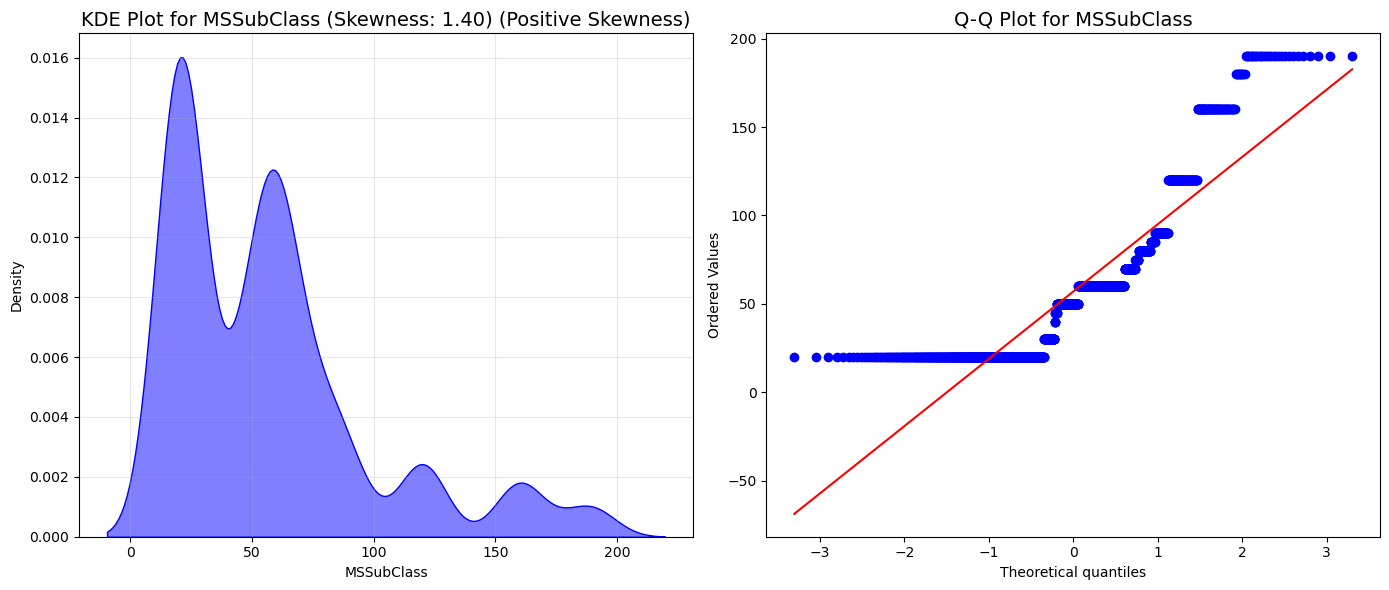

LotFrontage: Skewness = 2.52 (Positive Skewness)


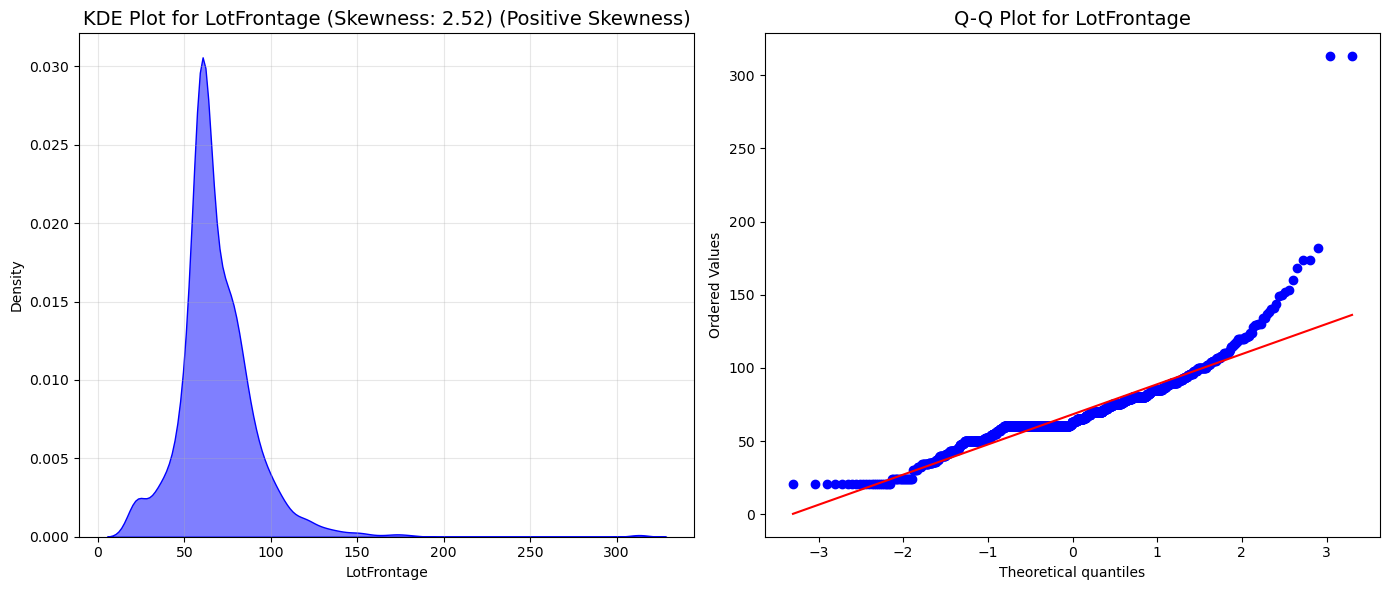

LotArea: Skewness = 12.21 (Positive Skewness)


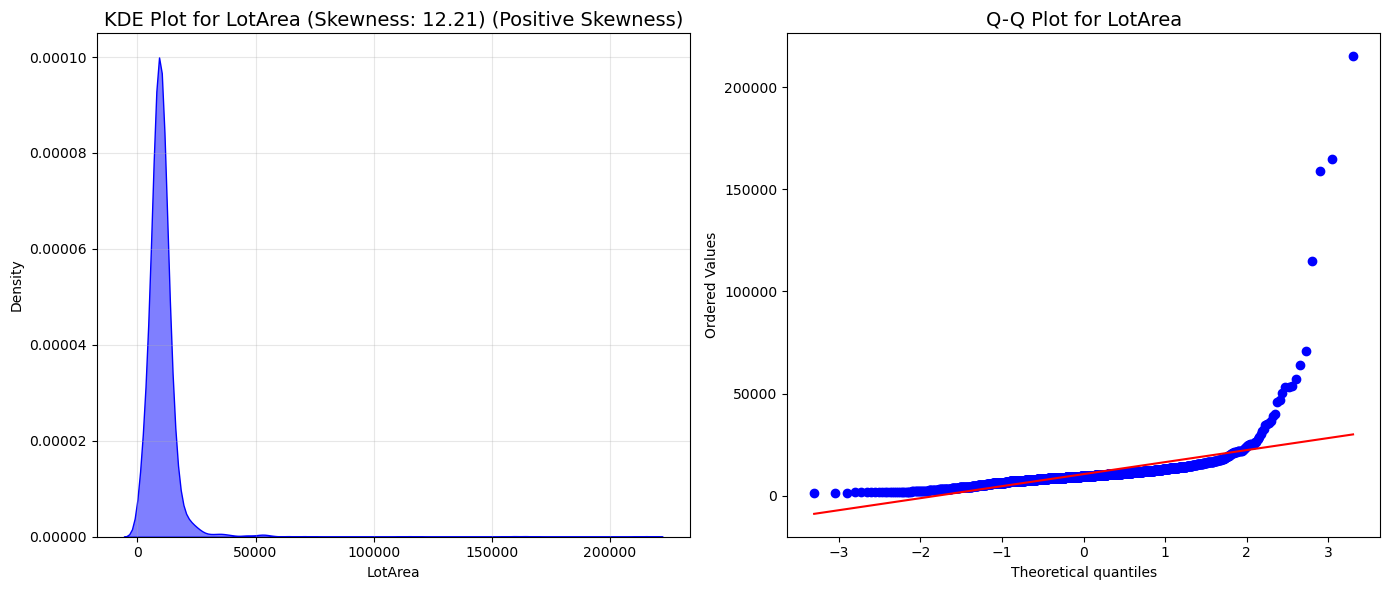

OverallQual: Skewness = 0.21 (Positive Skewness)


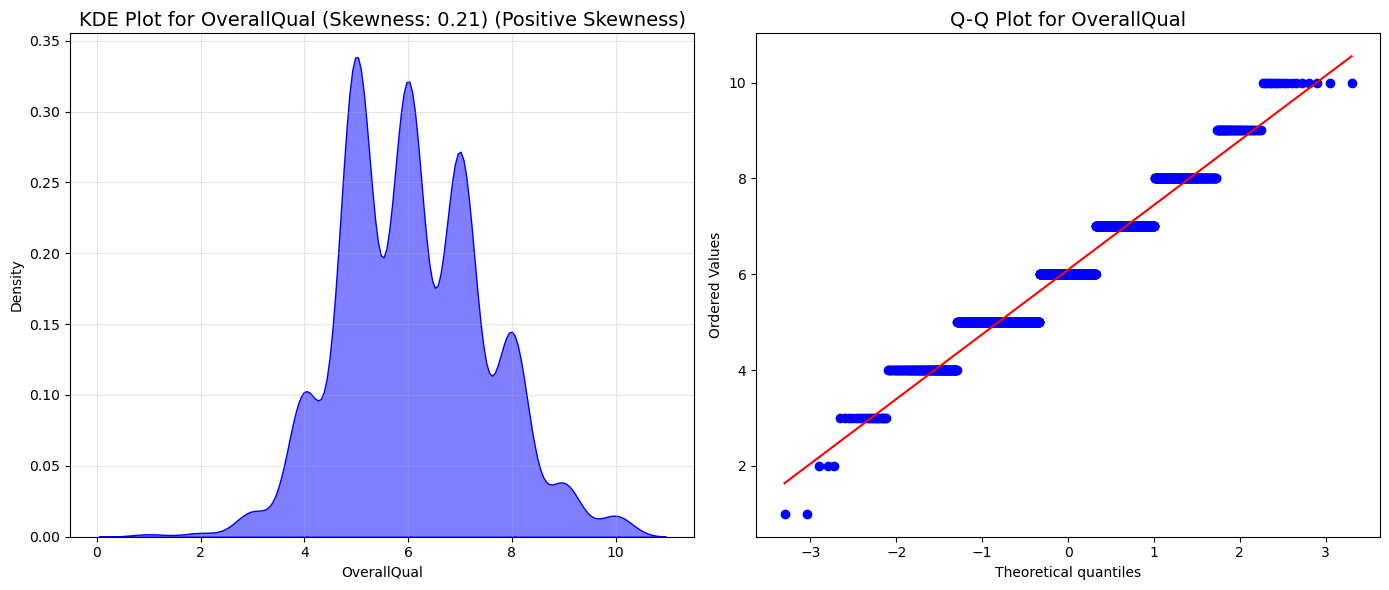

OverallCond: Skewness = 0.68 (Positive Skewness)


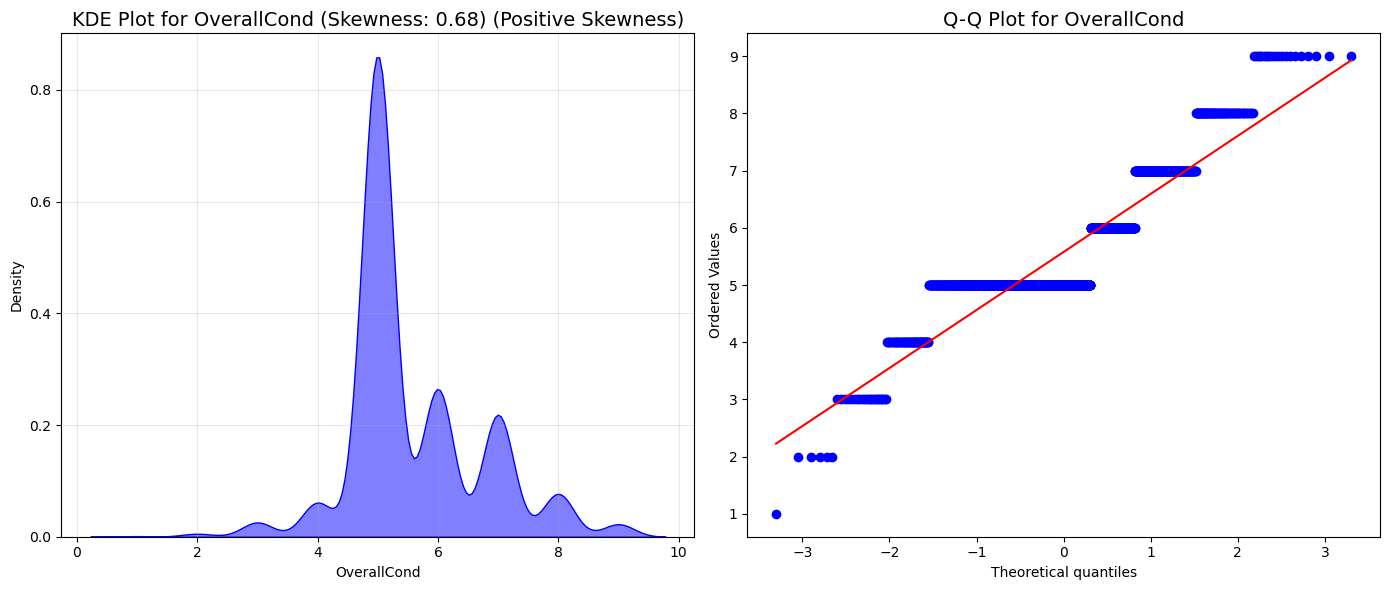

YearBuilt: Skewness = -0.61 (Negative Skewness)


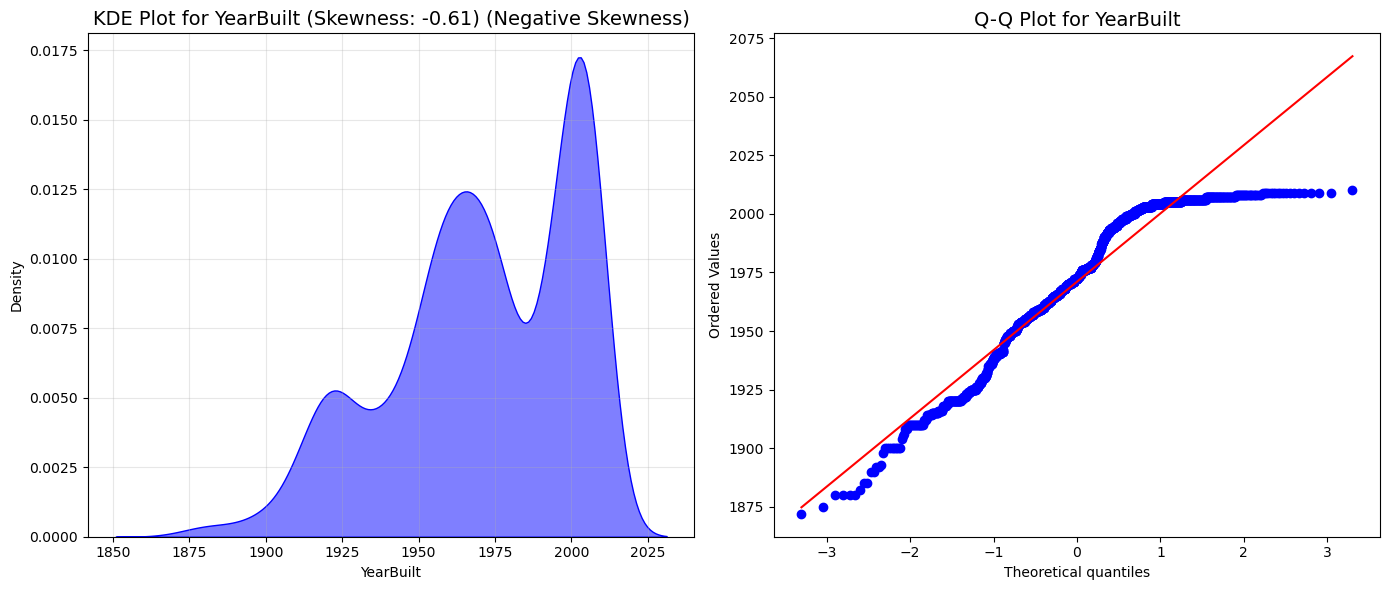

YearRemodAdd: Skewness = -0.49 (Negative Skewness)


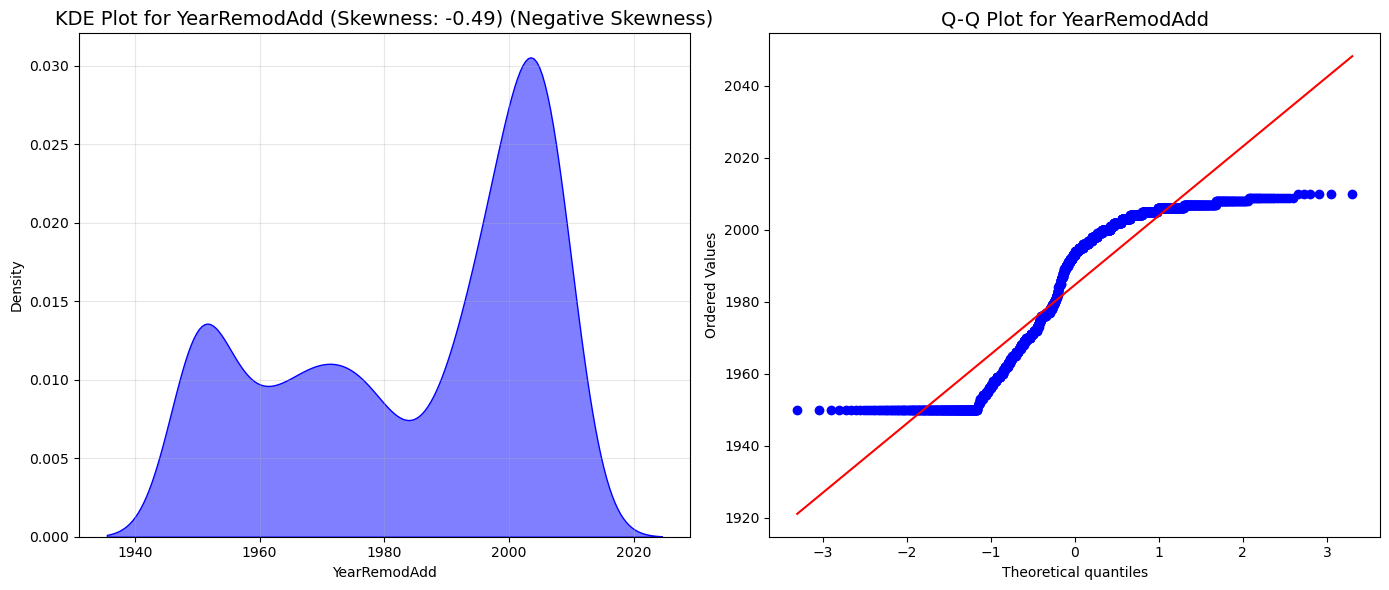

MasVnrArea: Skewness = 2.66 (Positive Skewness)


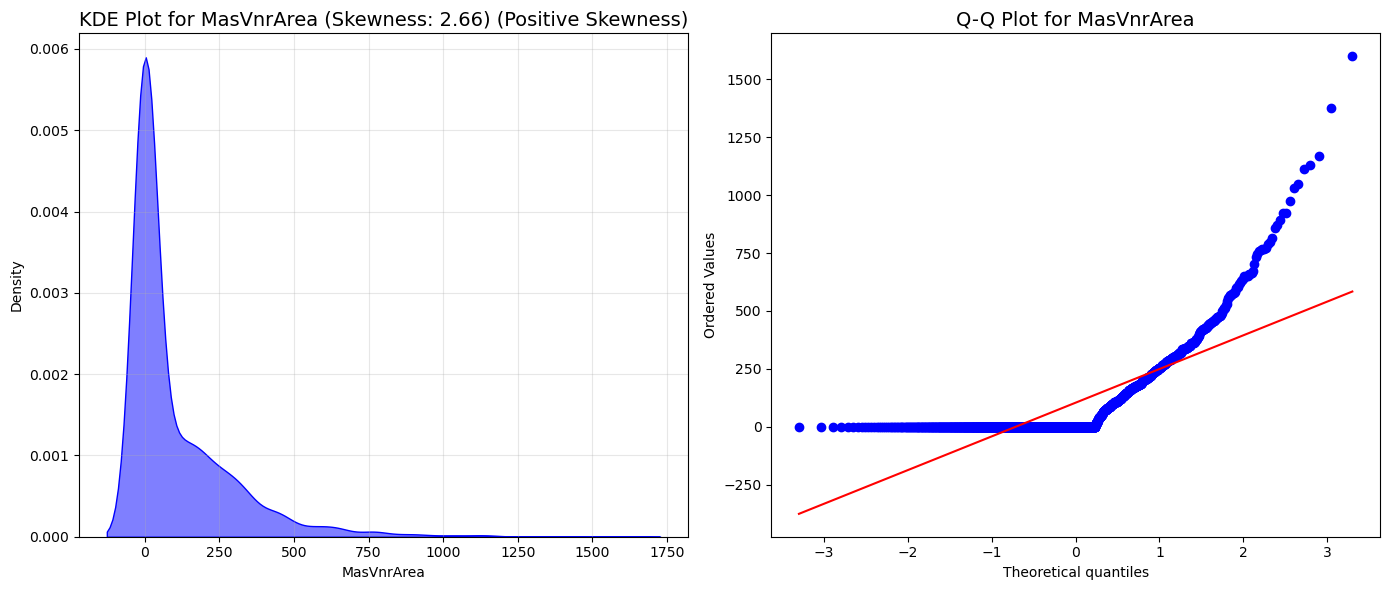

BsmtFinSF1: Skewness = 1.70 (Positive Skewness)


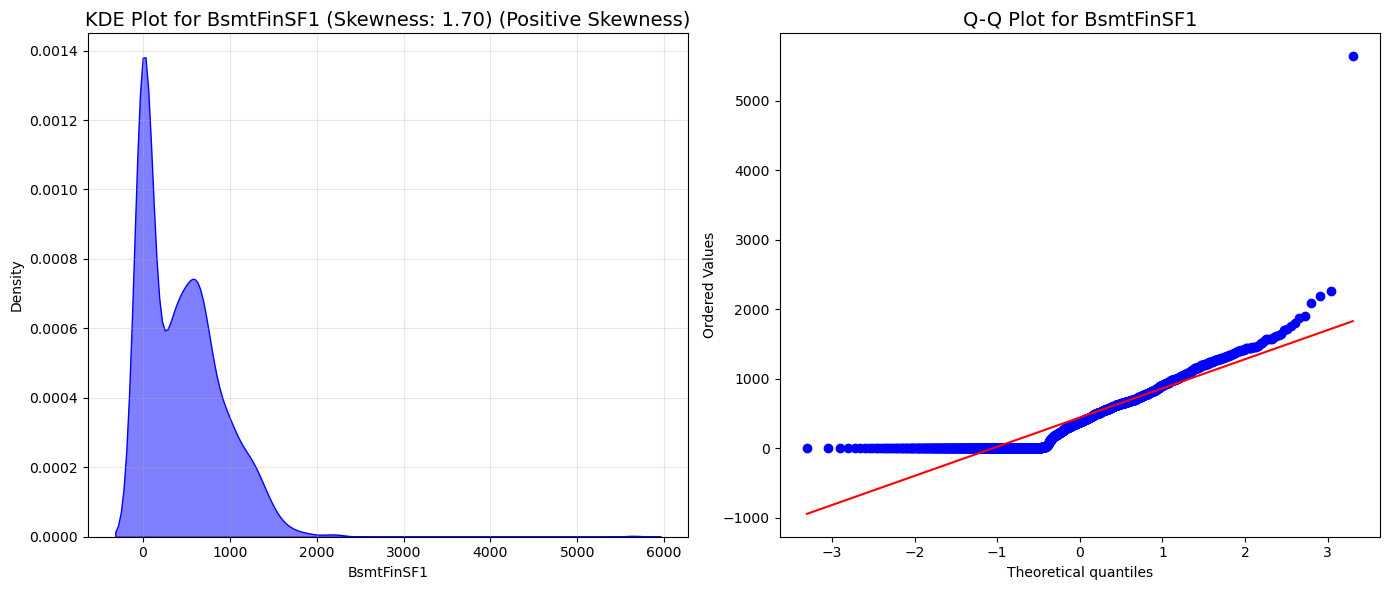

BsmtFinSF2: Skewness = 4.26 (Positive Skewness)


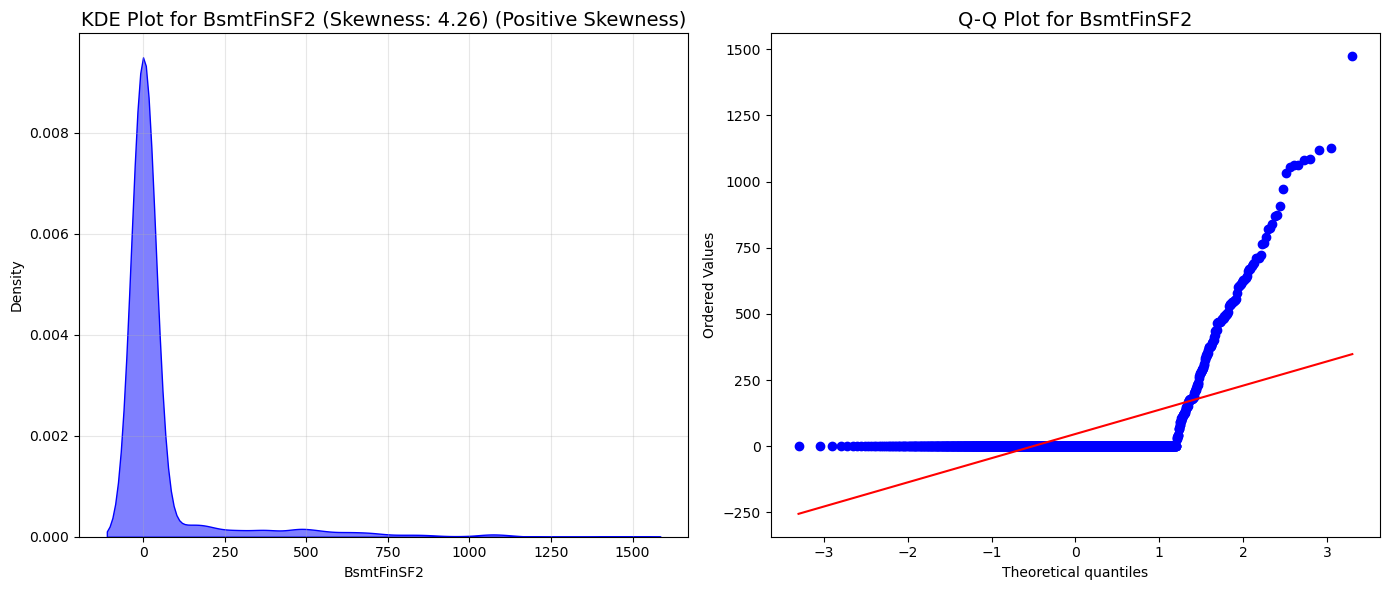

BsmtUnfSF: Skewness = 0.93 (Positive Skewness)


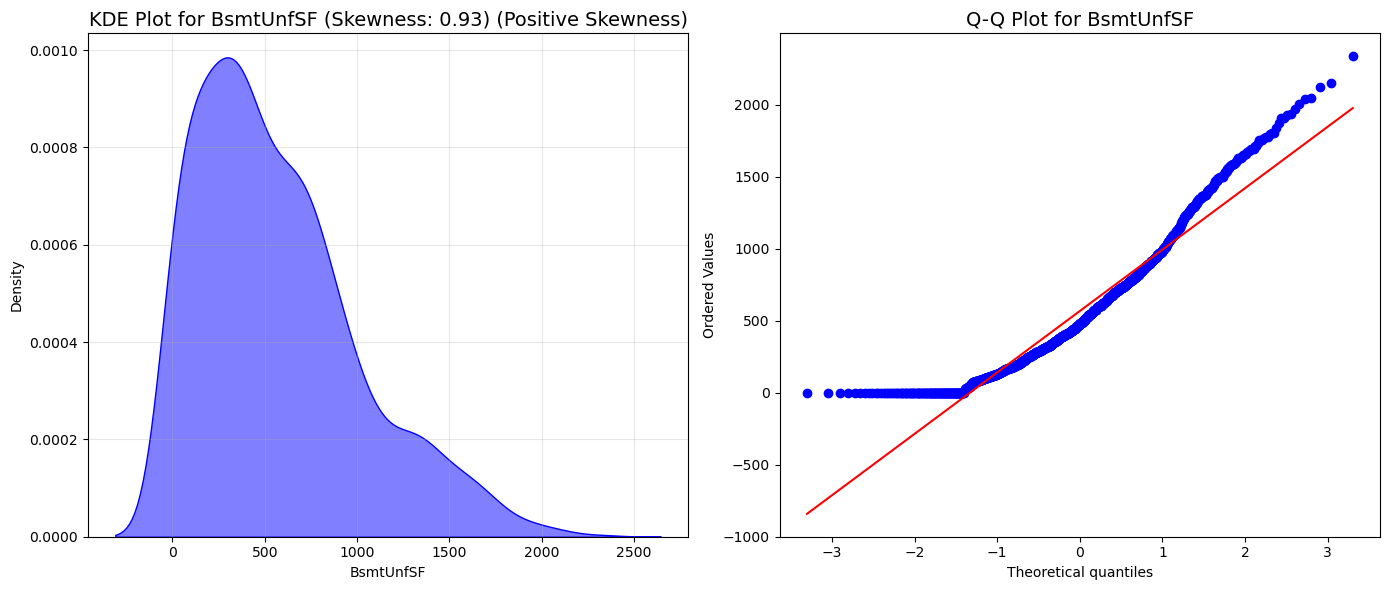

TotalBsmtSF: Skewness = 1.54 (Positive Skewness)


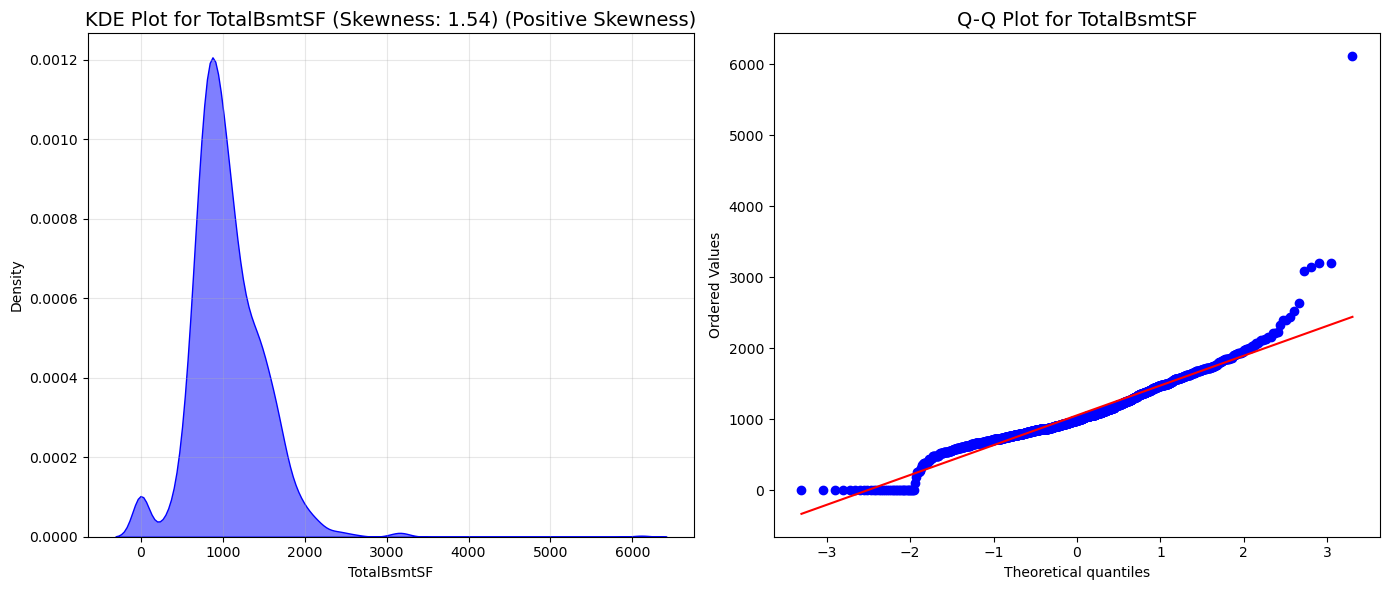

1stFlrSF: Skewness = 1.38 (Positive Skewness)


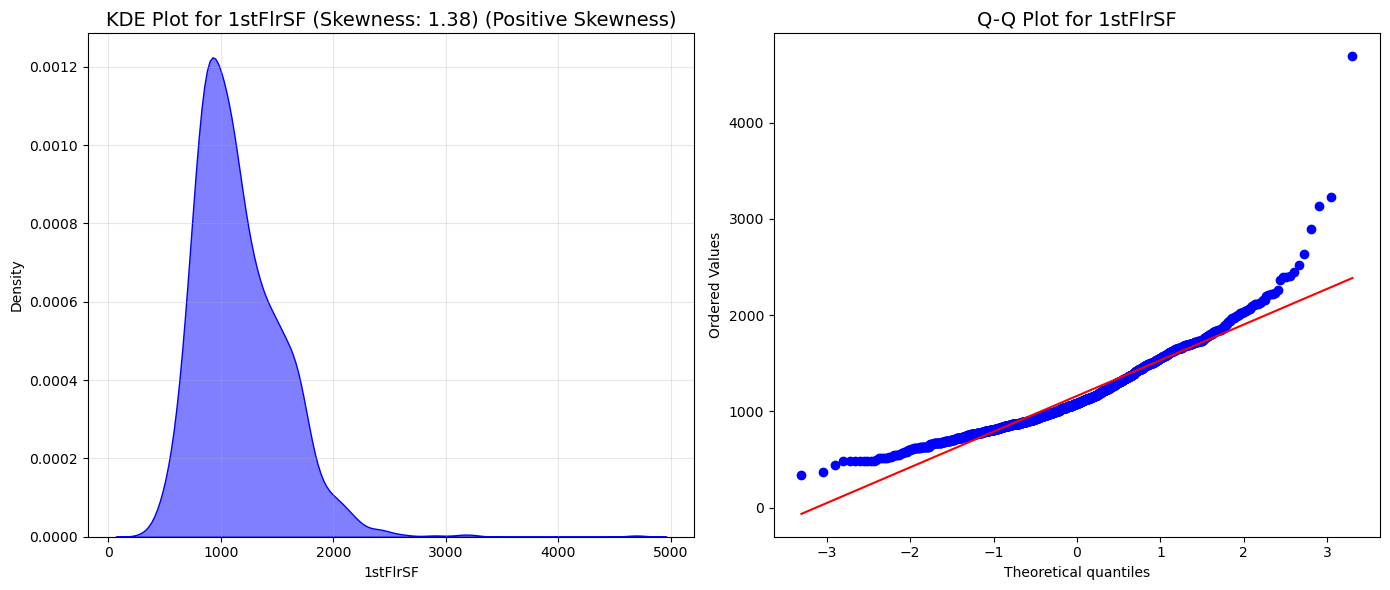

2ndFlrSF: Skewness = 0.81 (Positive Skewness)


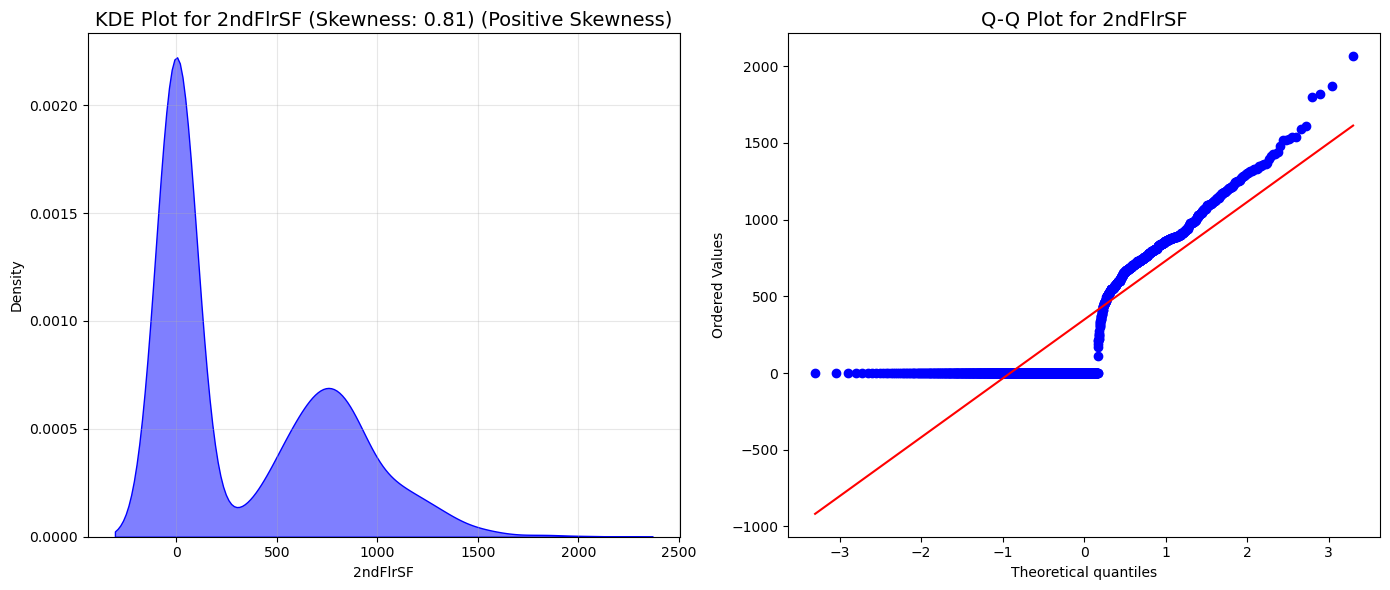

LowQualFinSF: Skewness = 8.95 (Positive Skewness)


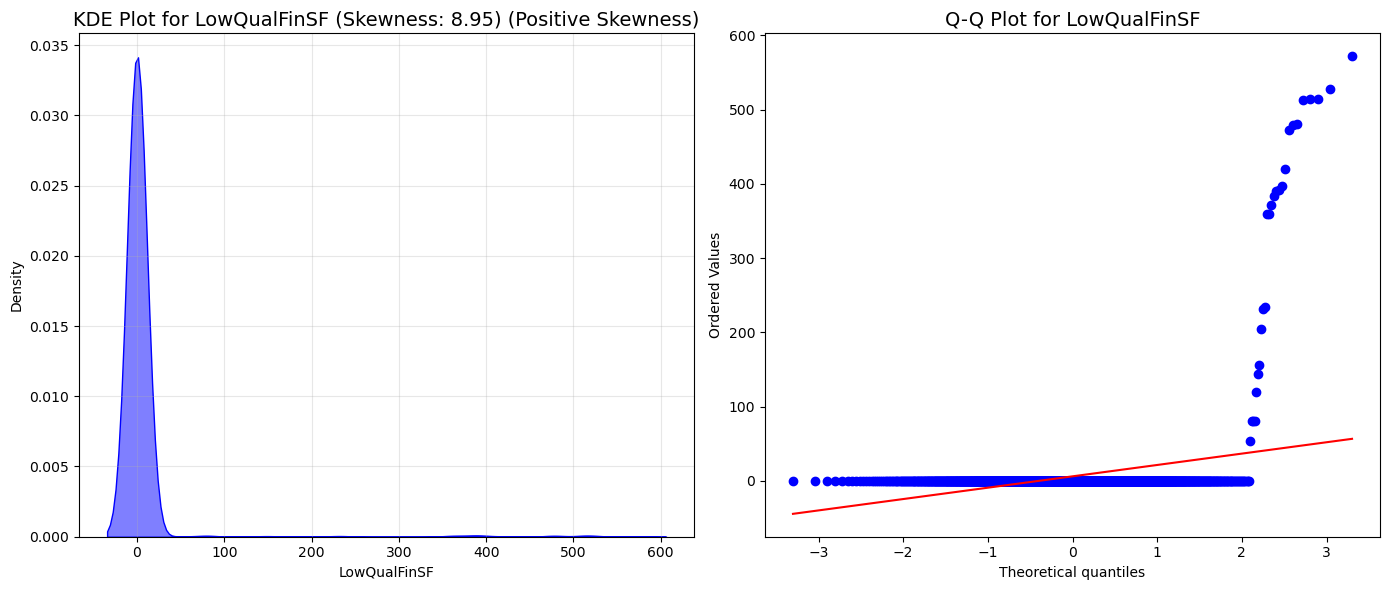

GrLivArea: Skewness = 1.37 (Positive Skewness)


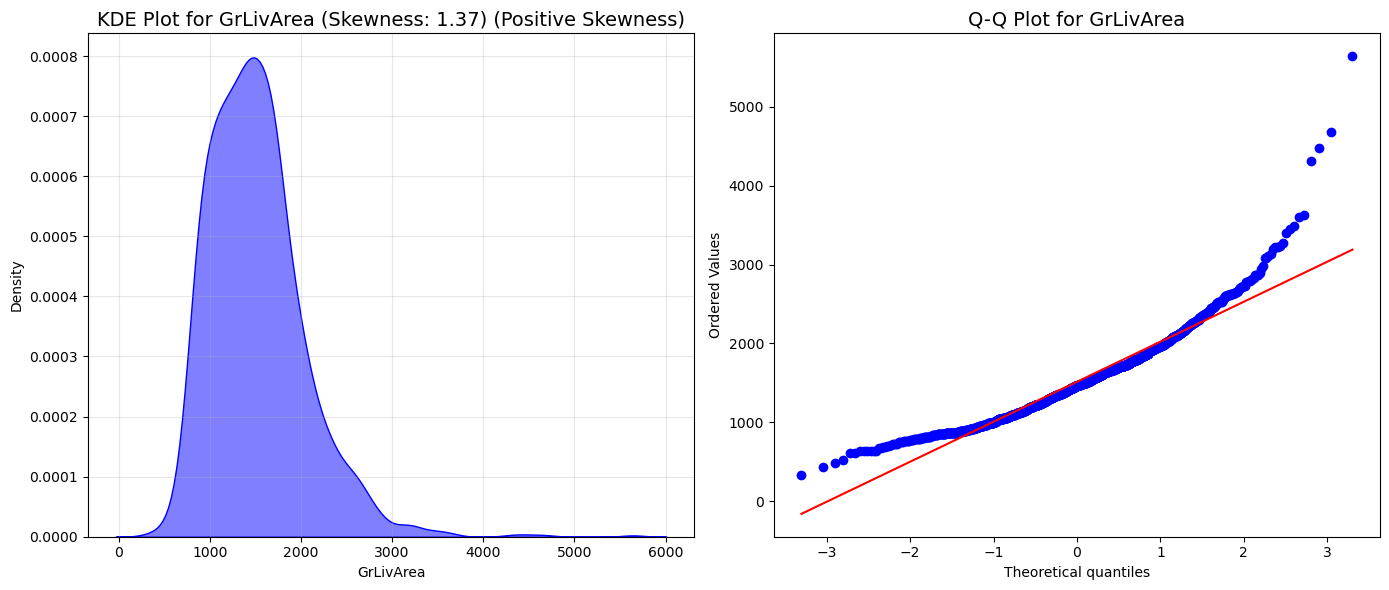

BsmtFullBath: Skewness = 0.61 (Positive Skewness)


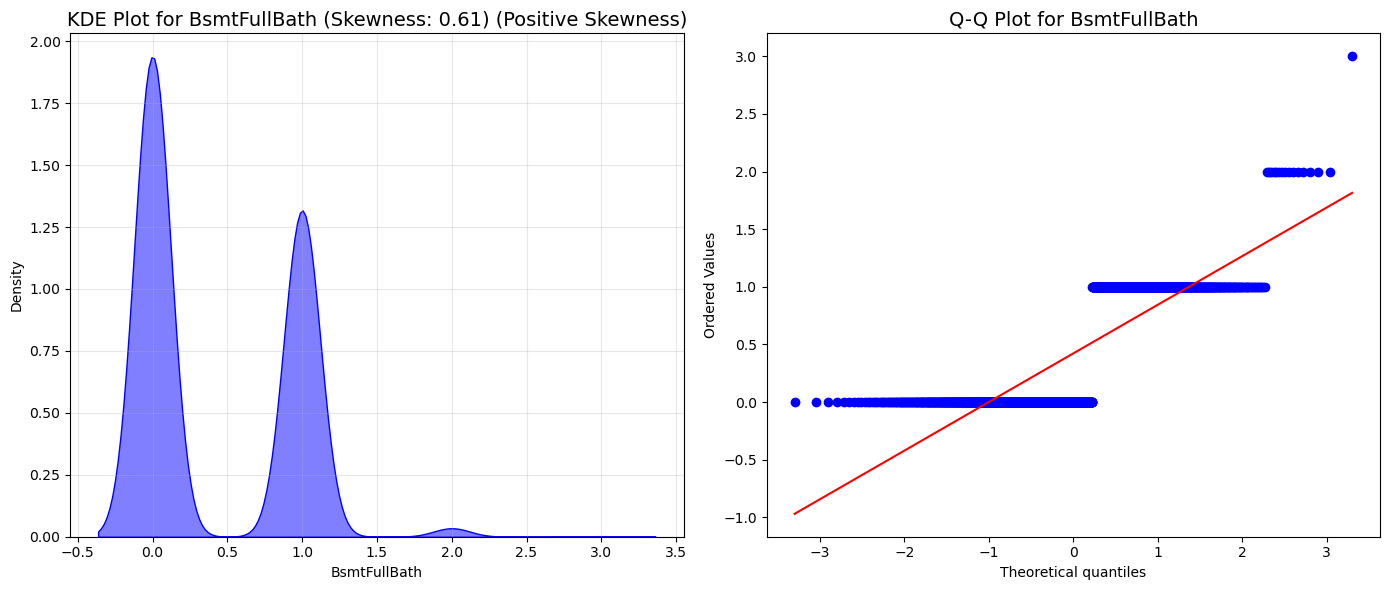

BsmtHalfBath: Skewness = 4.07 (Positive Skewness)


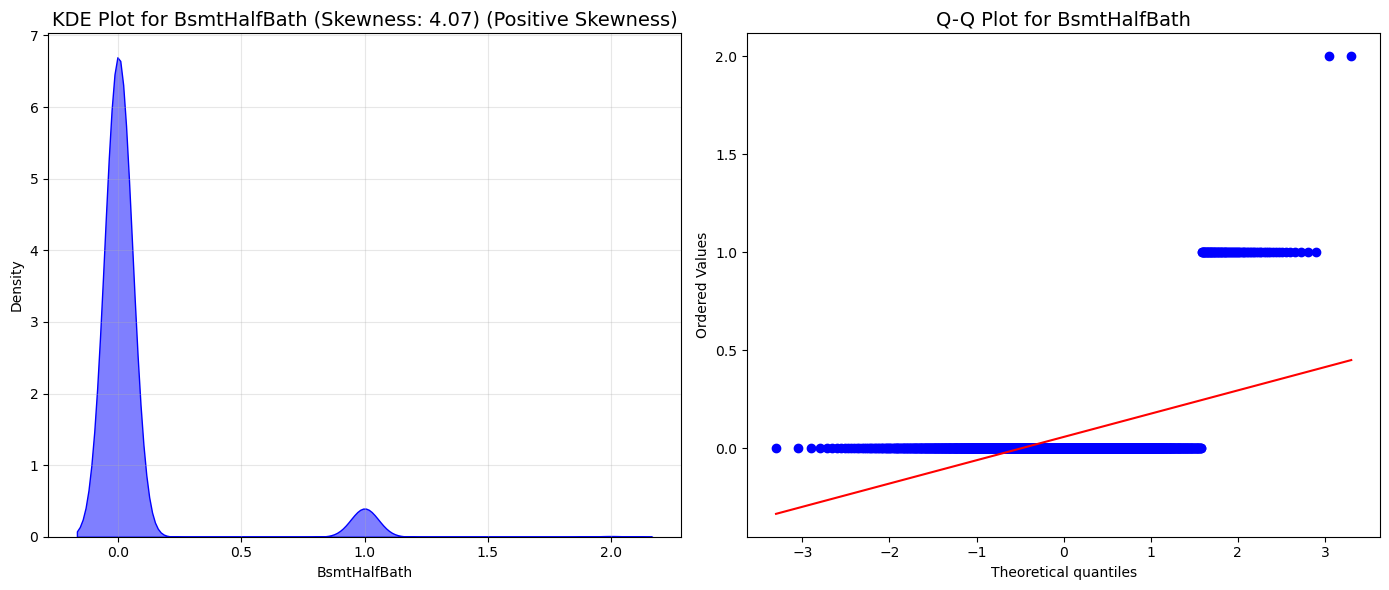

FullBath: Skewness = 0.04 (Positive Skewness)


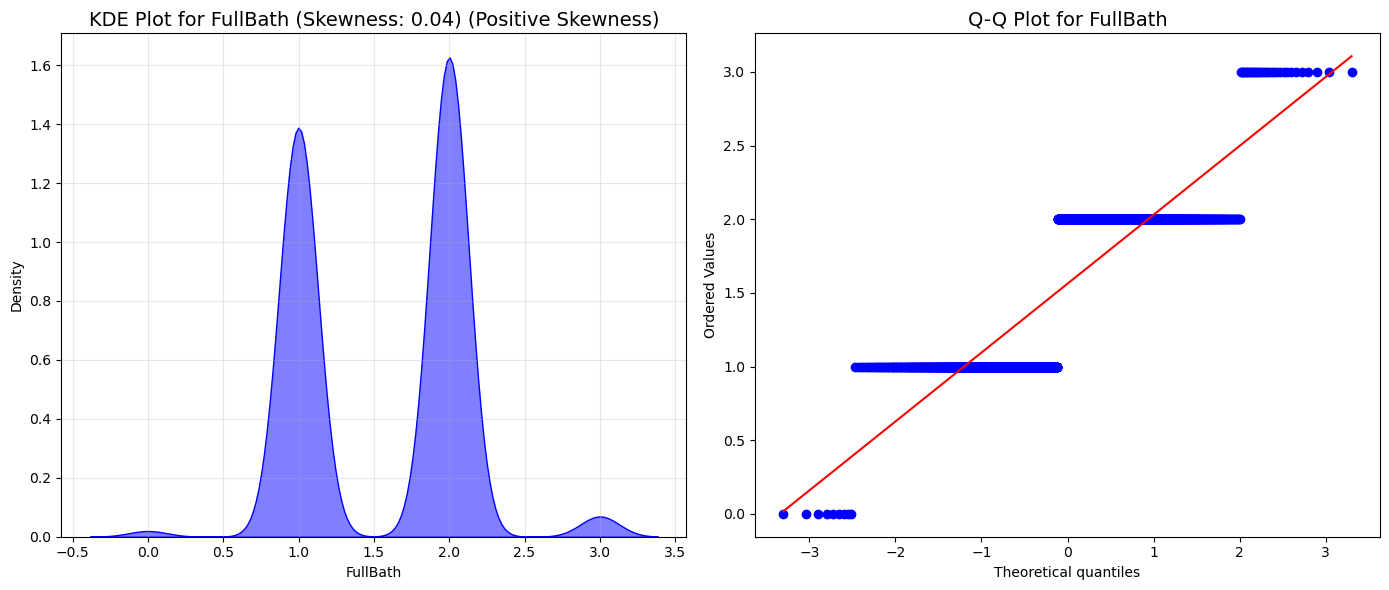

HalfBath: Skewness = 0.68 (Positive Skewness)


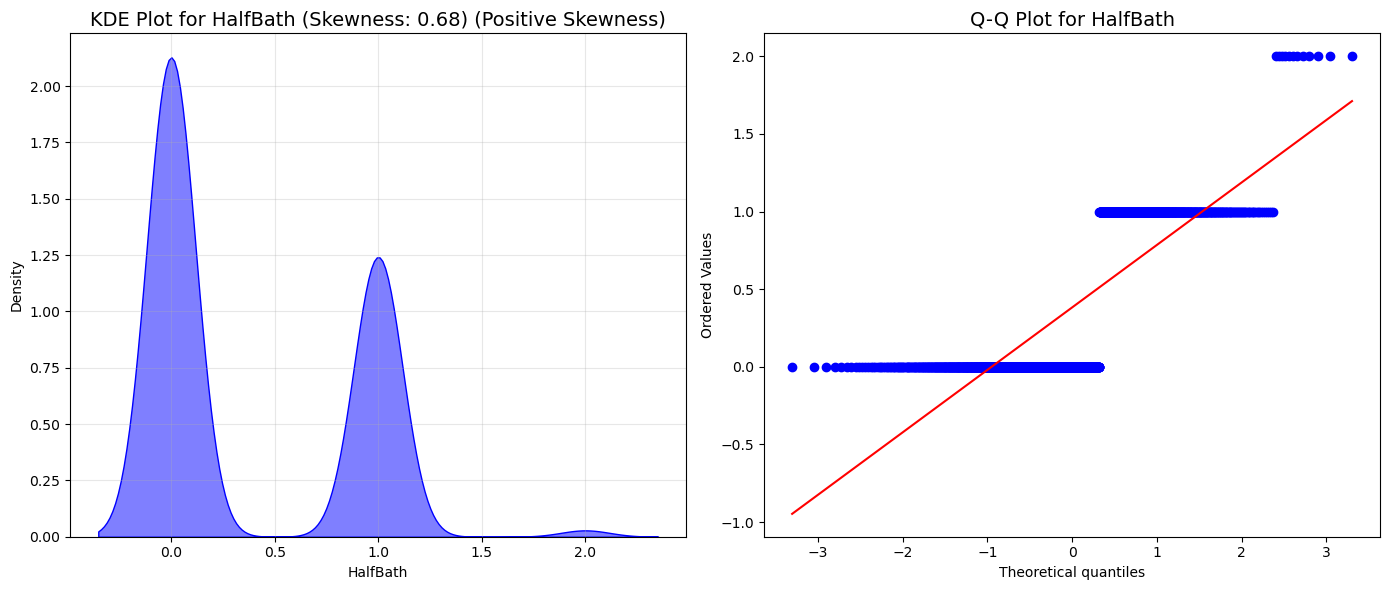

BedroomAbvGr: Skewness = 0.22 (Positive Skewness)


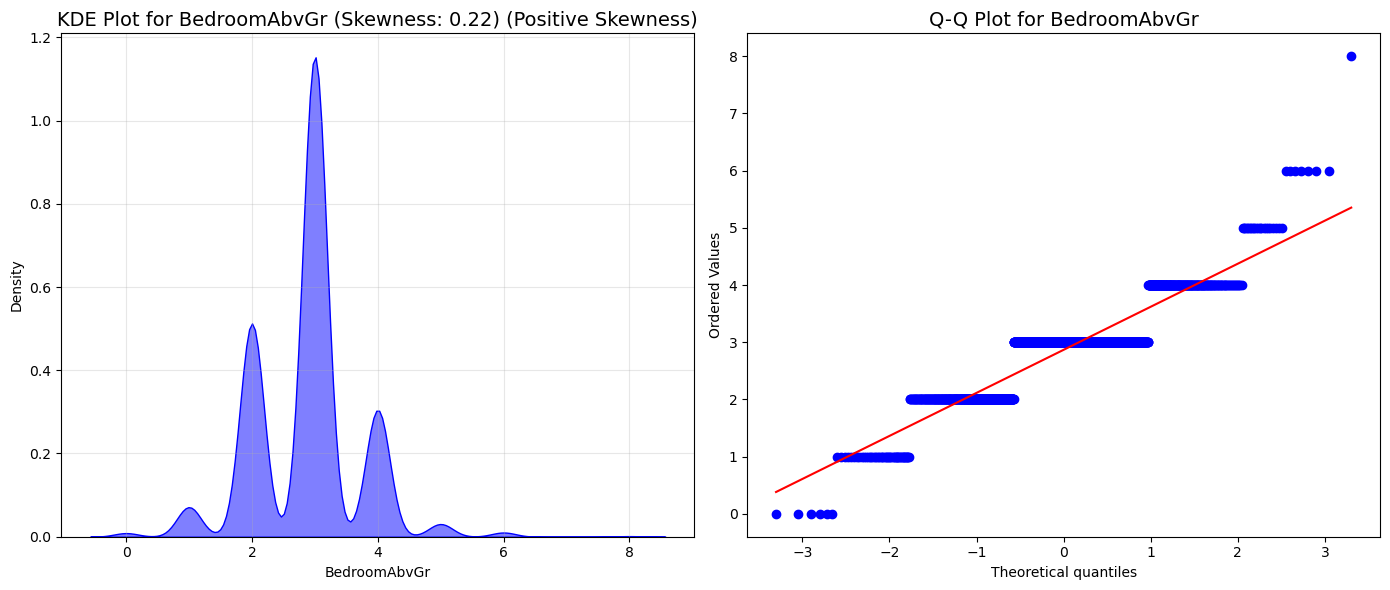

KitchenAbvGr: Skewness = 4.50 (Positive Skewness)


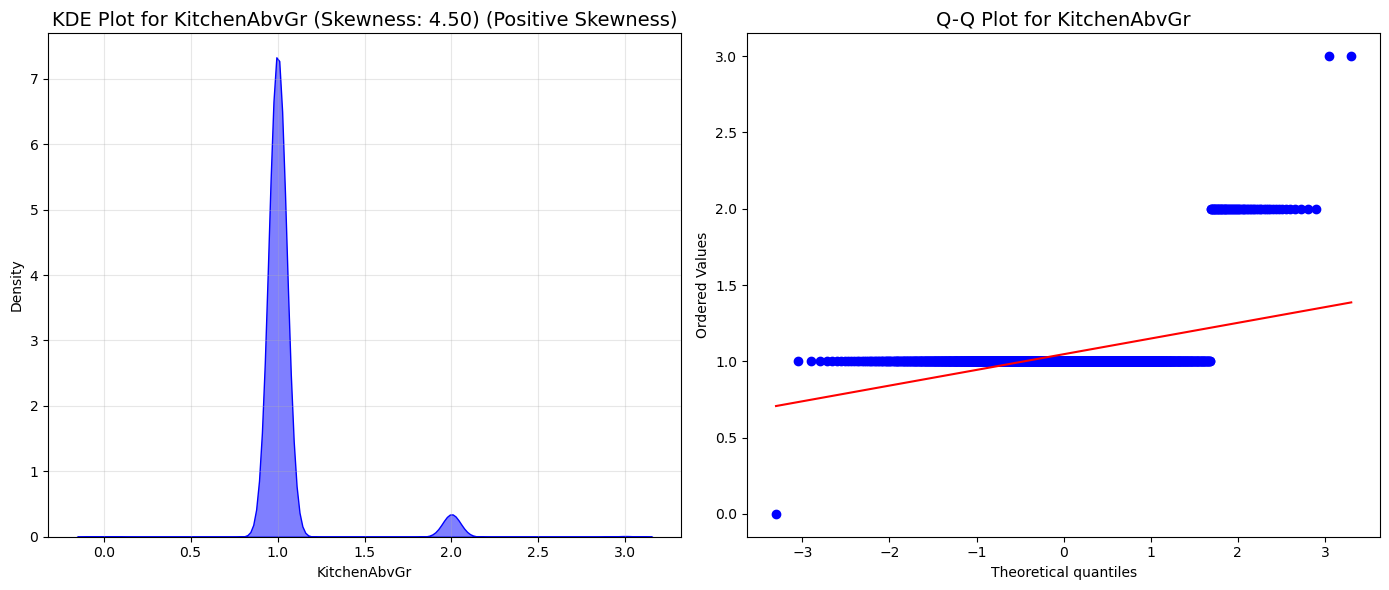

TotRmsAbvGrd: Skewness = 0.68 (Positive Skewness)


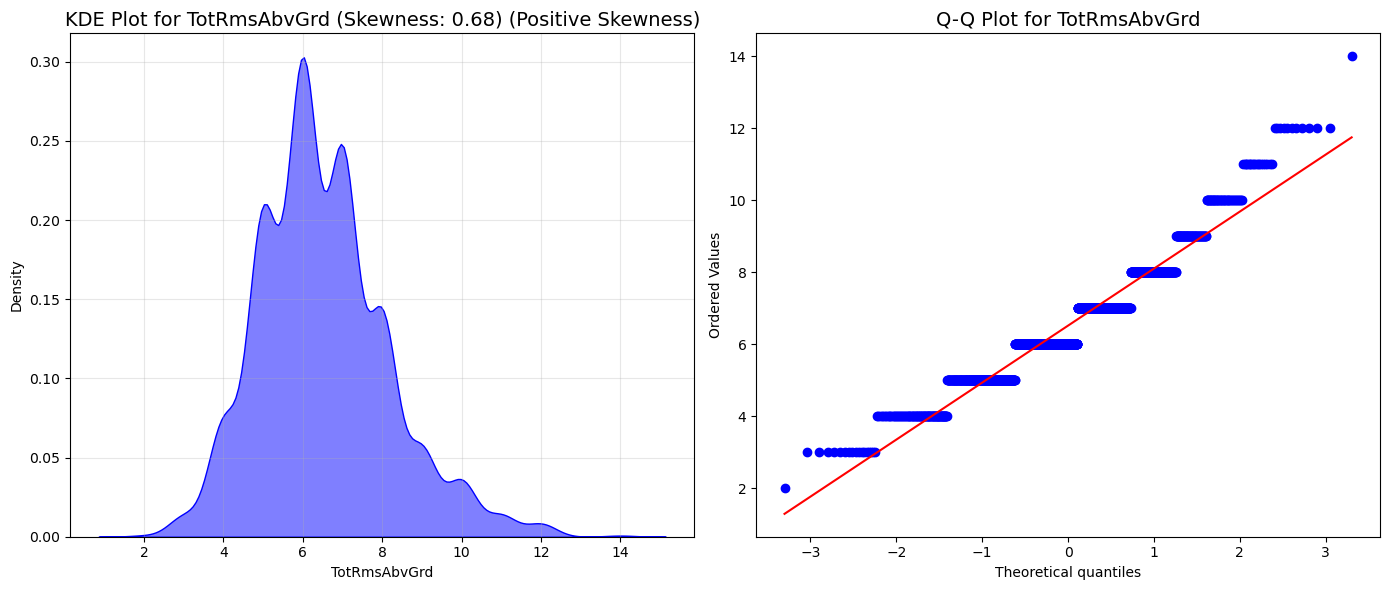

Fireplaces: Skewness = 0.65 (Positive Skewness)


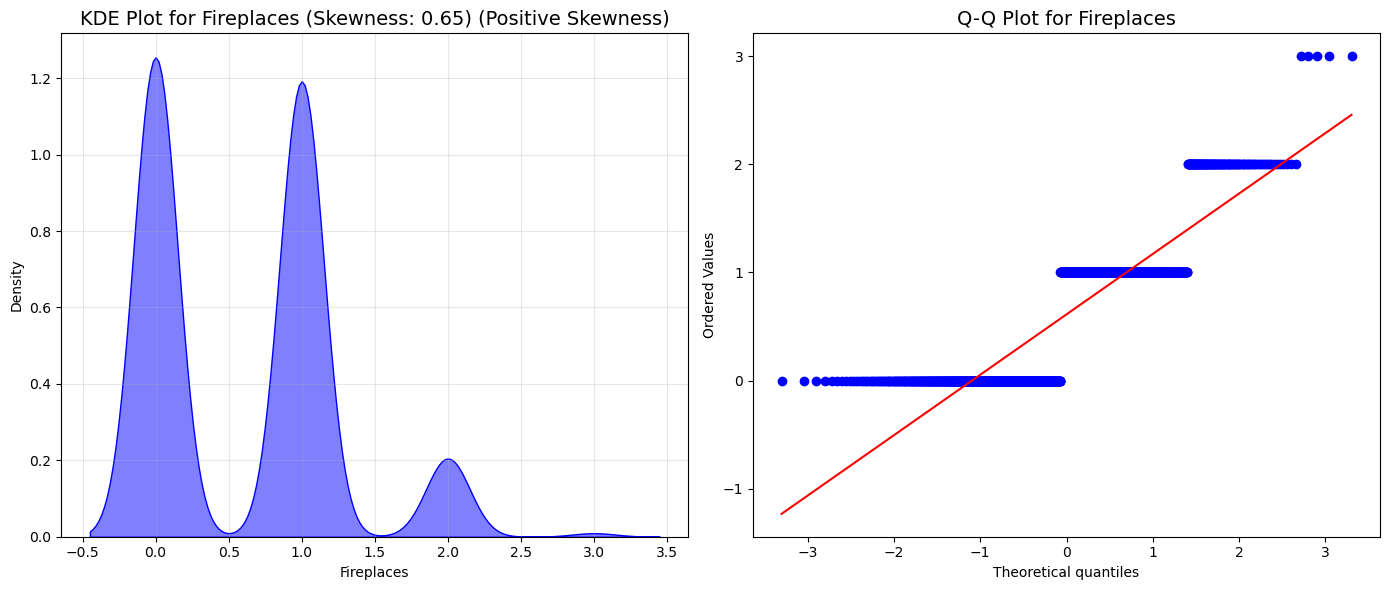

GarageCars: Skewness = -0.34 (Negative Skewness)


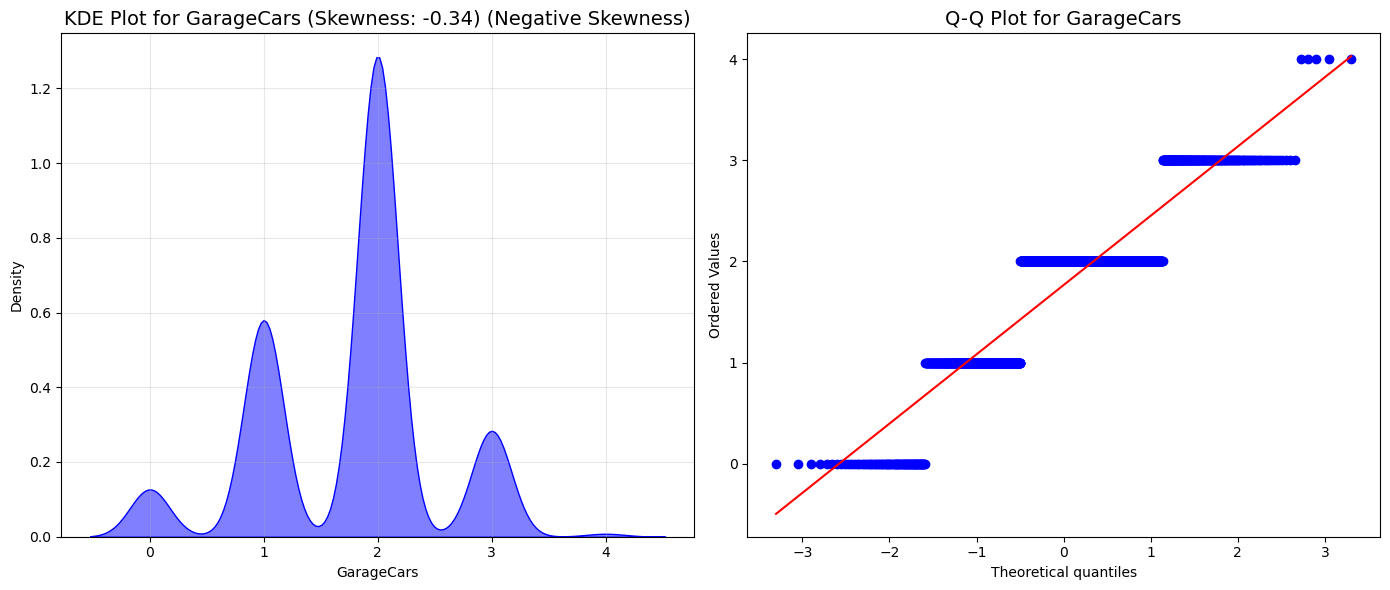

GarageArea: Skewness = 0.18 (Positive Skewness)


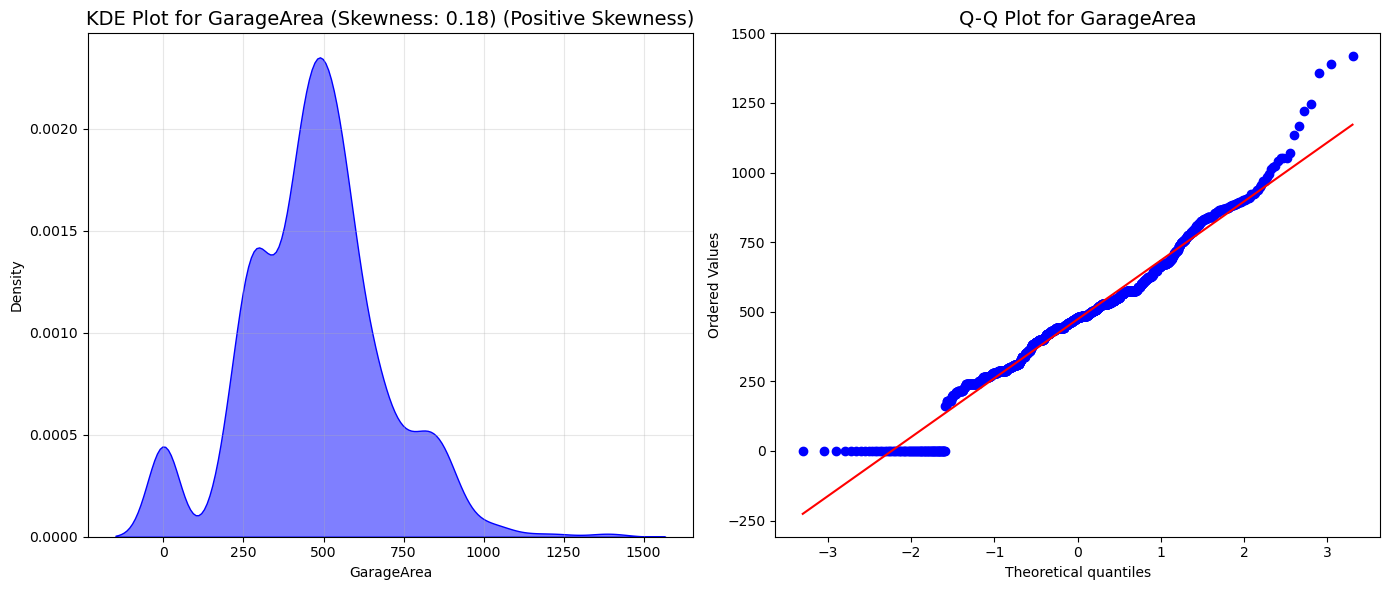

WoodDeckSF: Skewness = 1.50 (Positive Skewness)


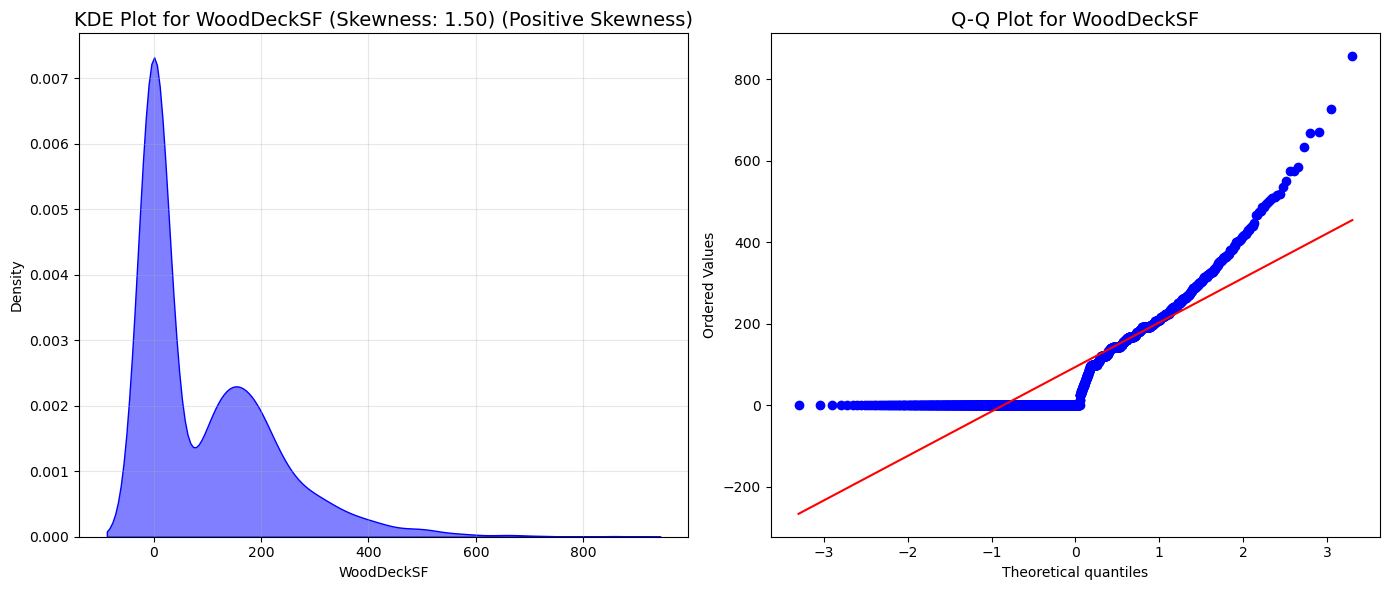

OpenPorchSF: Skewness = 2.38 (Positive Skewness)


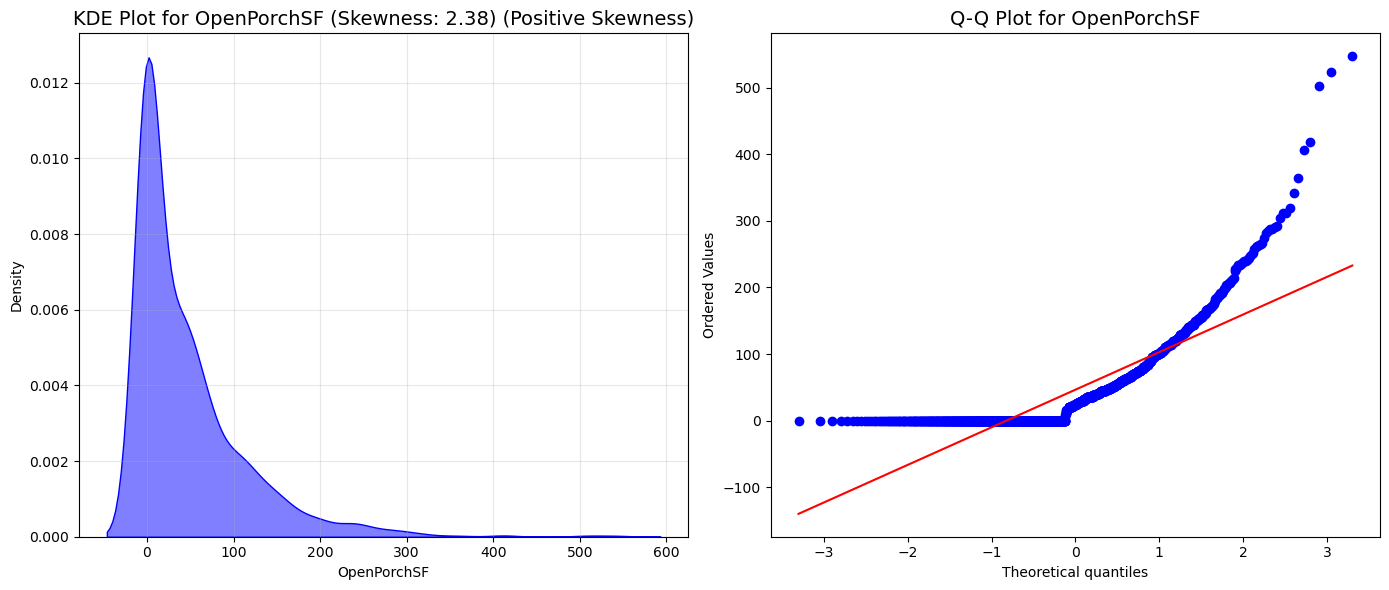

EnclosedPorch: Skewness = 3.09 (Positive Skewness)


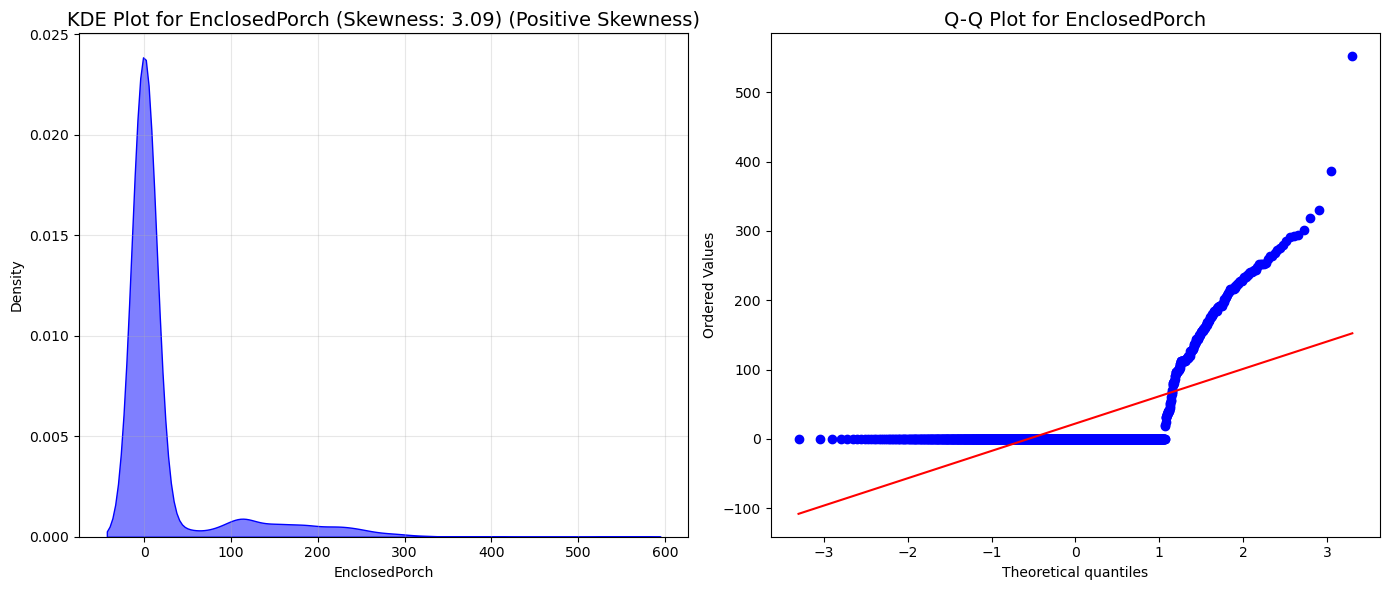

3SsnPorch: Skewness = 10.24 (Positive Skewness)


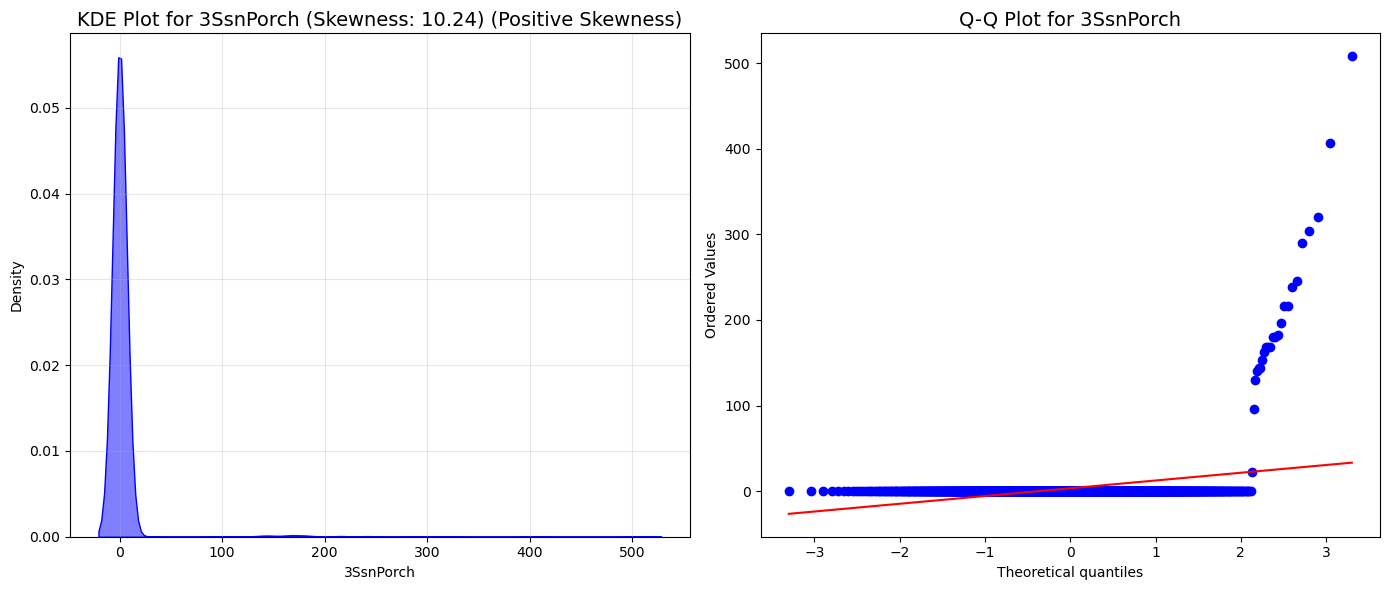

ScreenPorch: Skewness = 4.09 (Positive Skewness)


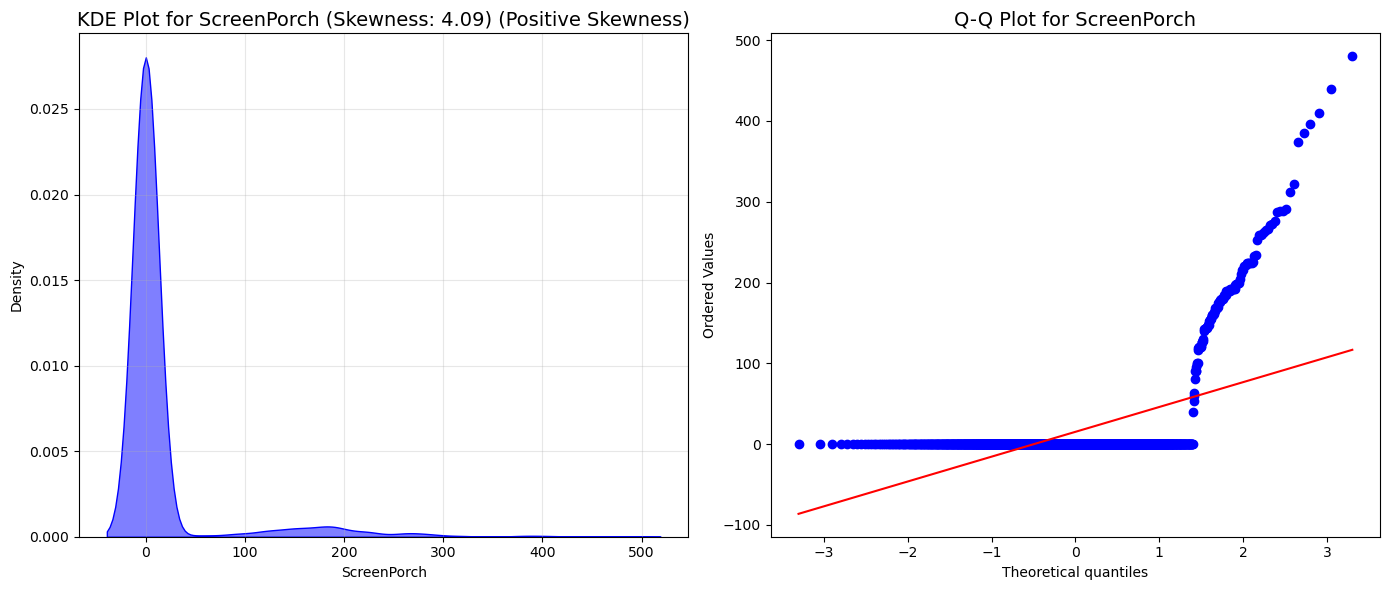

PoolArea: Skewness = 14.74 (Positive Skewness)


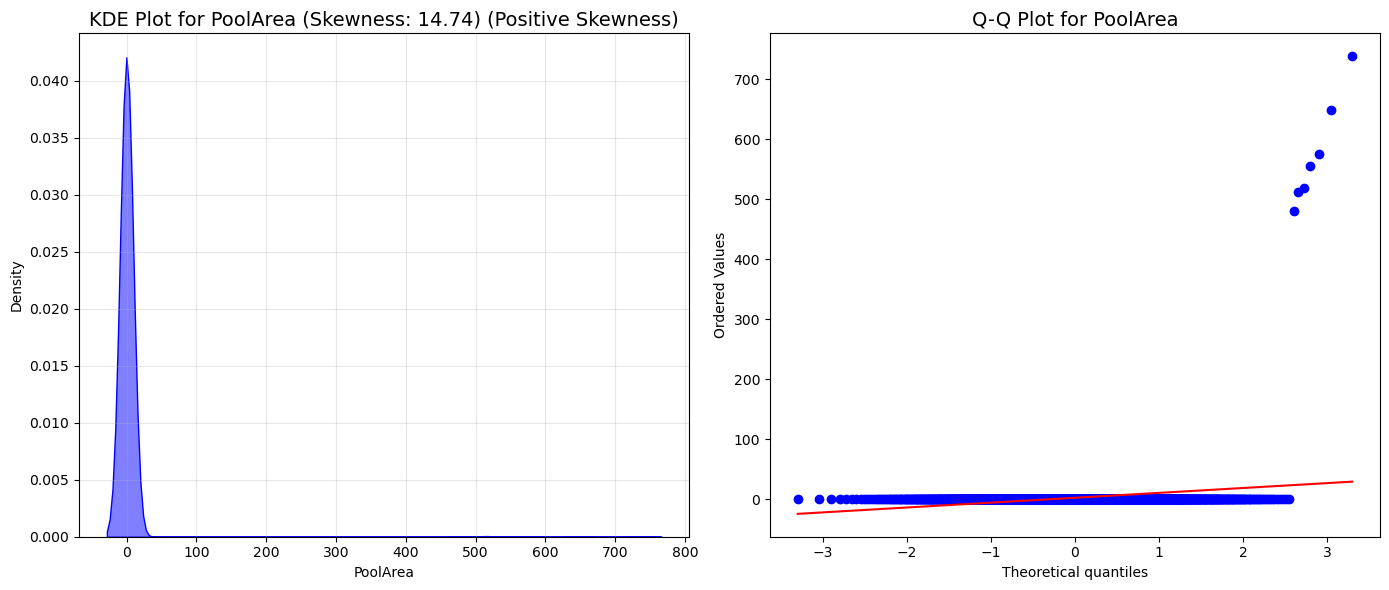

MiscVal: Skewness = 24.88 (Positive Skewness)


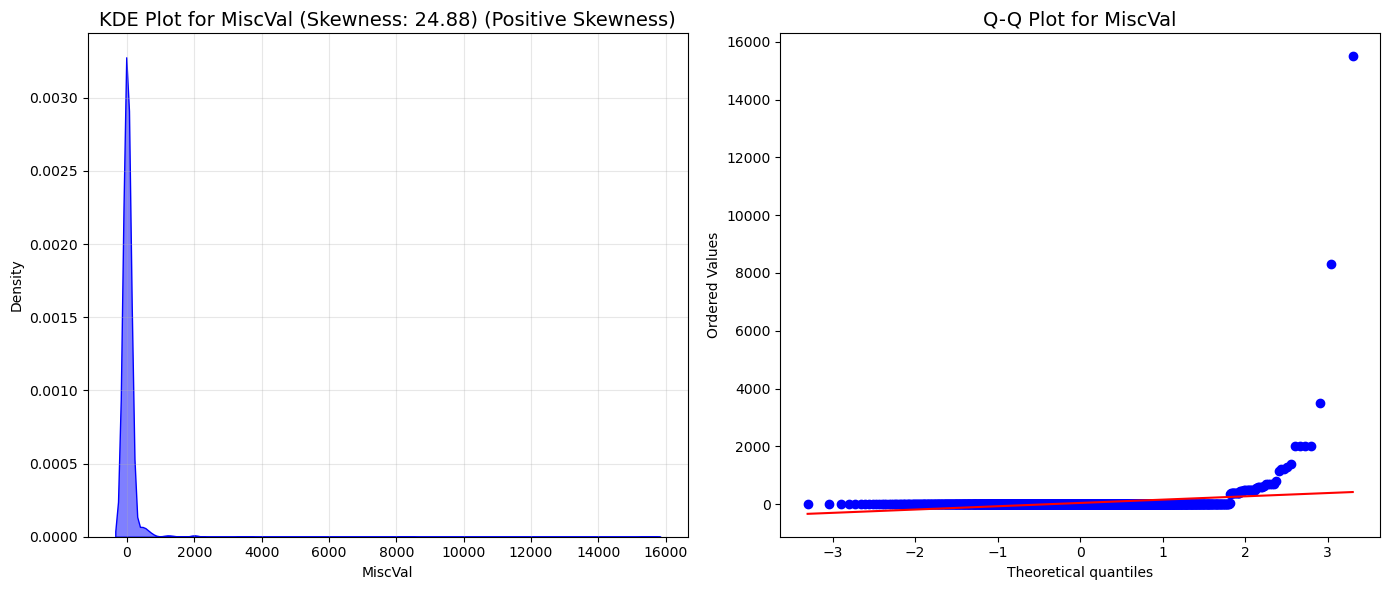

MoSold: Skewness = 0.21 (Positive Skewness)


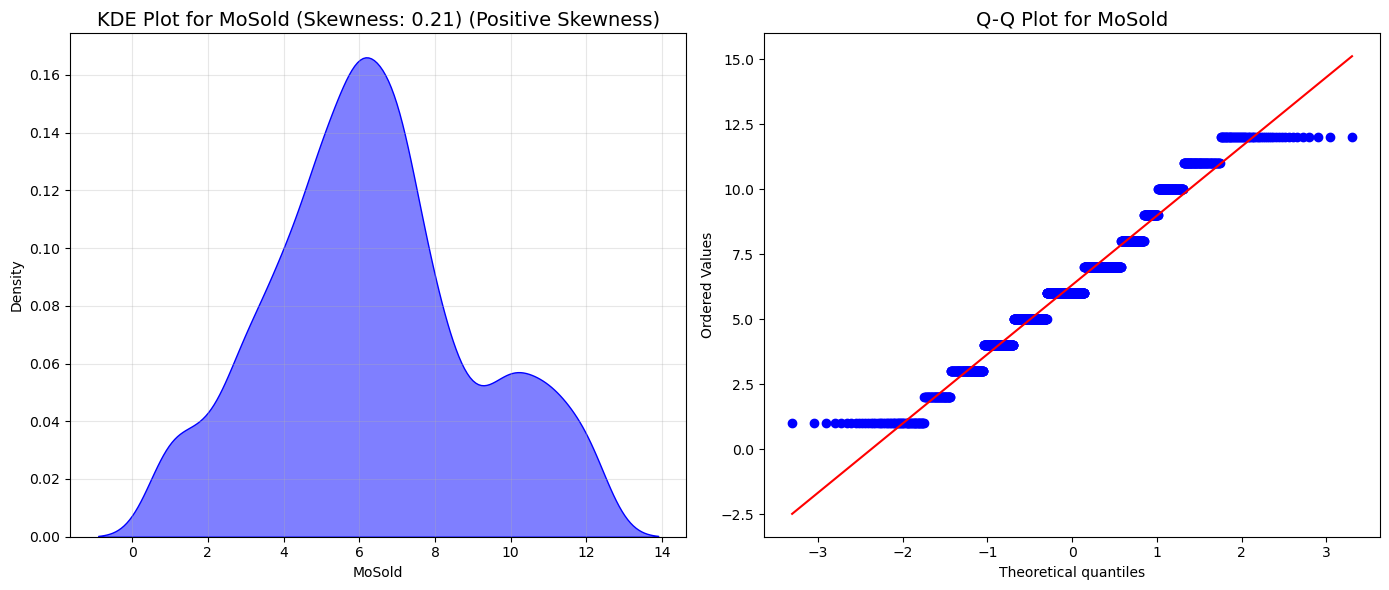

YrSold: Skewness = 0.10 (Positive Skewness)


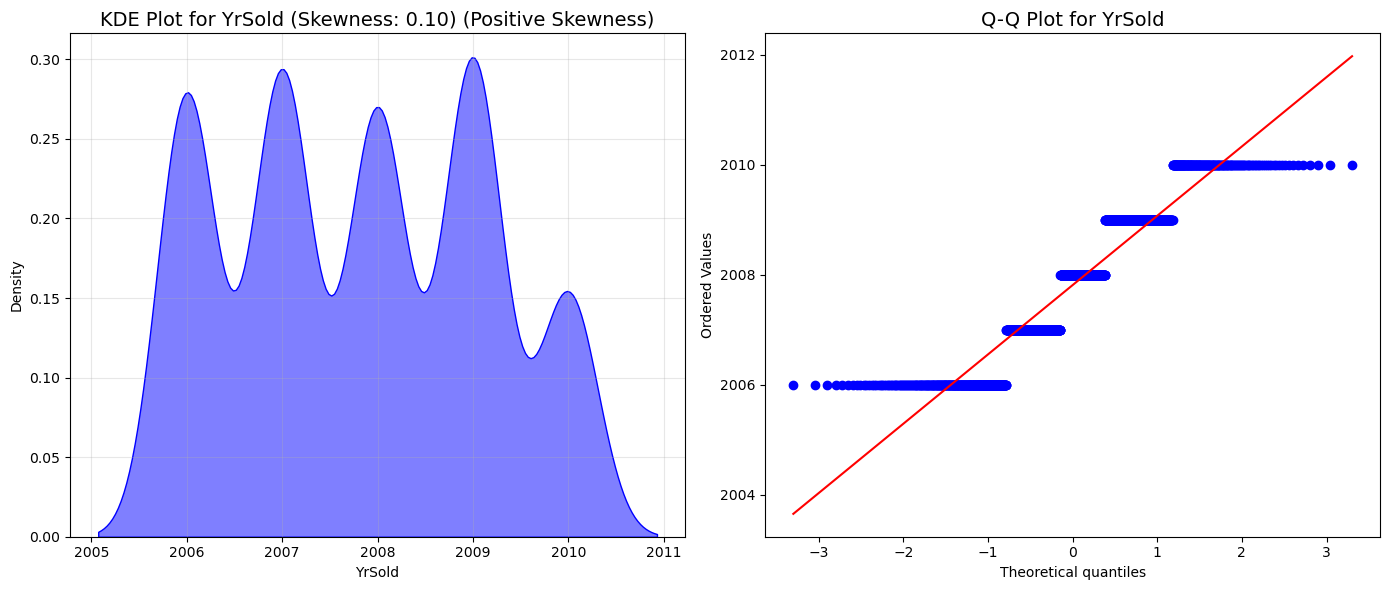

In [304]:
# Loop through each column in the DataFrame
col = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold']
for column in col:
    if np.issubdtype(X[column].dtype, np.number):  # Check if the column is numeric
        fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # Create a side-by-side plot
        
        skewness = X[column].skew()
        
        # Determine skewness type
        if skewness > 0:
            skew_type = "Positive Skewness"
        elif skewness < 0:
            skew_type = "Negative Skewness"
        else:
            skew_type = "Approximately Symmetrical"
        
        print(f"{column}: Skewness = {skewness:.2f} ({skew_type})")
        # KDE plot
        sns.kdeplot(X[column].dropna(), fill=True, color='blue', alpha=0.5, ax=axes[0])
        skewness = X[column].skew()  # Calculate skewness
        axes[0].set_title(f"KDE Plot for {column} (Skewness: {skewness:.2f}) ({skew_type})", fontsize=14)
        axes[0].set_xlabel(column)
        axes[0].set_ylabel('Density')
        axes[0].grid(alpha=0.3)
        
        # Q-Q plot
        stats.probplot(X[column].dropna(), dist="norm", plot=axes[1])
        axes[1].set_title(f"Q-Q Plot for {column}", fontsize=14)
        
        plt.tight_layout()
        plt.show()

In [305]:
columns_to_transform = [
    'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
    'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
    'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
    'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
    'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
    'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
    'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
    'MoSold', 'YrSold'
]

# Initialize the PowerTransformer with Yeo-Johnson method
pt = PowerTransformer(method='yeo-johnson')

# Fit and transform the specified columns
X[columns_to_transform] = pt.fit_transform(X[columns_to_transform])

C:\Users\parvez\anaconda3\Lib\site-packages\numpy\core\_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


MSSubClass: Skewness = 0.07 (Positive Skewness)


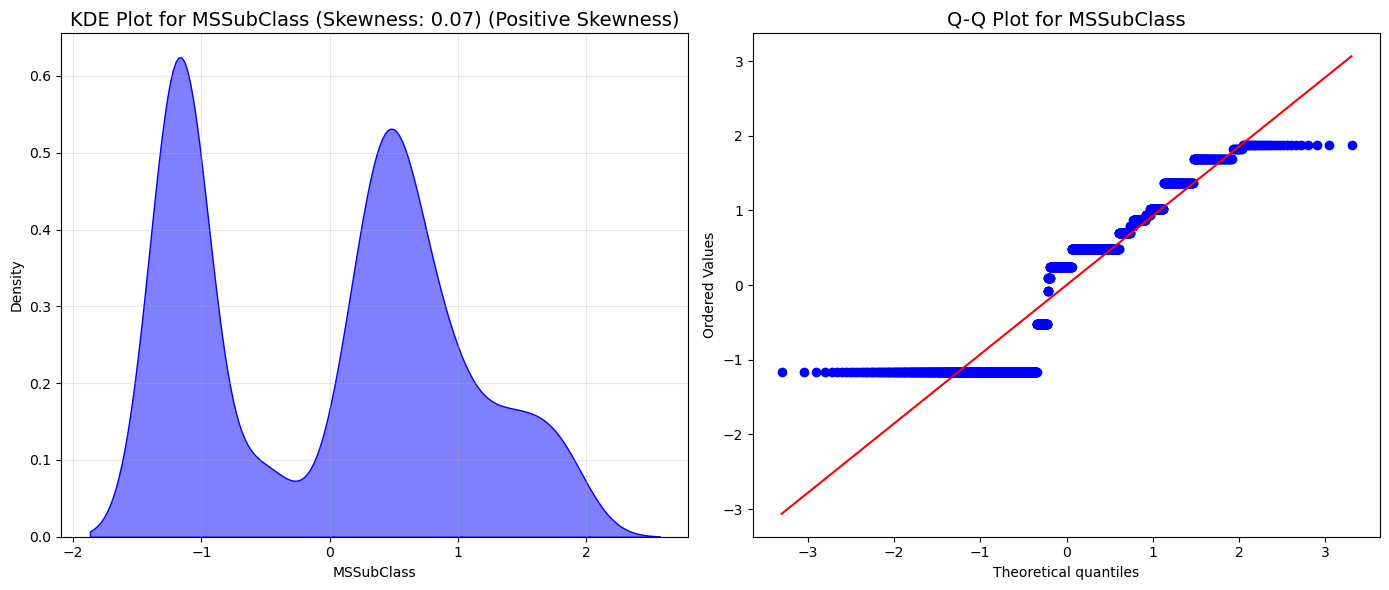

LotFrontage: Skewness = 0.11 (Positive Skewness)


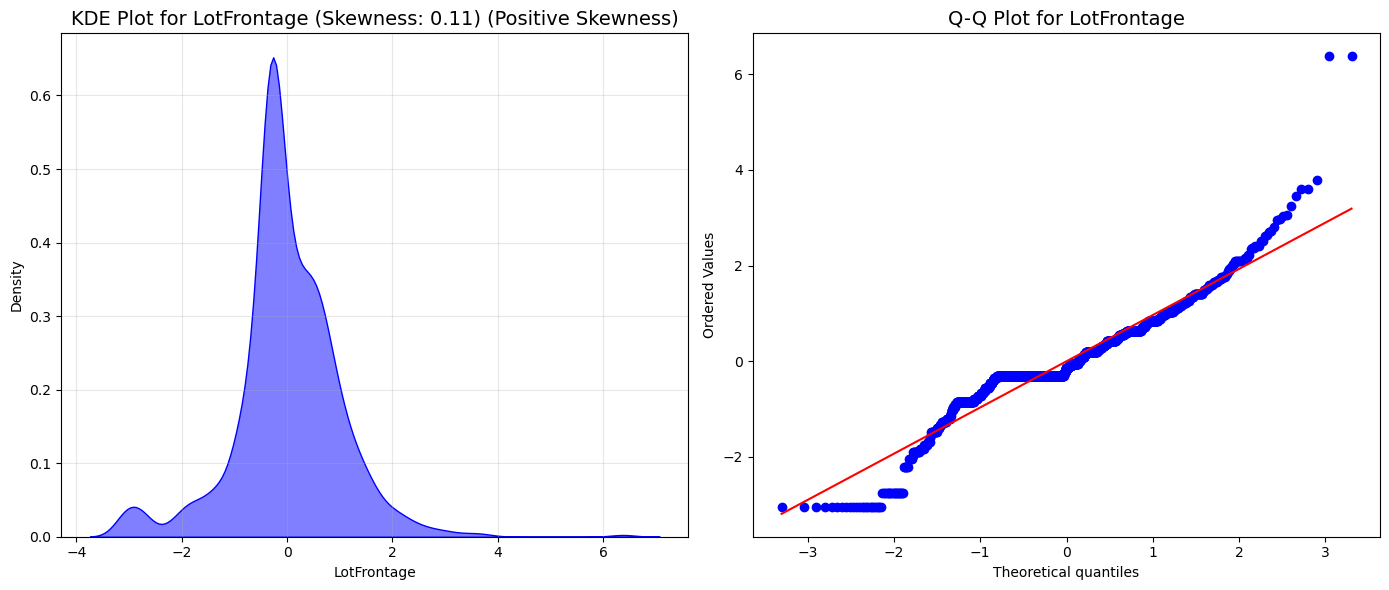

LotArea: Skewness = 0.03 (Positive Skewness)


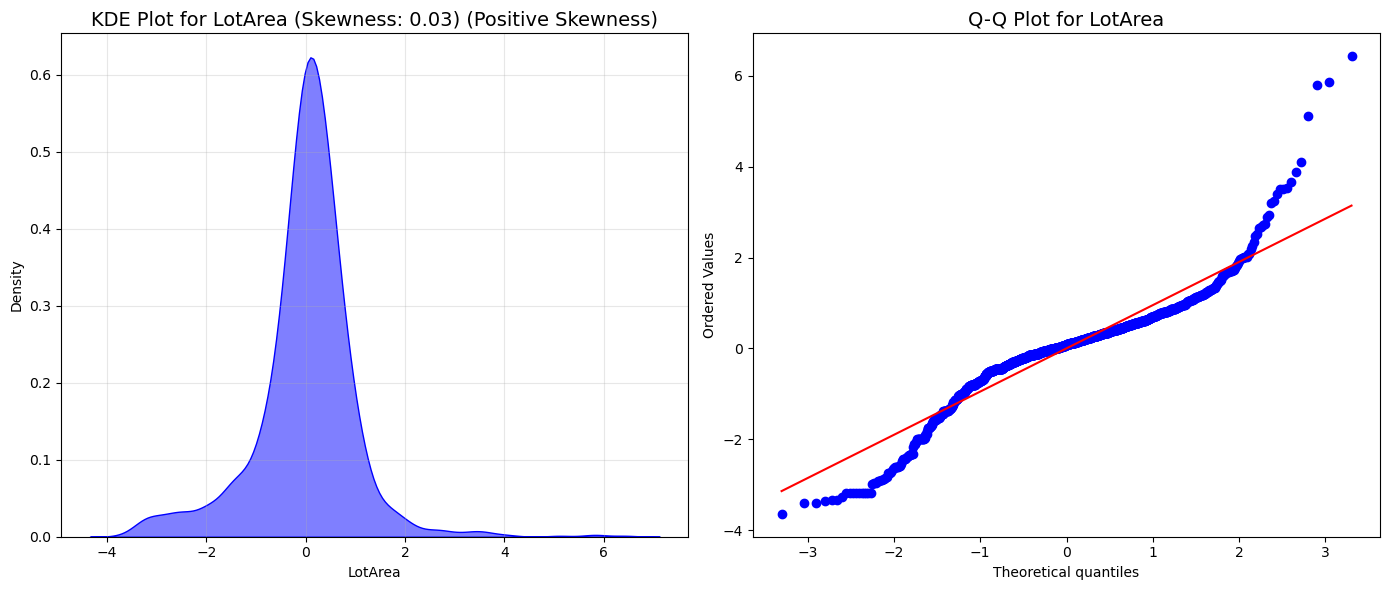

OverallQual: Skewness = 0.02 (Positive Skewness)


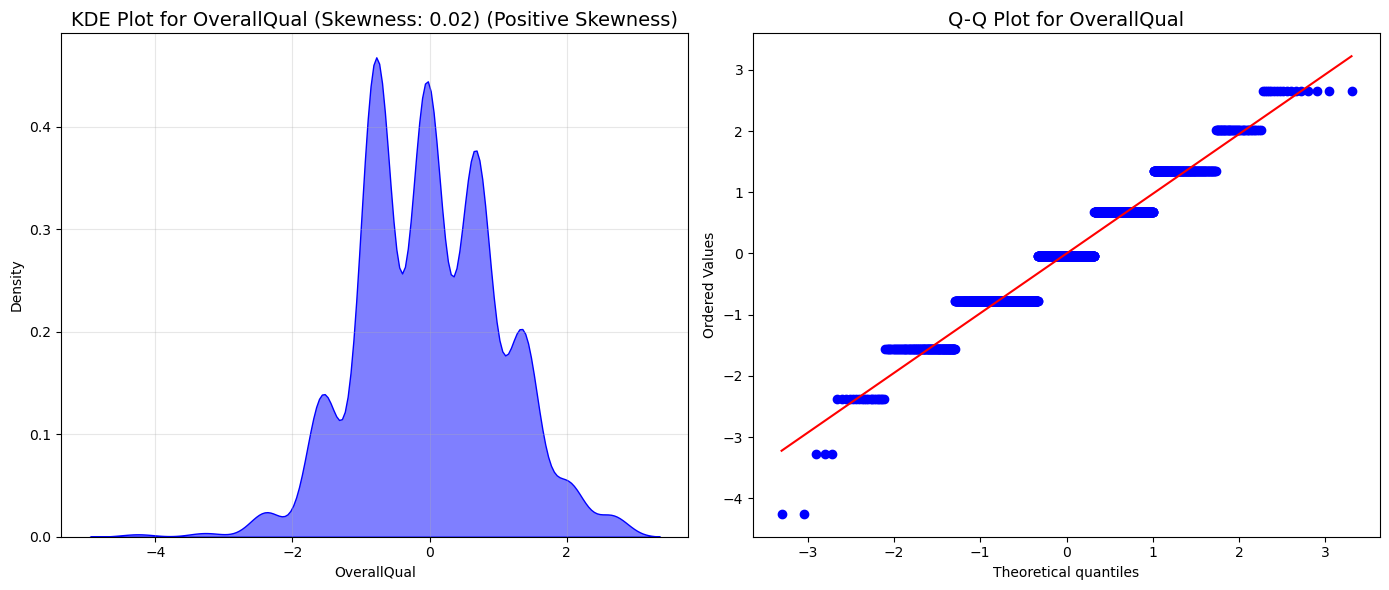

OverallCond: Skewness = 0.03 (Positive Skewness)


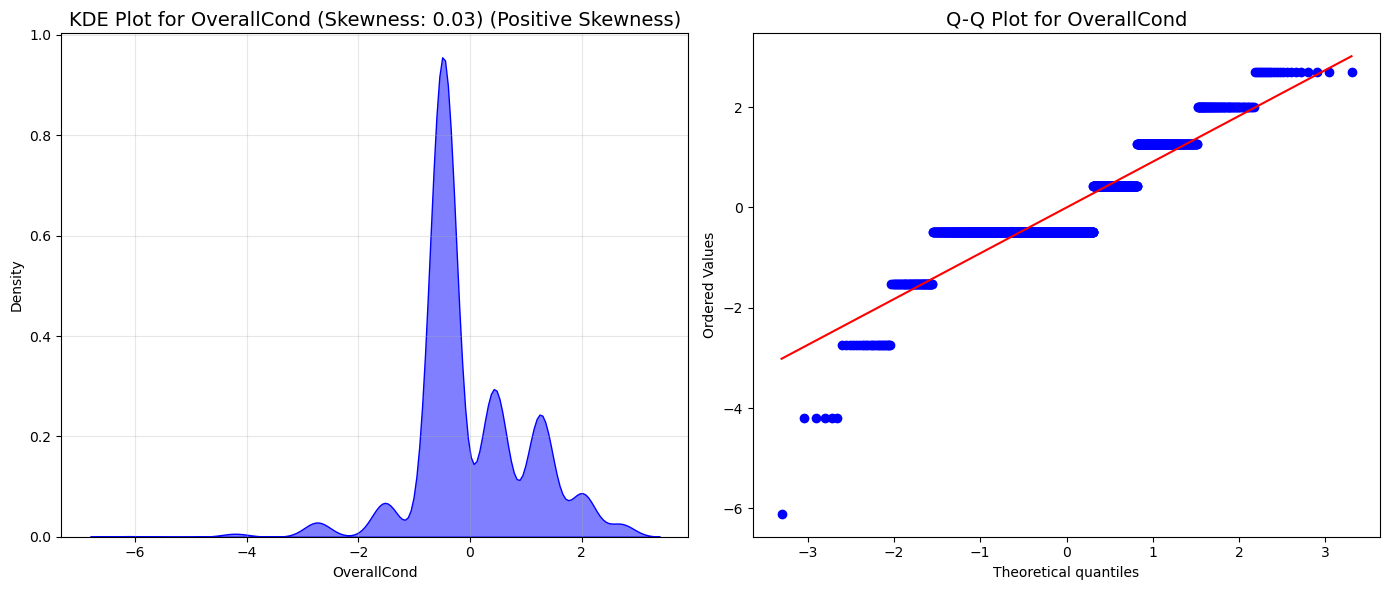

YearBuilt: Skewness = -0.13 (Negative Skewness)


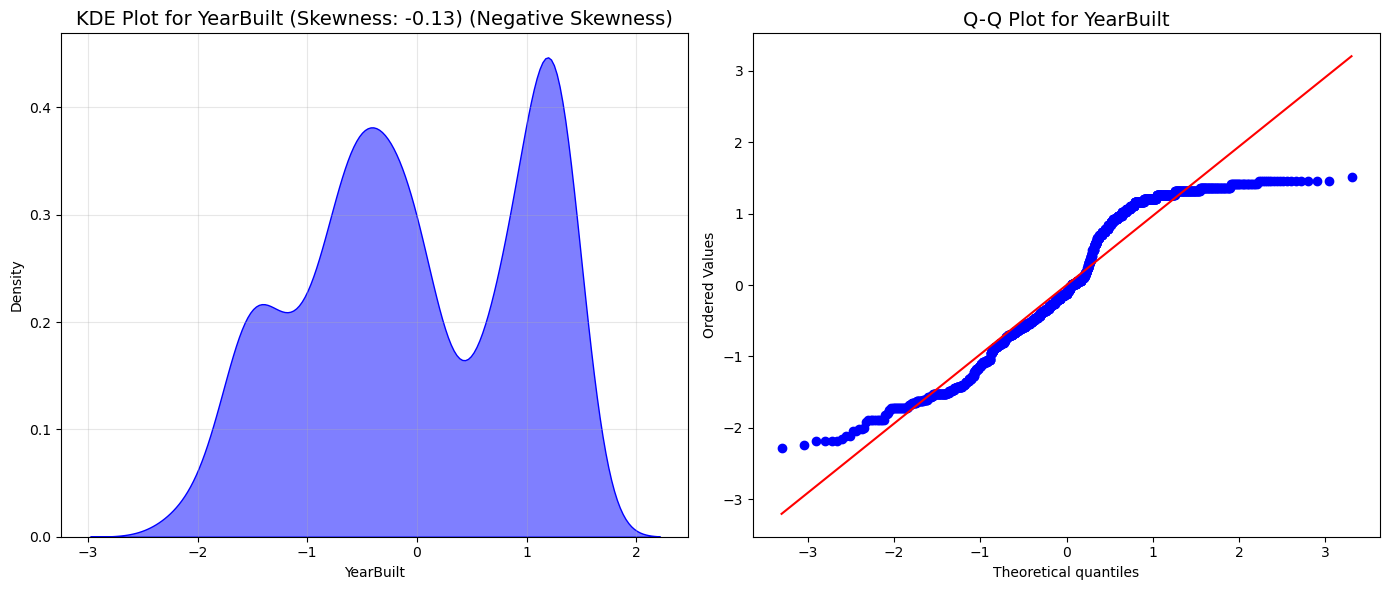

YearRemodAdd: Skewness = -0.22 (Negative Skewness)


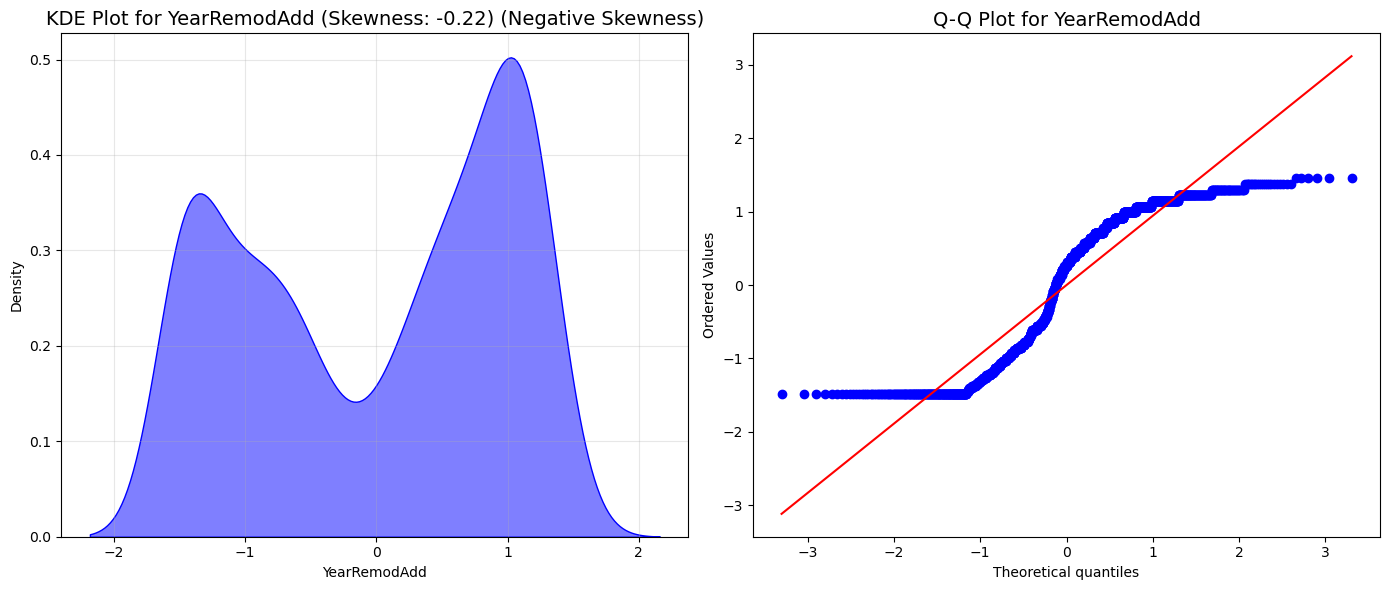

MasVnrArea: Skewness = 0.42 (Positive Skewness)


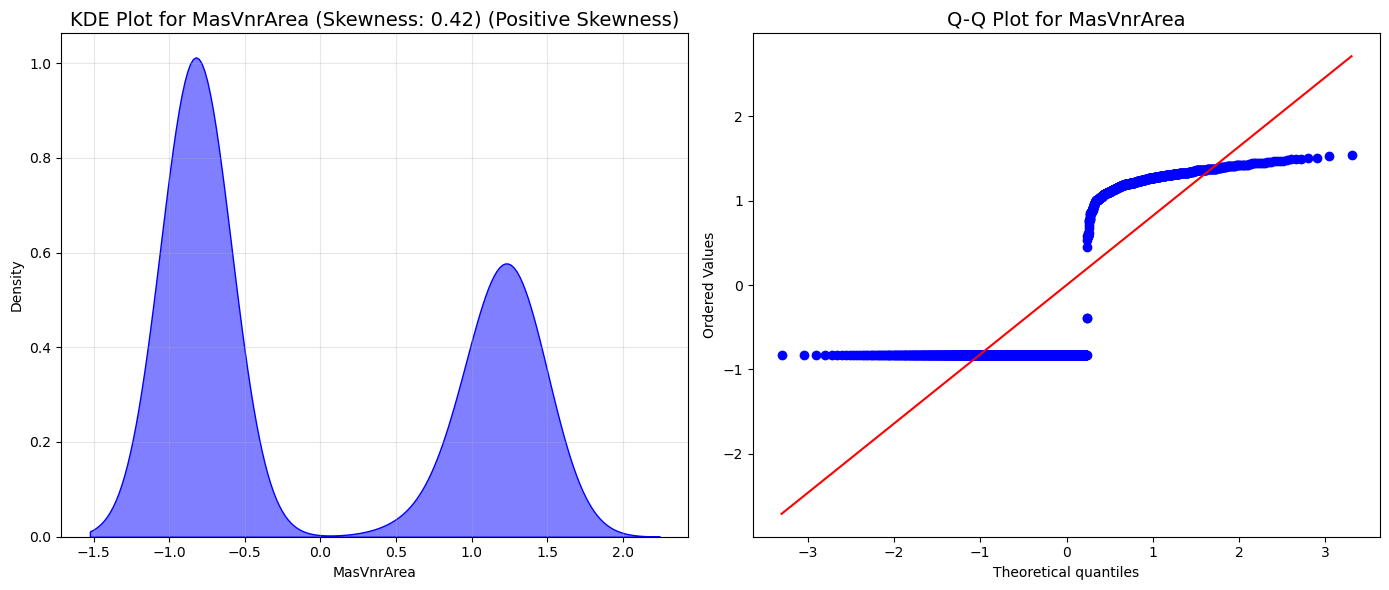

BsmtFinSF1: Skewness = -0.41 (Negative Skewness)


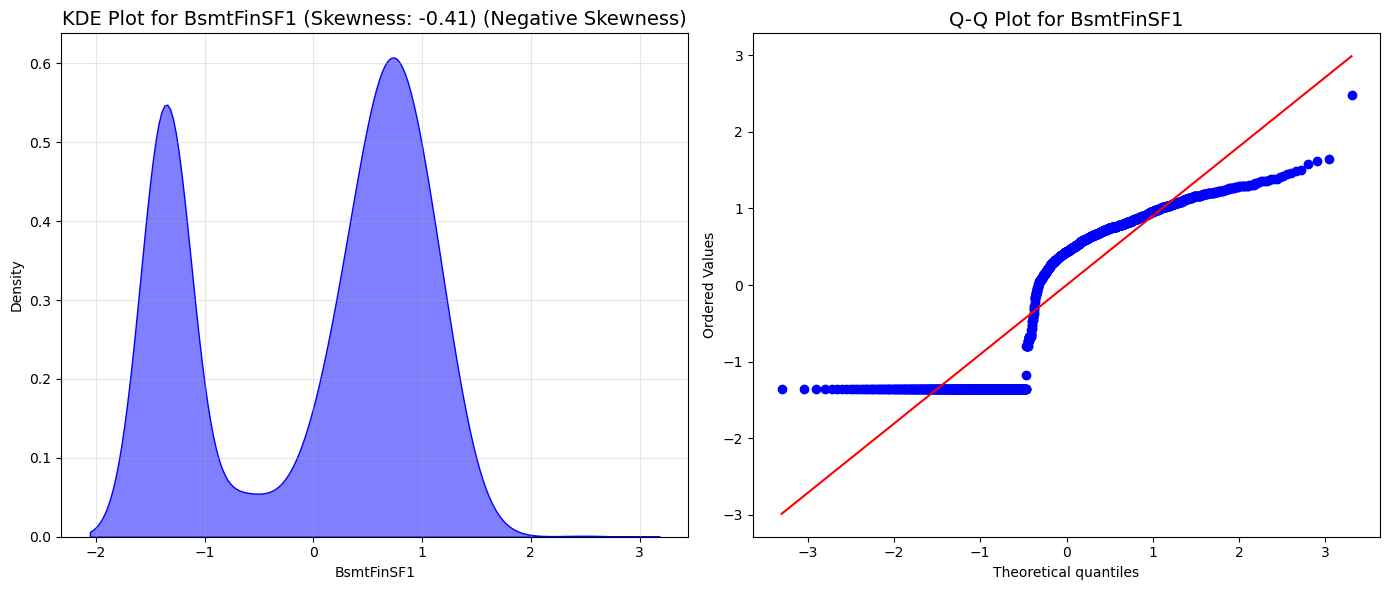

BsmtFinSF2: Skewness = 2.44 (Positive Skewness)


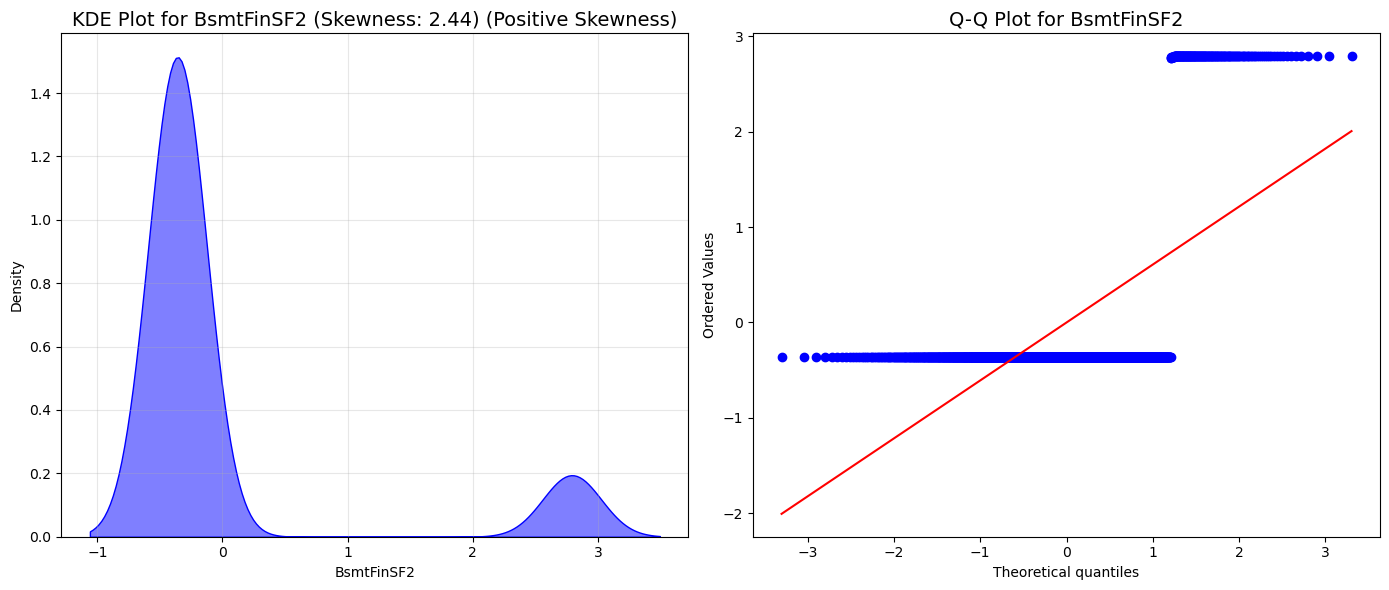

BsmtUnfSF: Skewness = -0.27 (Negative Skewness)


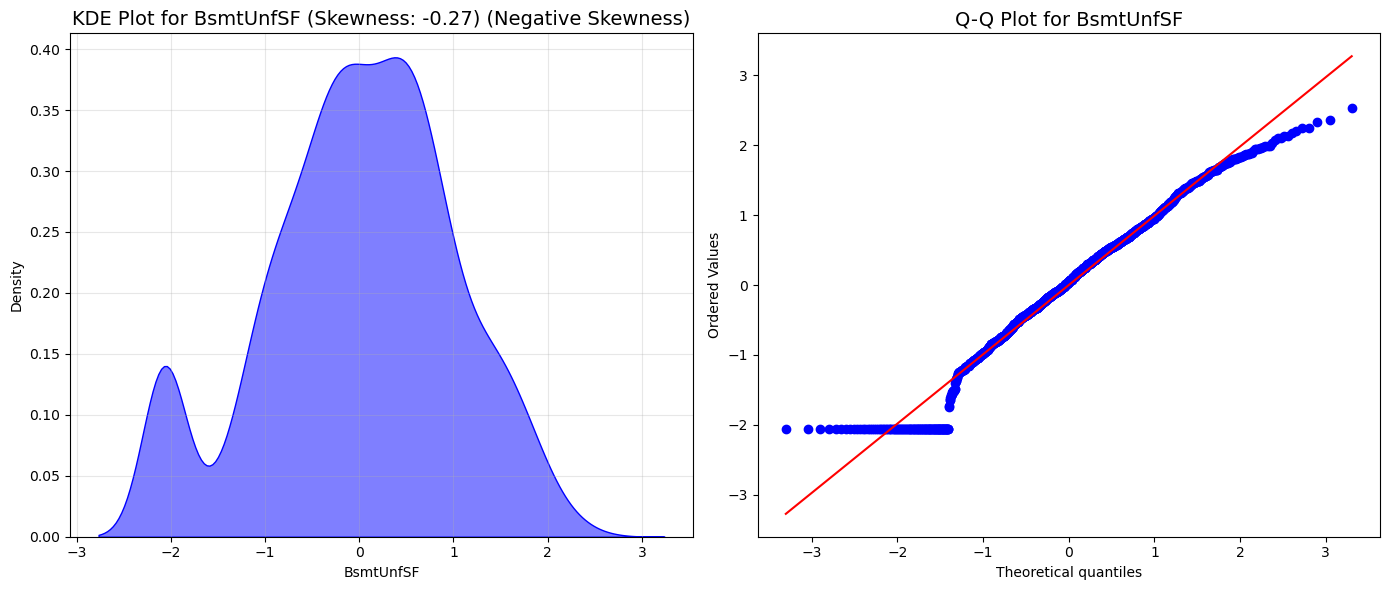

TotalBsmtSF: Skewness = 0.23 (Positive Skewness)


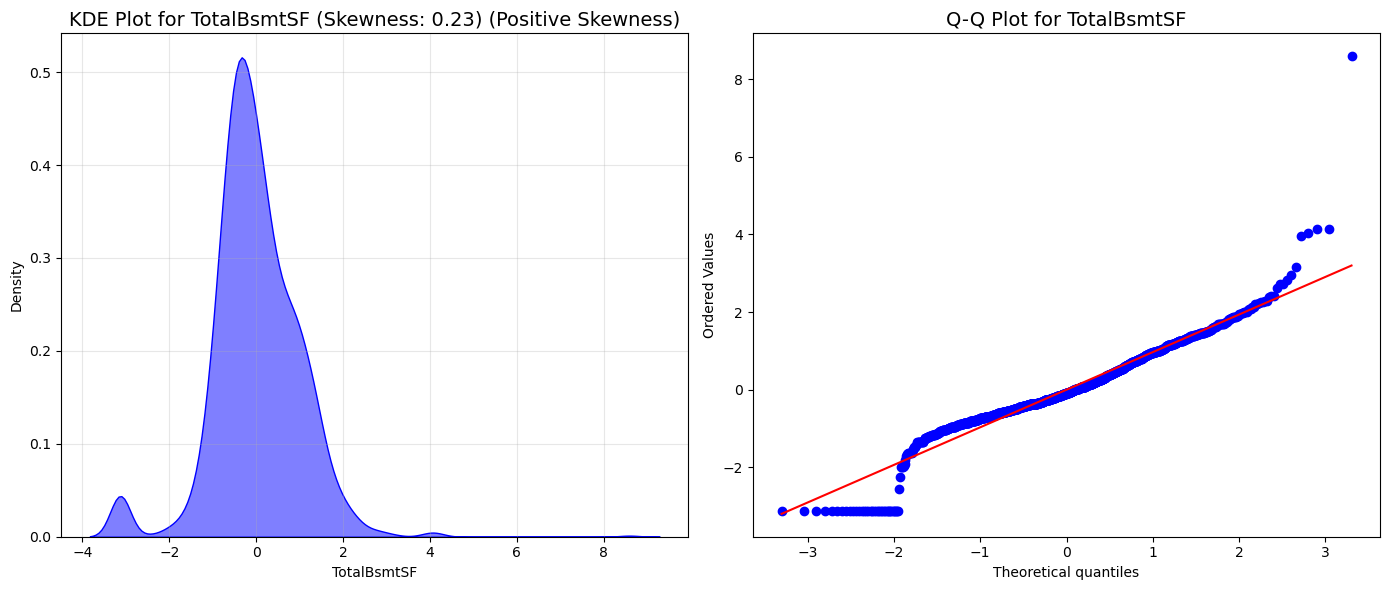

1stFlrSF: Skewness = -0.00 (Negative Skewness)


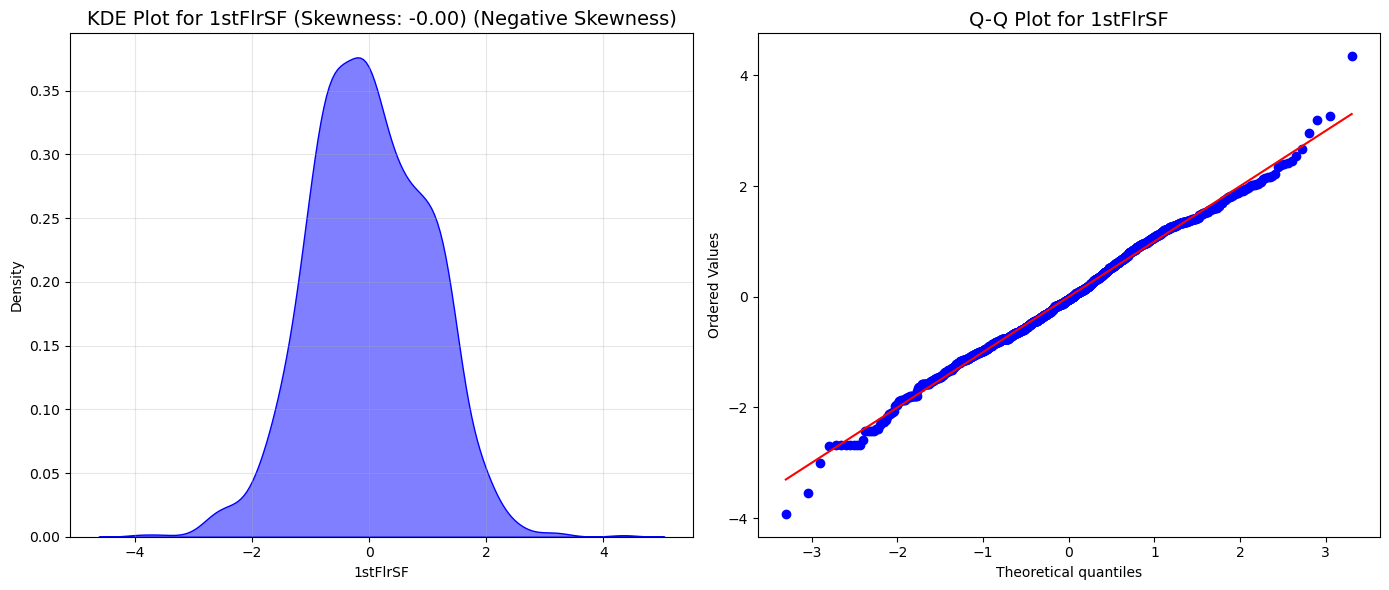

2ndFlrSF: Skewness = 0.28 (Positive Skewness)


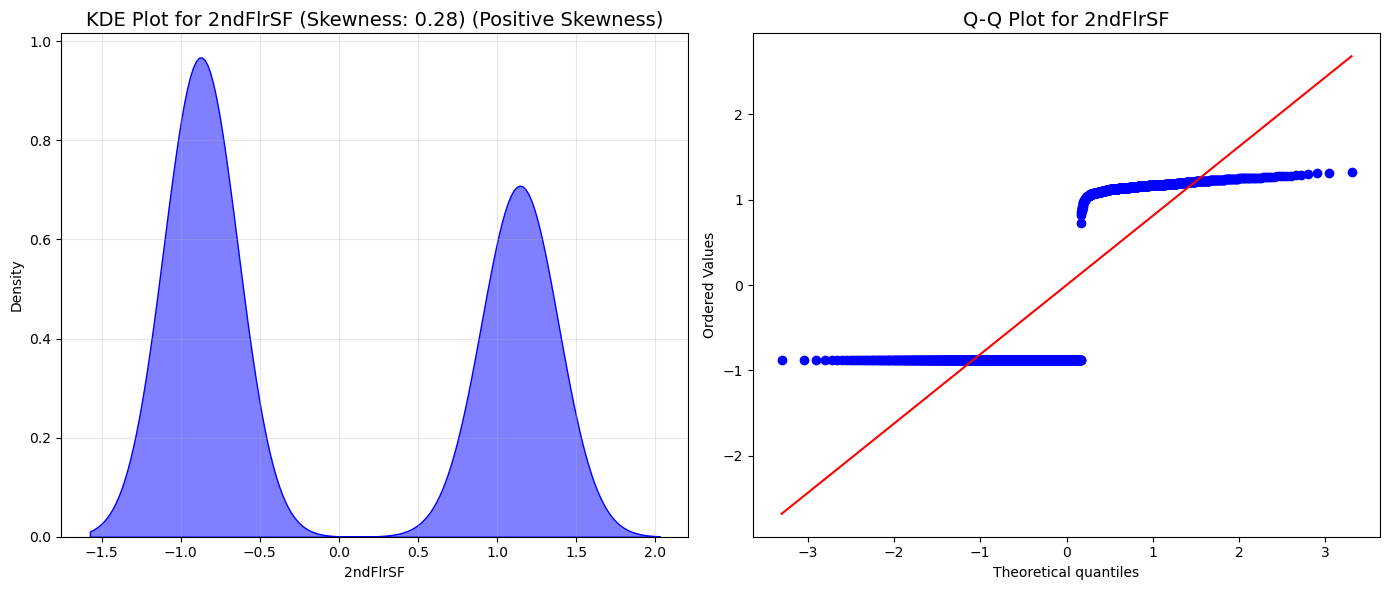

LowQualFinSF: Skewness = 7.25 (Positive Skewness)


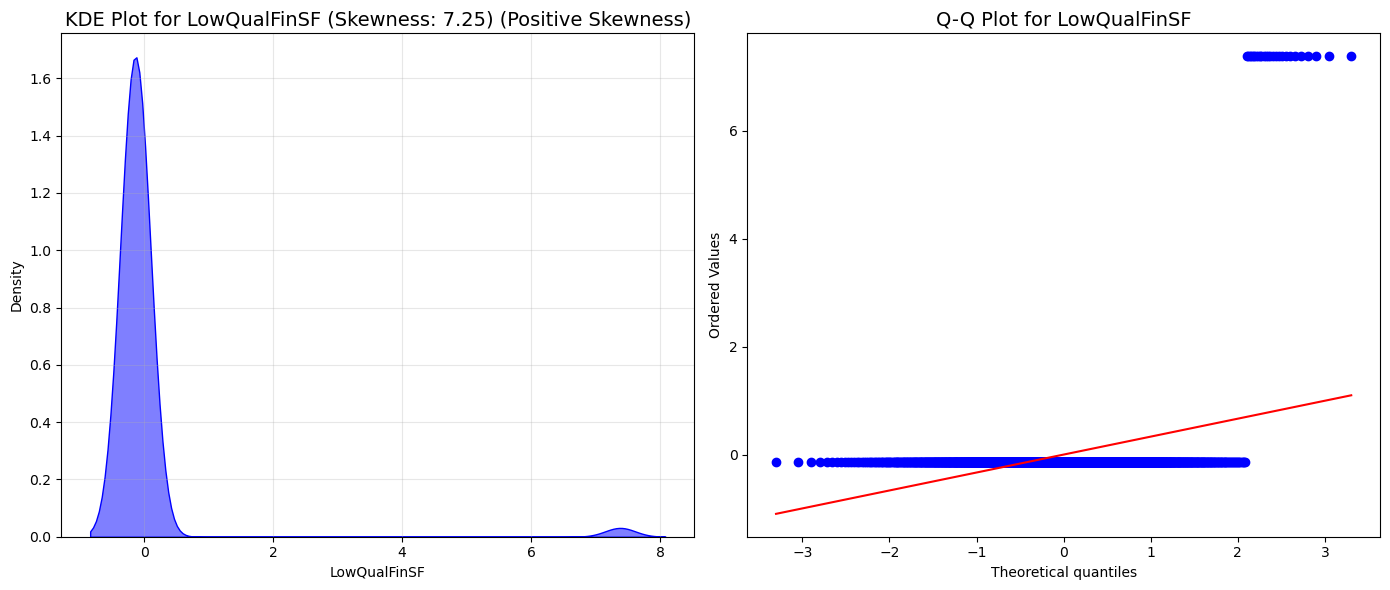

GrLivArea: Skewness = 0.00 (Positive Skewness)


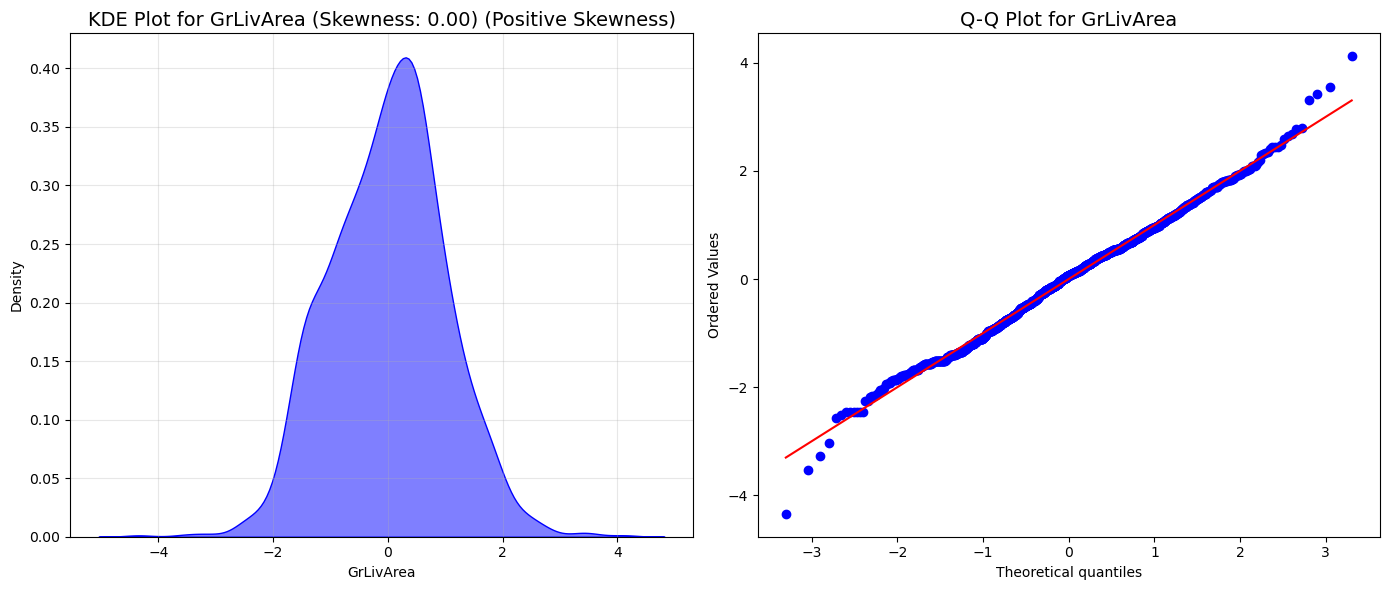

BsmtFullBath: Skewness = 0.37 (Positive Skewness)


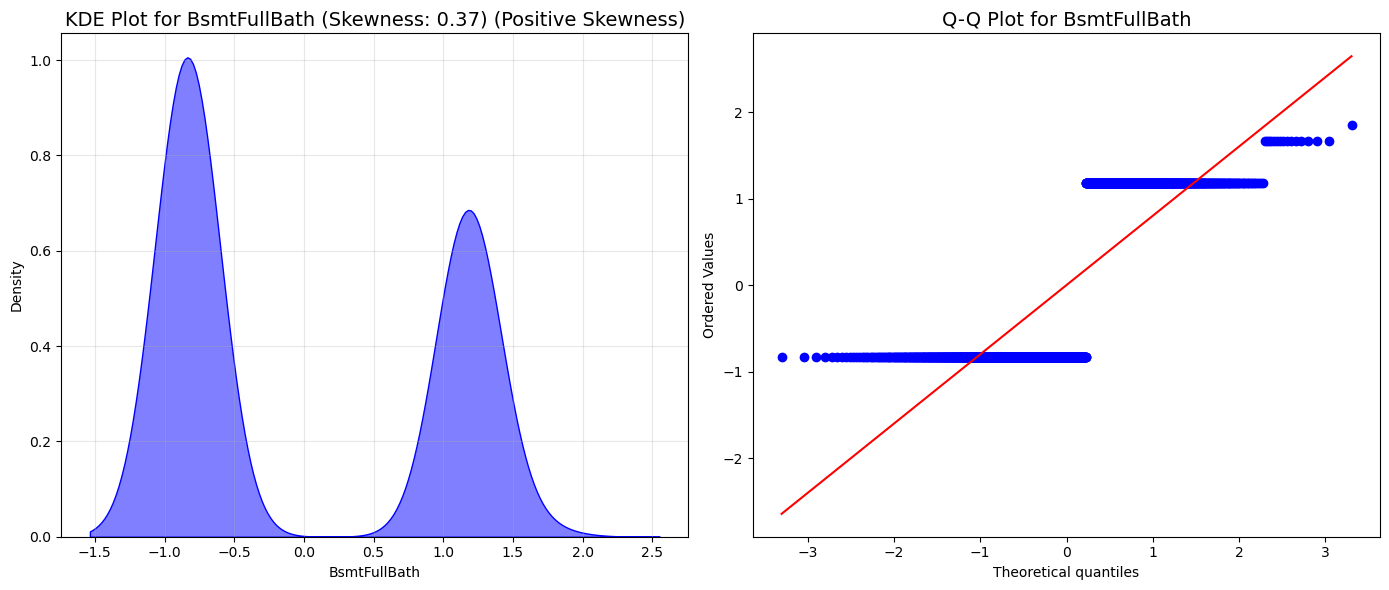

BsmtHalfBath: Skewness = 3.83 (Positive Skewness)


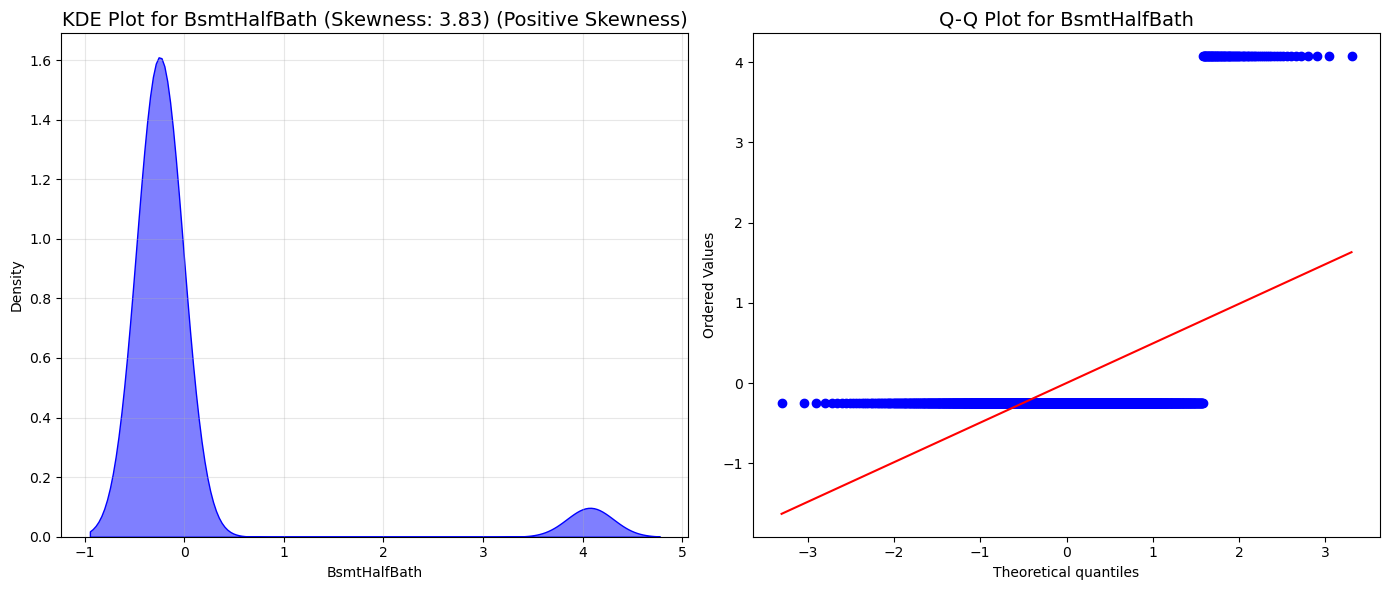

FullBath: Skewness = -0.05 (Negative Skewness)


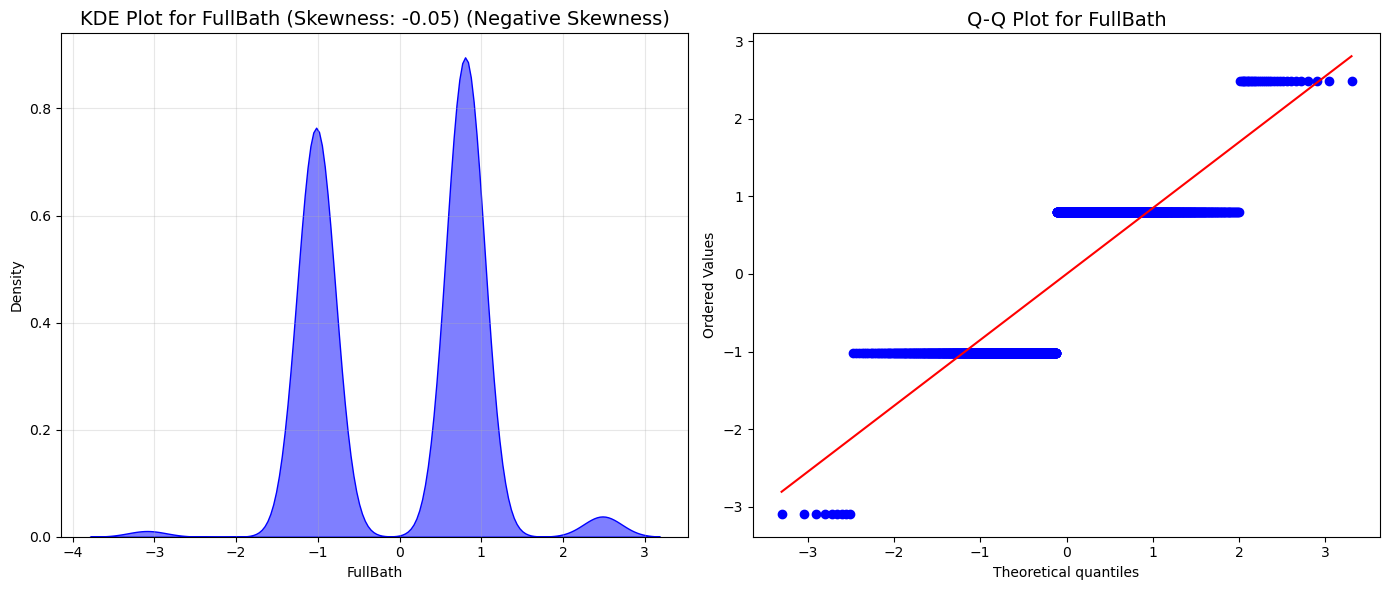

HalfBath: Skewness = 0.53 (Positive Skewness)


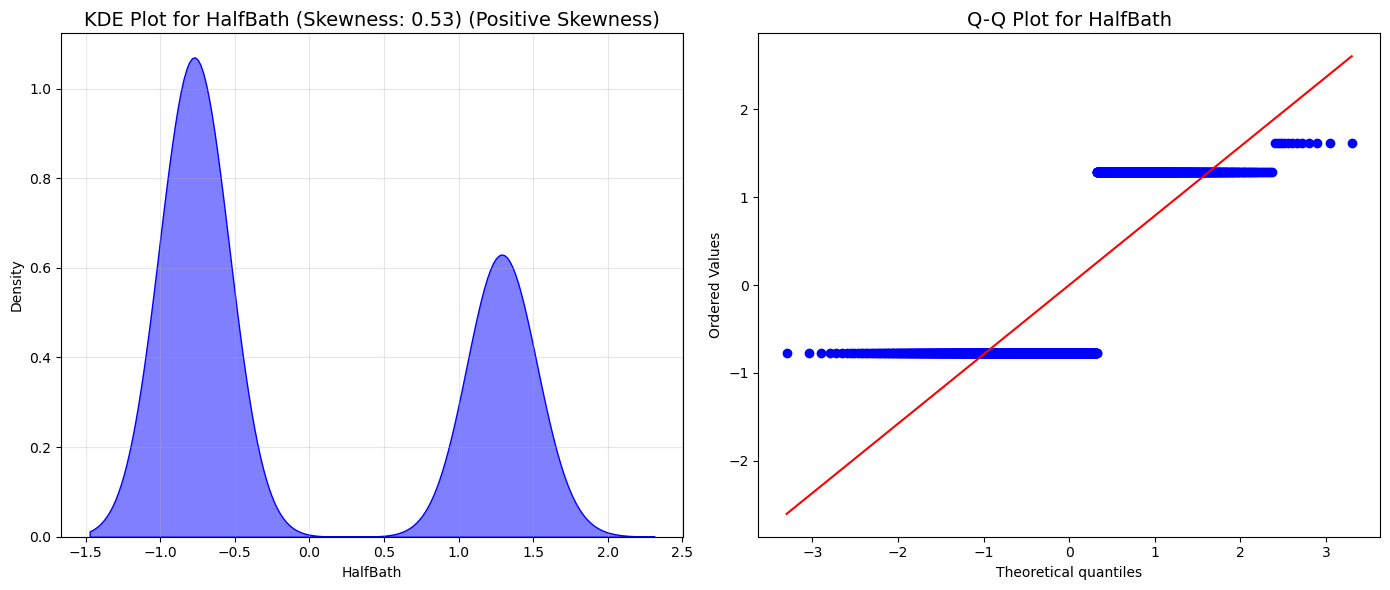

BedroomAbvGr: Skewness = 0.12 (Positive Skewness)


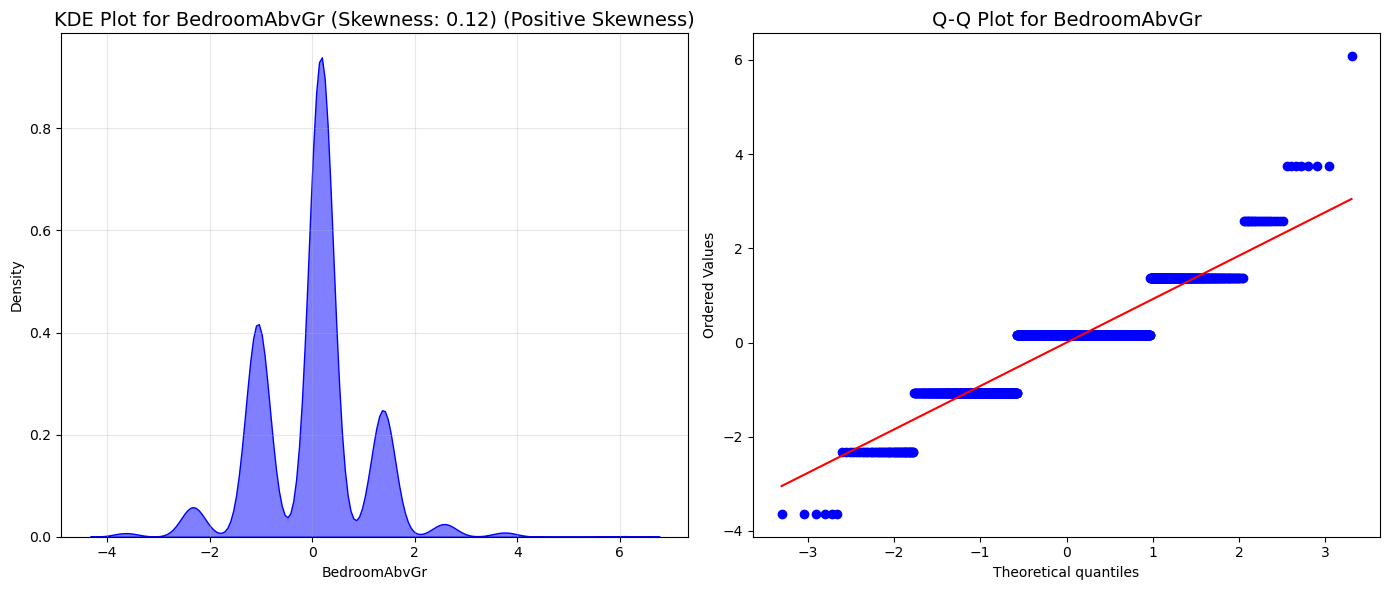

KitchenAbvGr: Skewness = -2.78 (Negative Skewness)


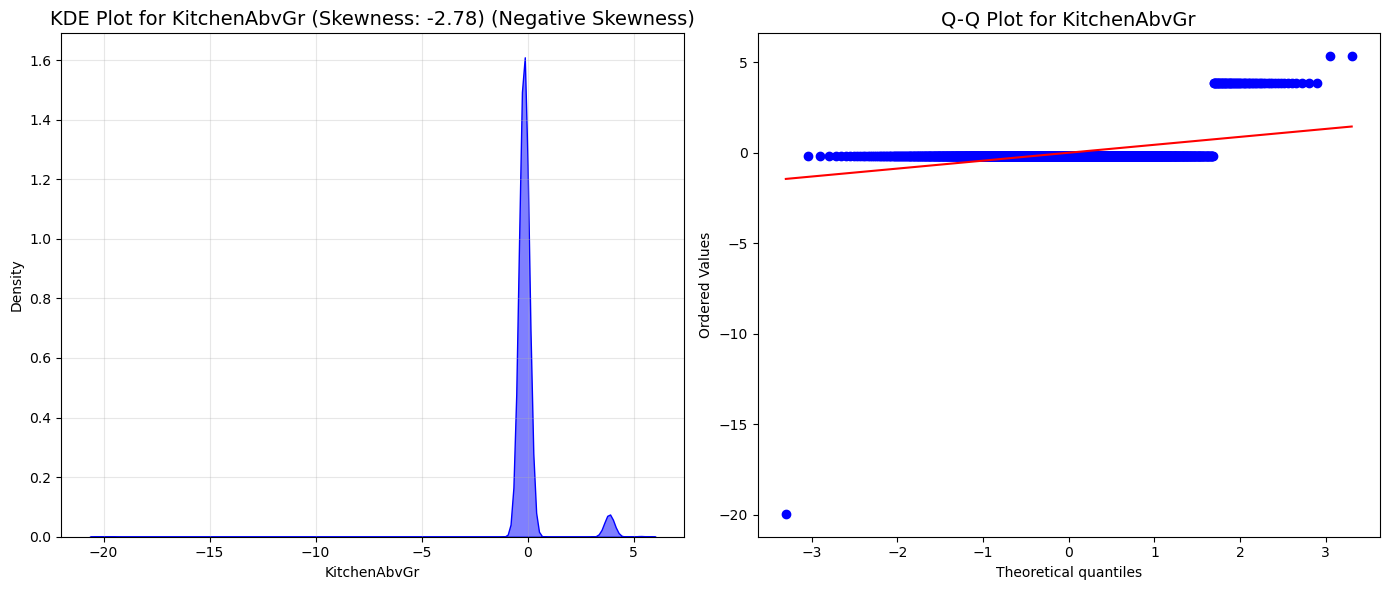

TotRmsAbvGrd: Skewness = 0.00 (Positive Skewness)


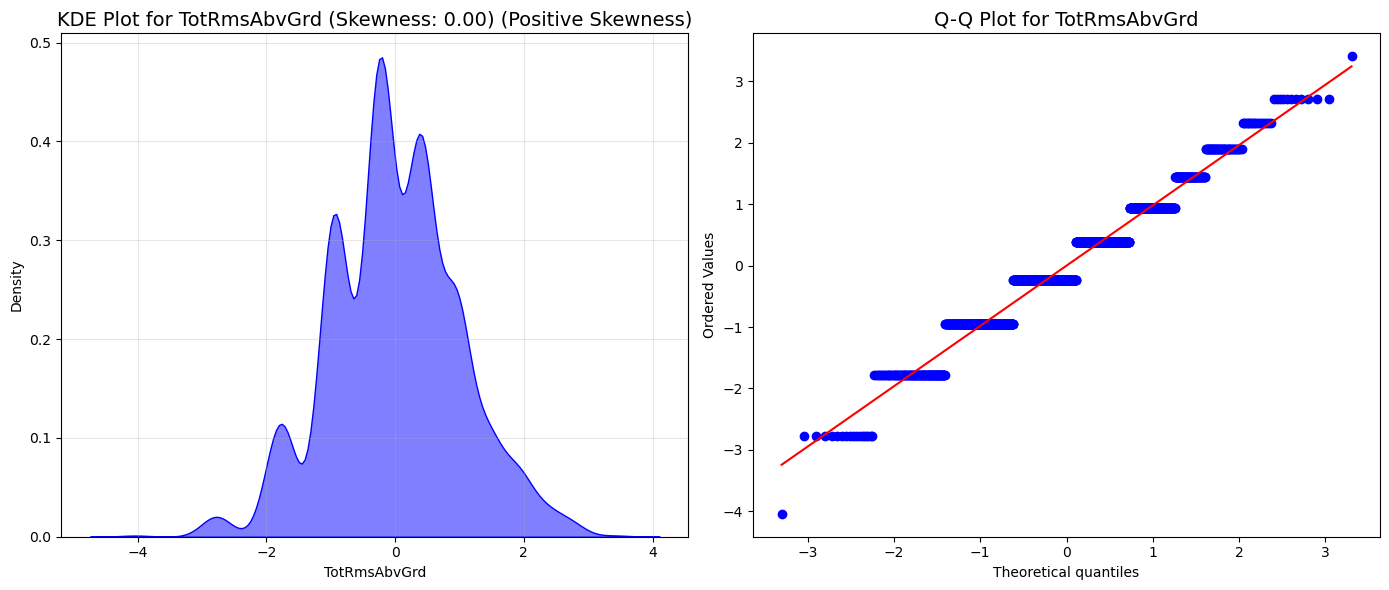

Fireplaces: Skewness = 0.08 (Positive Skewness)


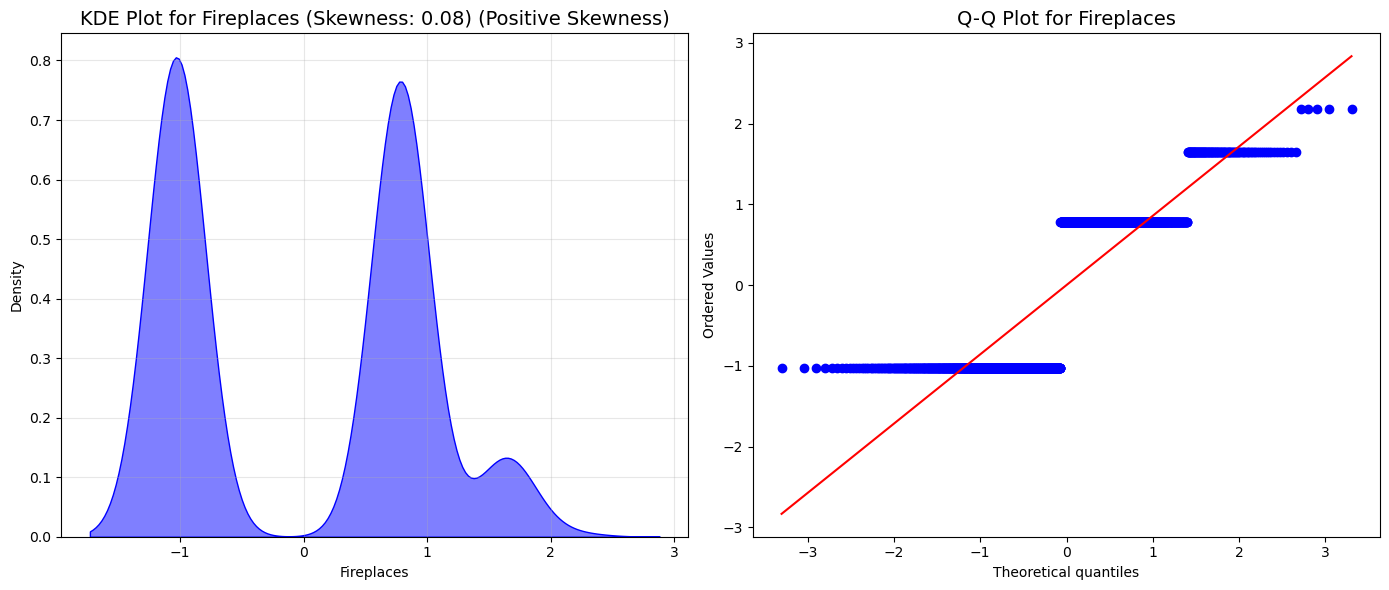

GarageCars: Skewness = -0.03 (Negative Skewness)


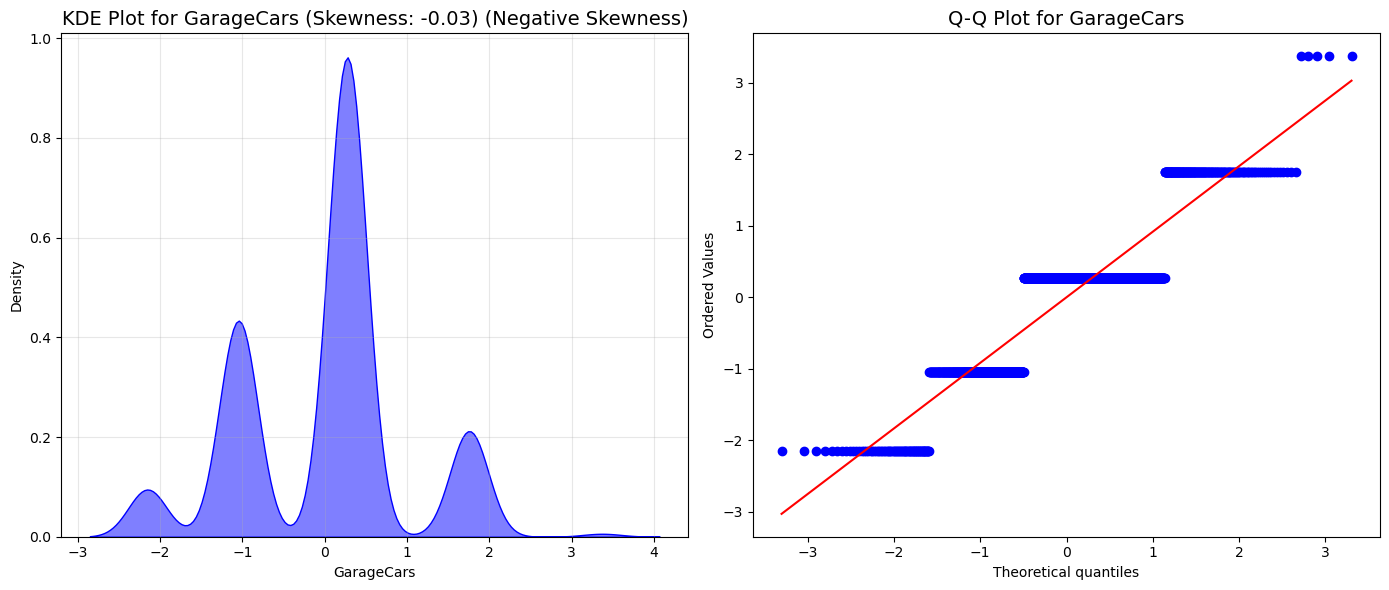

GarageArea: Skewness = -0.33 (Negative Skewness)


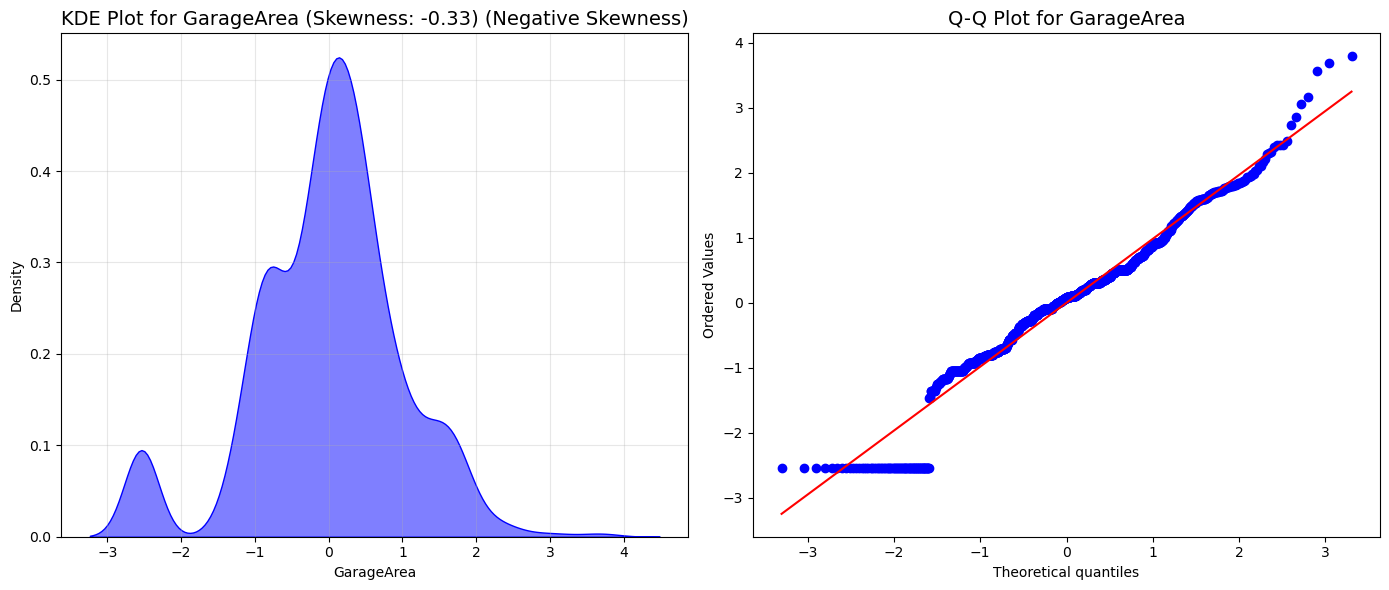

WoodDeckSF: Skewness = 0.13 (Positive Skewness)


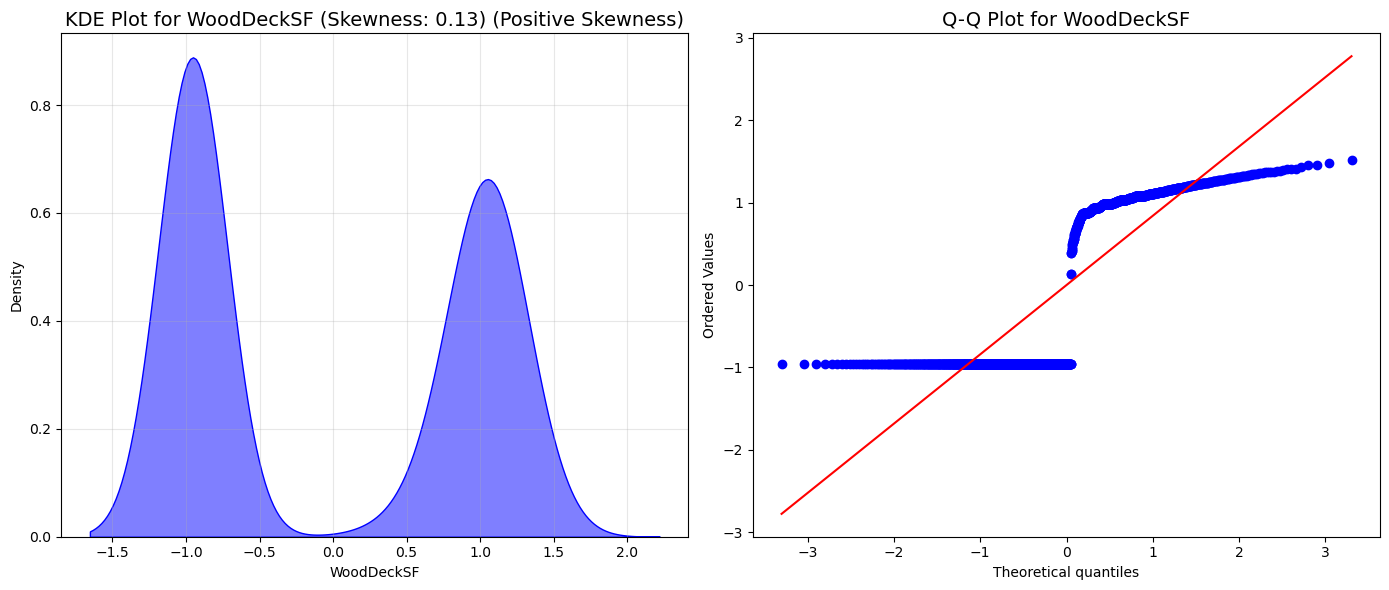

OpenPorchSF: Skewness = -0.01 (Negative Skewness)


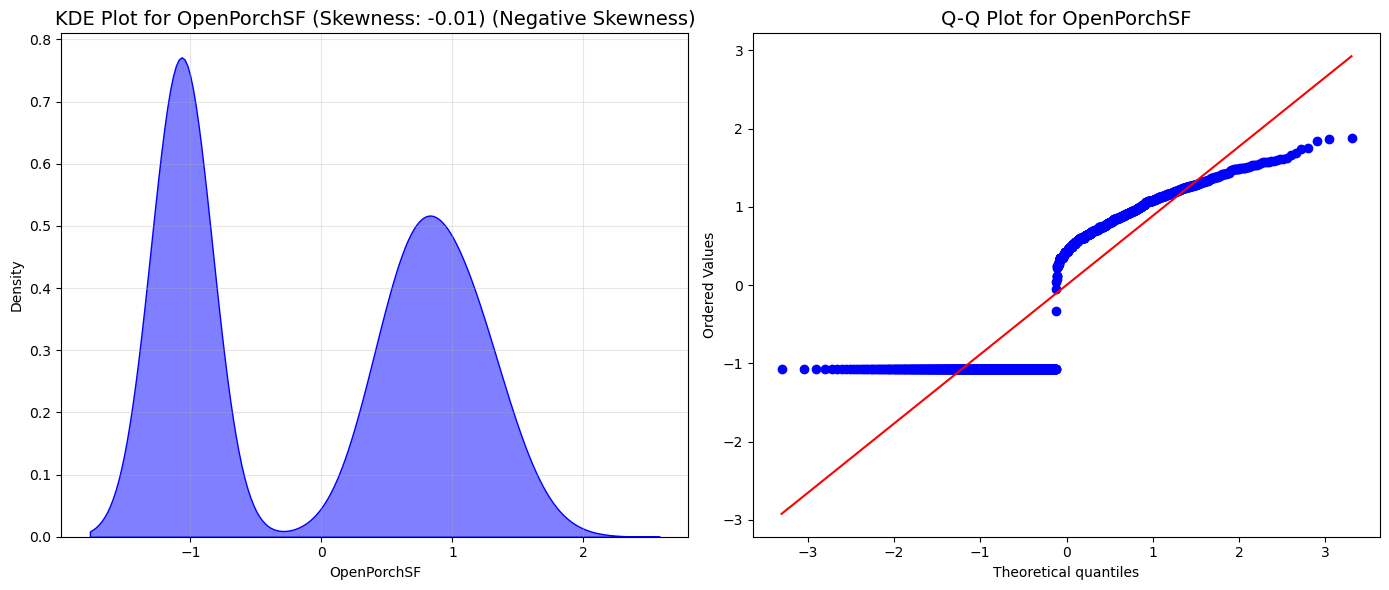

EnclosedPorch: Skewness = 2.04 (Positive Skewness)


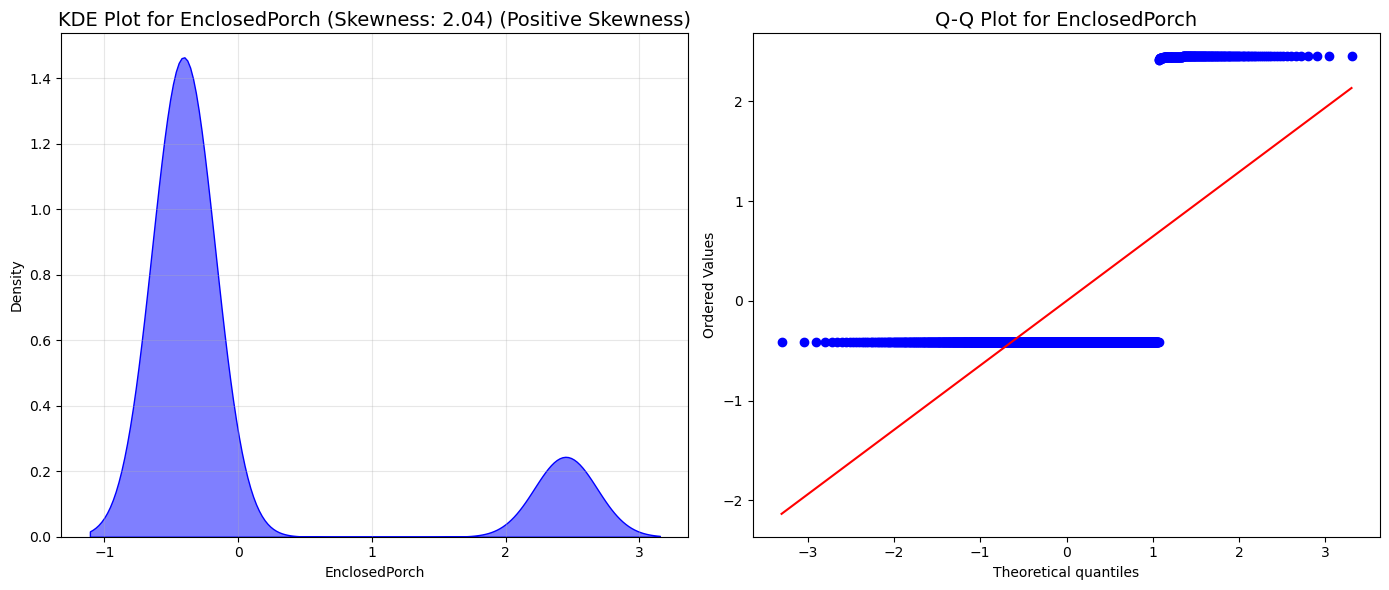

3SsnPorch: Skewness = 7.56 (Positive Skewness)


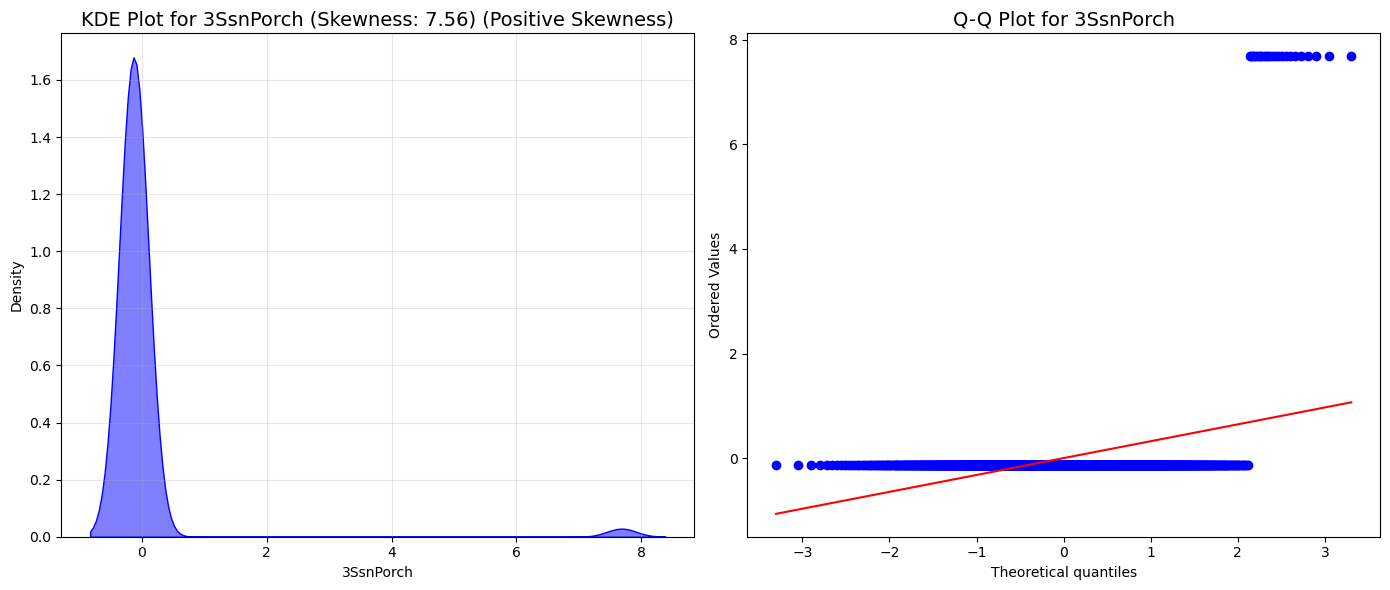

ScreenPorch: Skewness = 3.09 (Positive Skewness)


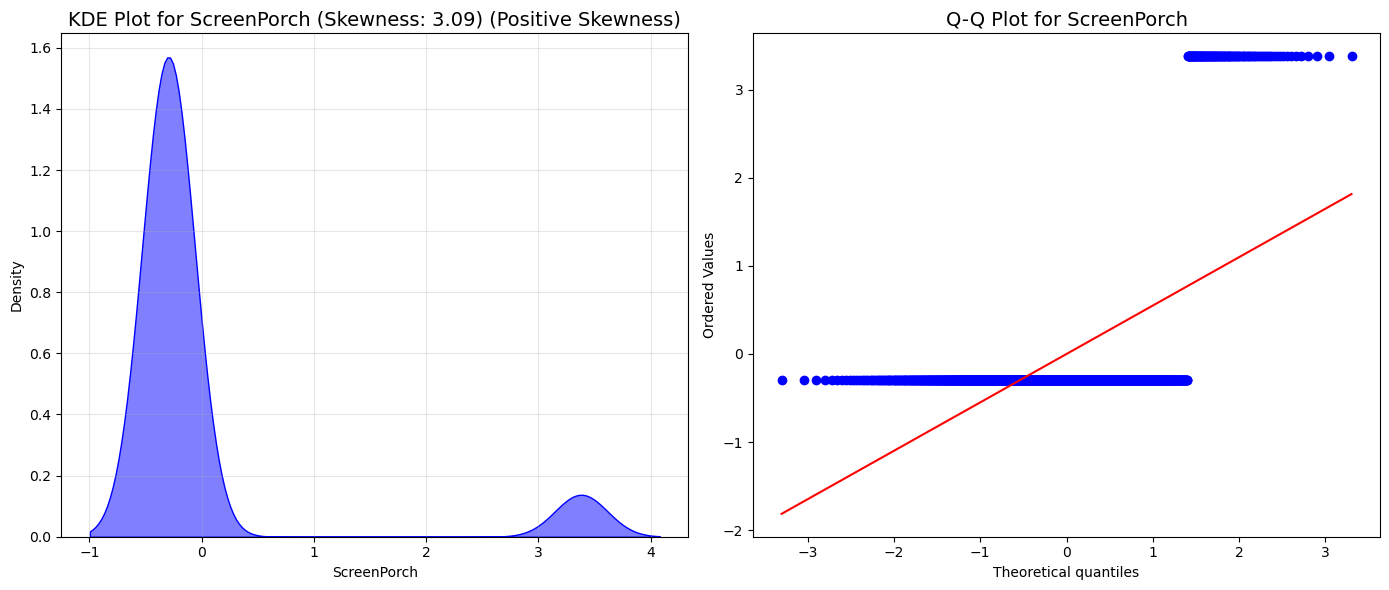

PoolArea: Skewness = 14.26 (Positive Skewness)


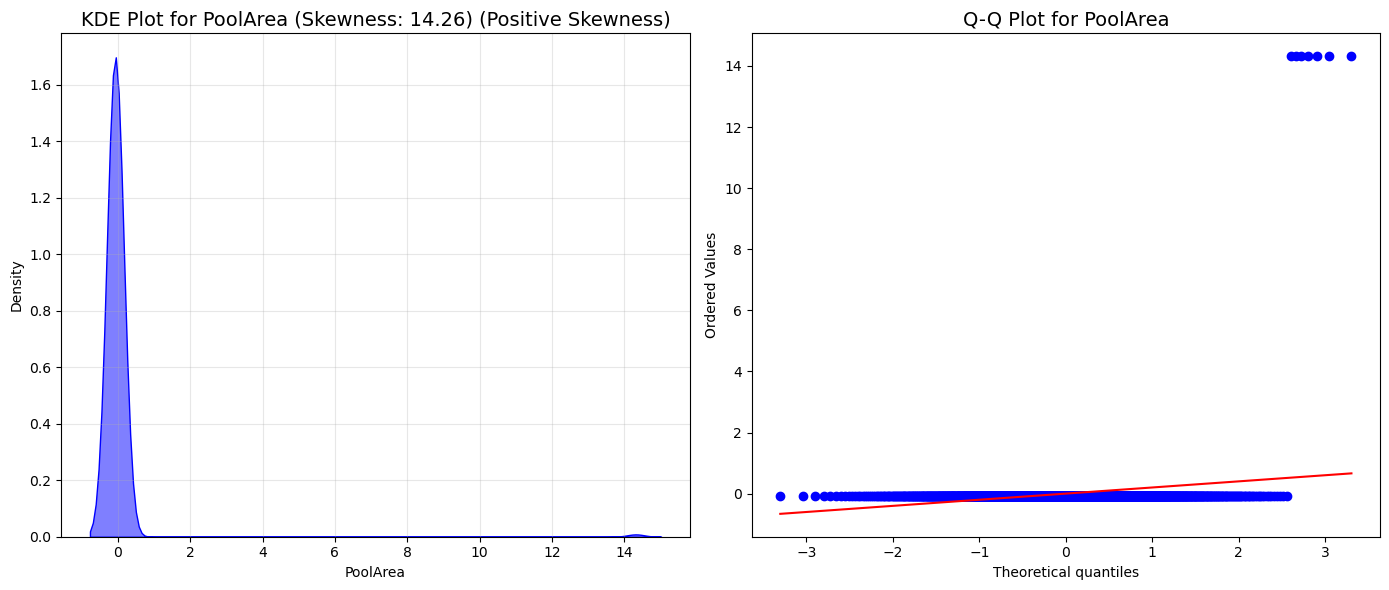

MiscVal: Skewness = 5.04 (Positive Skewness)


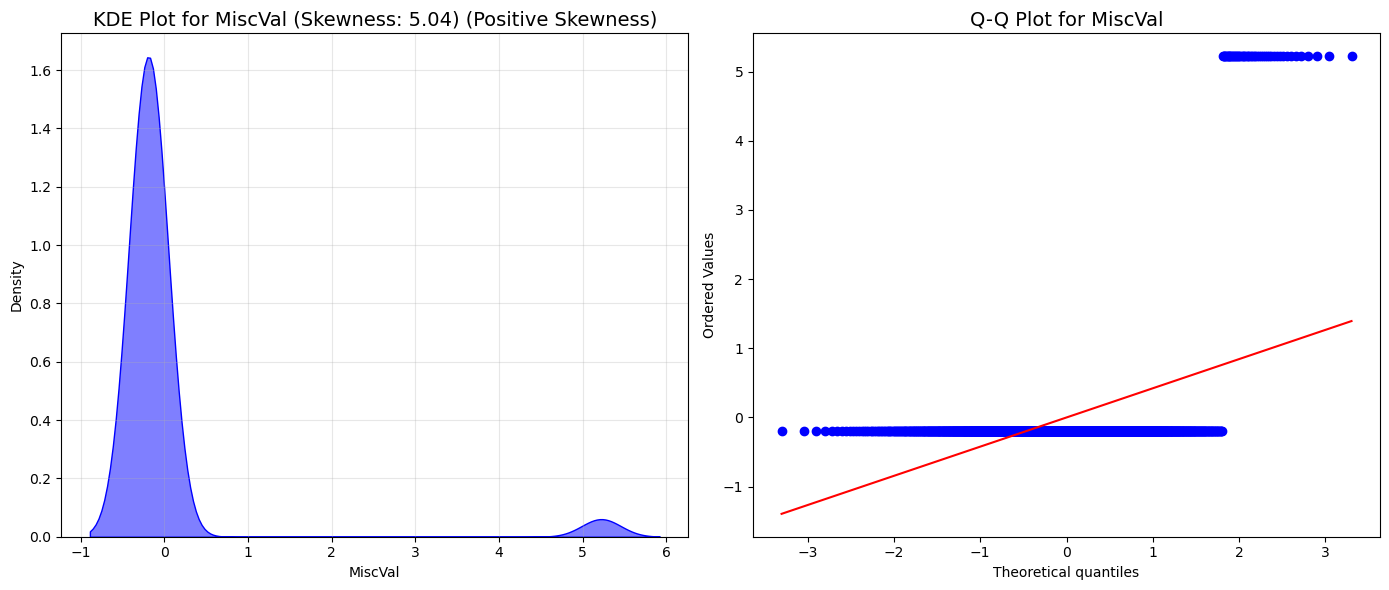

MoSold: Skewness = -0.04 (Negative Skewness)


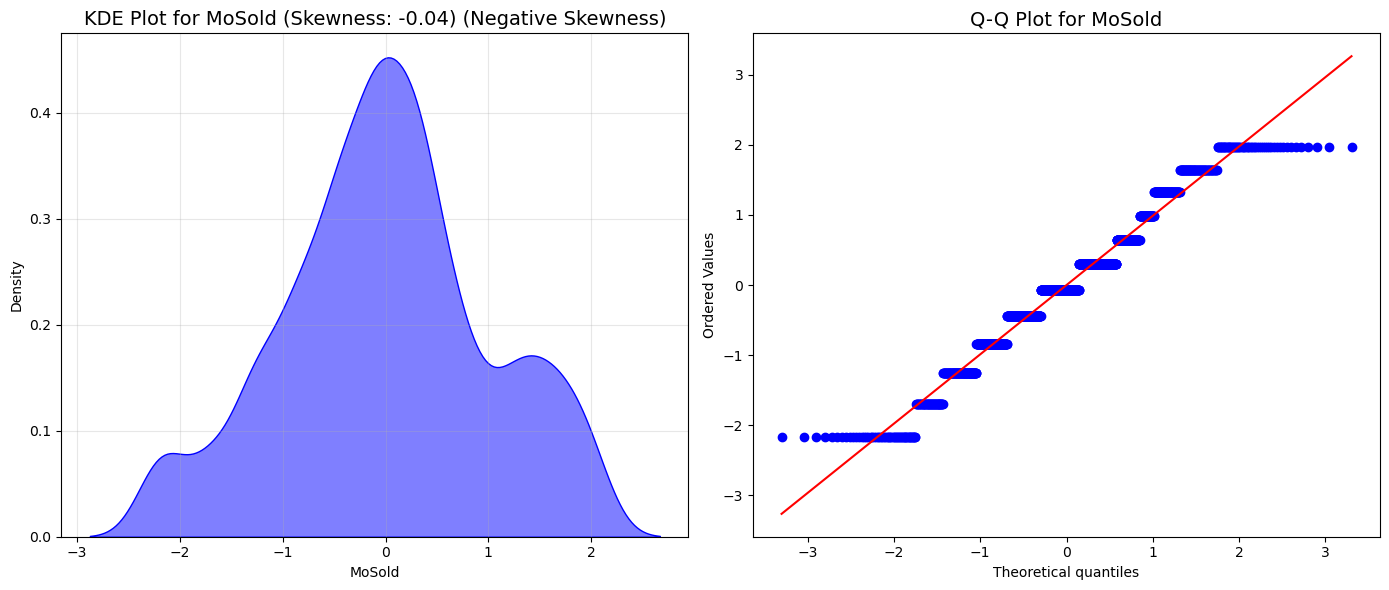

YrSold: Skewness = 0.09 (Positive Skewness)


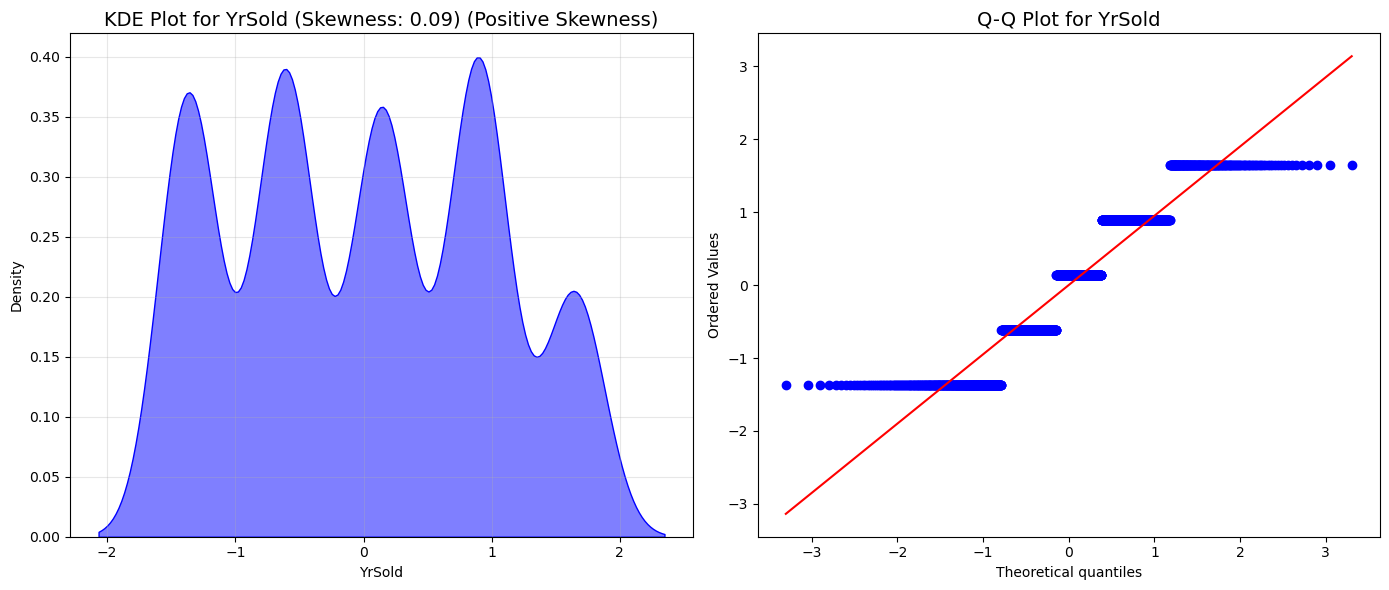

In [306]:
# Loop through each column in the DataFrame
col = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold']
for column in col:
    if np.issubdtype(X[column].dtype, np.number):  # Check if the column is numeric
        fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # Create a side-by-side plot
        
        skewness = X[column].skew()
        
        # Determine skewness type
        if skewness > 0:
            skew_type = "Positive Skewness"
        elif skewness < 0:
            skew_type = "Negative Skewness"
        else:
            skew_type = "Approximately Symmetrical"
        
        print(f"{column}: Skewness = {skewness:.2f} ({skew_type})")
        # KDE plot
        sns.kdeplot(X[column].dropna(), fill=True, color='blue', alpha=0.5, ax=axes[0])
        skewness = X[column].skew()  # Calculate skewness
        axes[0].set_title(f"KDE Plot for {column} (Skewness: {skewness:.2f}) ({skew_type})", fontsize=14)
        axes[0].set_xlabel(column)
        axes[0].set_ylabel('Density')
        axes[0].grid(alpha=0.3)
        
        # Q-Q plot
        stats.probplot(X[column].dropna(), dist="norm", plot=axes[1])
        axes[1].set_title(f"Q-Q Plot for {column}", fontsize=14)
        
        plt.tight_layout()
        plt.show()

In [307]:
X.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
0    0.489217    -0.048359 -0.139627     0.670509    -0.480650   1.161655   
1   -1.168146     0.629872  0.106886    -0.039129     2.010448   0.018223   
2    0.489217     0.095253  0.414692     0.670509    -0.480650   1.065474   
3    0.694511    -0.298111  0.096778     0.670509    -0.480650  -1.626477   
4    0.489217     0.795803  0.877693     1.354412    -0.480650   1.018128   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0      0.917374    1.222585    0.798431   -0.358225  -0.887118    -0.399746   
1     -0.607651   -0.823283    1.012584   -0.358225  -0.433427     0.512244   
2      0.845598    1.185073    0.572001   -0.358225  -0.046770    -0.249532   
3     -0.851051   -0.823283    0.142578   -0.358225   0.184834    -0.640486   
4      0.706120    1.327049    0.751389   -0.358225   0.078900     0.258524   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0 -0.795859  1.167784     -0.135505   0.530572      1.181765     -0.245549   
1  0.433096 -0.873624     -0.135505  -0.379035     -0.834652      4.072513   
2 -0.564987  1.170463     -0.135505   0.660889      1.181765     -0.245549   
3 -0.425957  1.144185     -0.135505   0.542813      1.181765     -0.245549   
4  0.128288  1.207515     -0.135505   1.283331      1.181765     -0.245549   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0  0.802515  1.286496      0.169612     -0.172226      0.945234   -1.029428   
1  0.802515 -0.772256      0.169612     -0.172226     -0.233076    0.783992   
2  0.802515  1.286496      0.169612     -0.172226     -0.233076    0.783992   
3 -1.020697 -0.772256      0.169612     -0.172226      0.390184    0.783992   
4  0.802515  1.286496      1.380780     -0.172226      1.445987    0.783992   

   GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
0    0.275197    0.383443   -0.952473     0.847638      -0.408247  -0.130097   
1    0.275197   -0.004627    1.213428    -1.067300      -0.408247  -0.130097   
2    0.275197    0.641221   -0.952473     0.675450      -0.408247  -0.130097   
3    1.757383    0.785140   -0.952473     0.592013       2.452777  -0.130097   
4    1.757383    1.581199    1.078285     0.996481      -0.408247  -0.130097   

   ScreenPorch  PoolArea   MiscVal    MoSold    YrSold  MSZoning_FV  \
0    -0.295772 -0.069843 -0.191479 -1.692761  0.142936          0.0   
1    -0.295772 -0.069843 -0.191479 -0.445993 -0.611369          0.0   
2    -0.295772 -0.069843 -0.191479  0.987495  0.142936          0.0   
3    -0.295772 -0.069843 -0.191479 -1.692761 -1.367066          0.0   
4    -0.295772 -0.069843 -0.191479  1.965982  0.142936          0.0   

   MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  Alley_NoAlley  \
0          0.0          1.0          0.0          1.0            1.0   
1          0.0          1.0          0.0          1.0            1.0   
2          0.0          1.0          0.0          1.0            1.0   
3          0.0          1.0          0.0          1.0            1.0   
4          0.0          1.0          0.0          1.0            1.0   

   Alley_Pave  LandContour_HLS  LandContour_Low  LandContour_Lvl  \
0         0.0              0.0              0.0              1.0   
1         0.0              0.0              0.0              1.0   
2         0.0              0.0              0.0              1.0   
3         0.0              0.0              0.0              1.0   
4         0.0              0.0              0.0              1.0   

   Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  \
0               0.0                0.0            0.0            0.0   
1               0.0                0.0            1.0            0.0   
2               0.0                0.0            0.0            0.0   
3               0.0                0.0            0.0            0.0   
4          

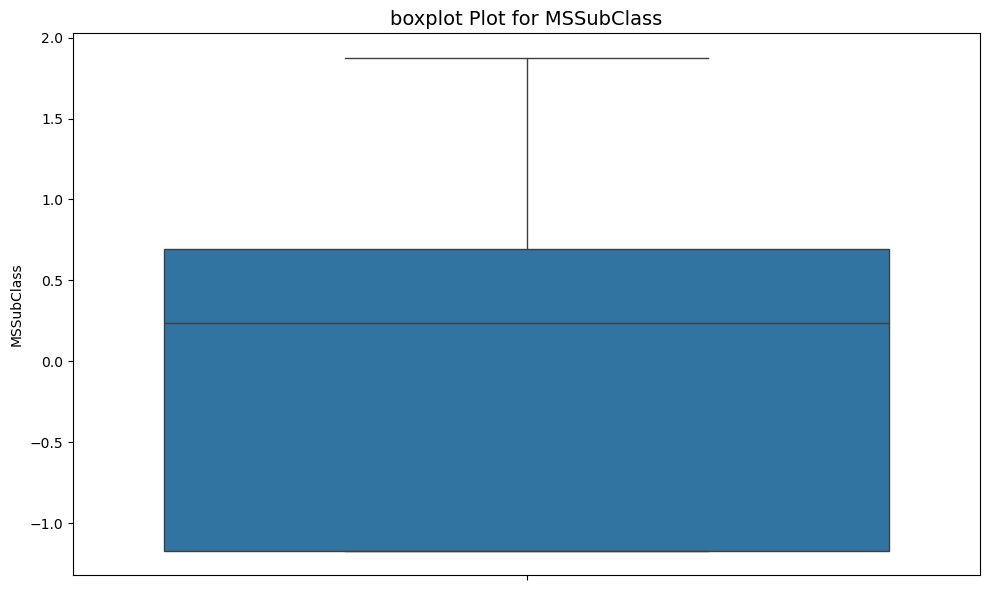

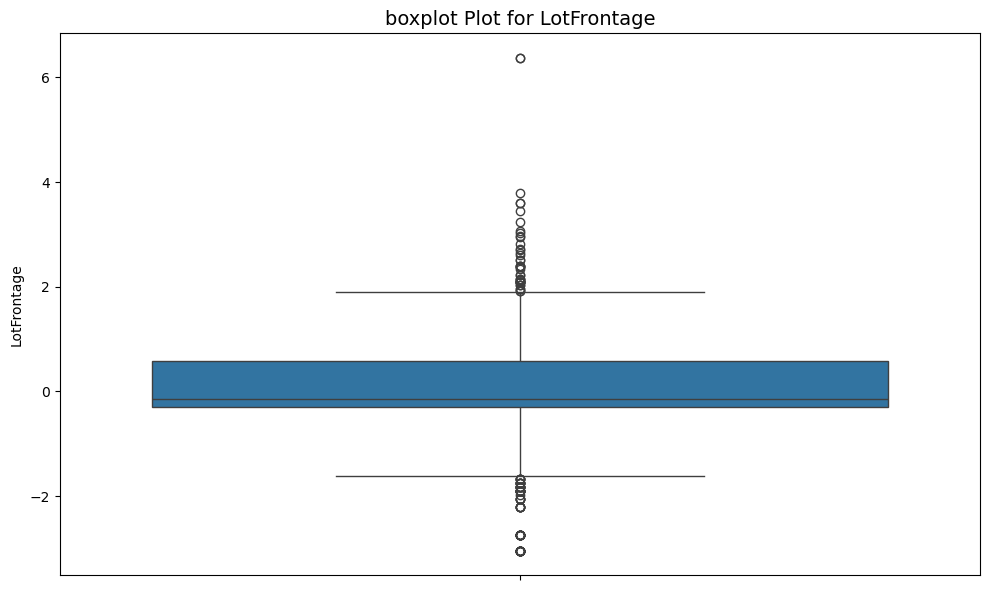

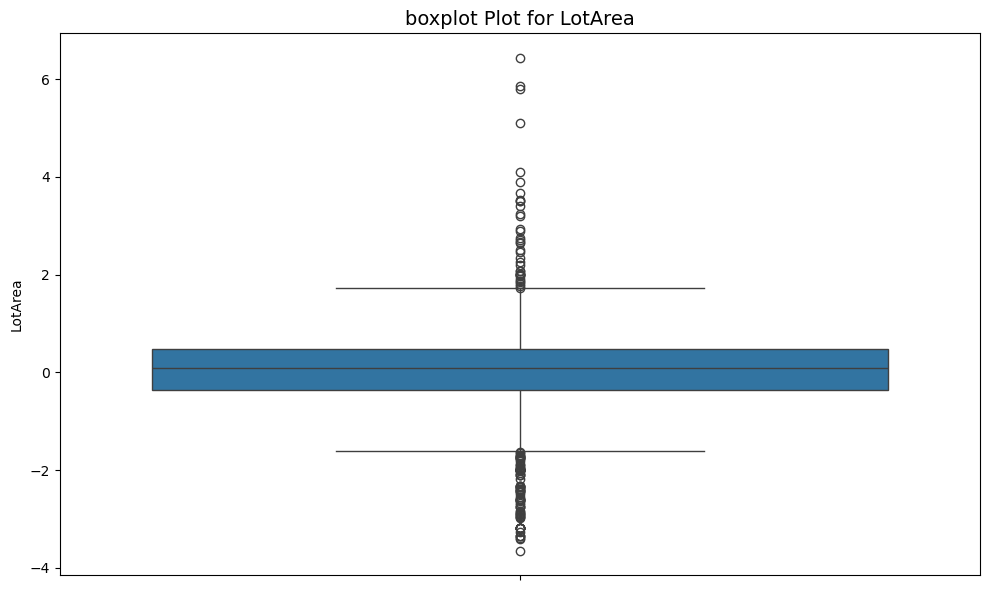

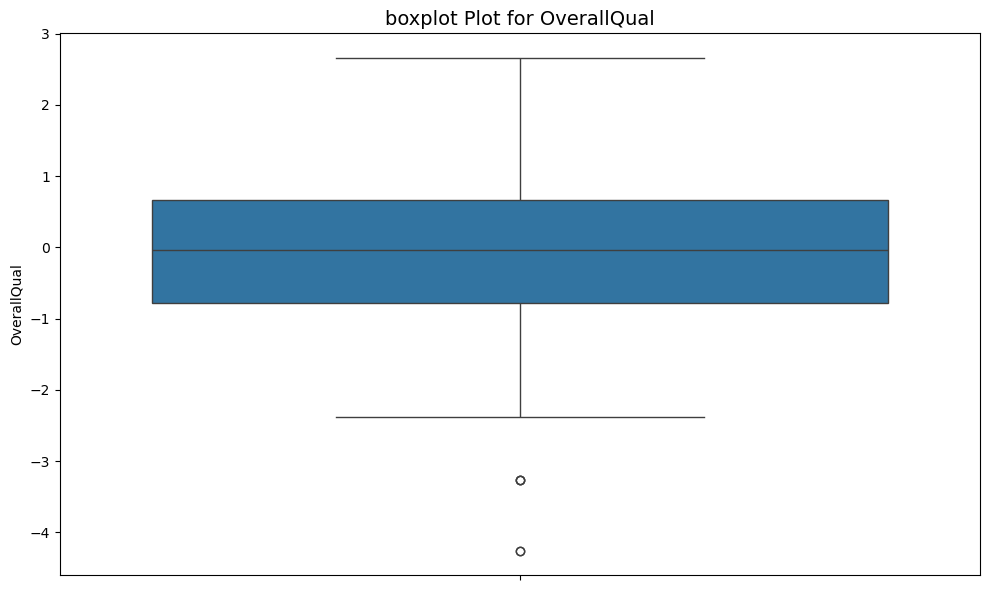

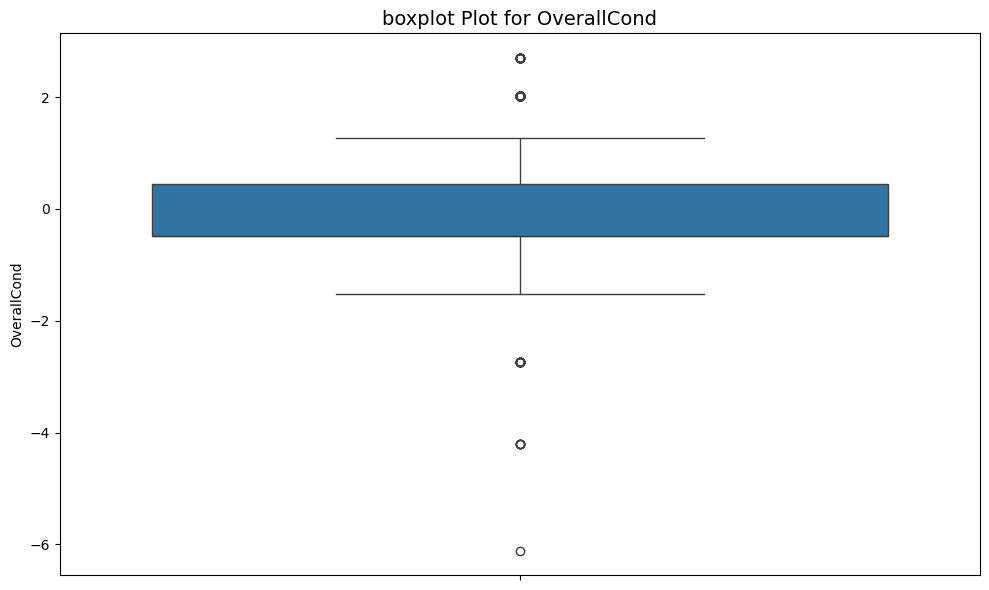

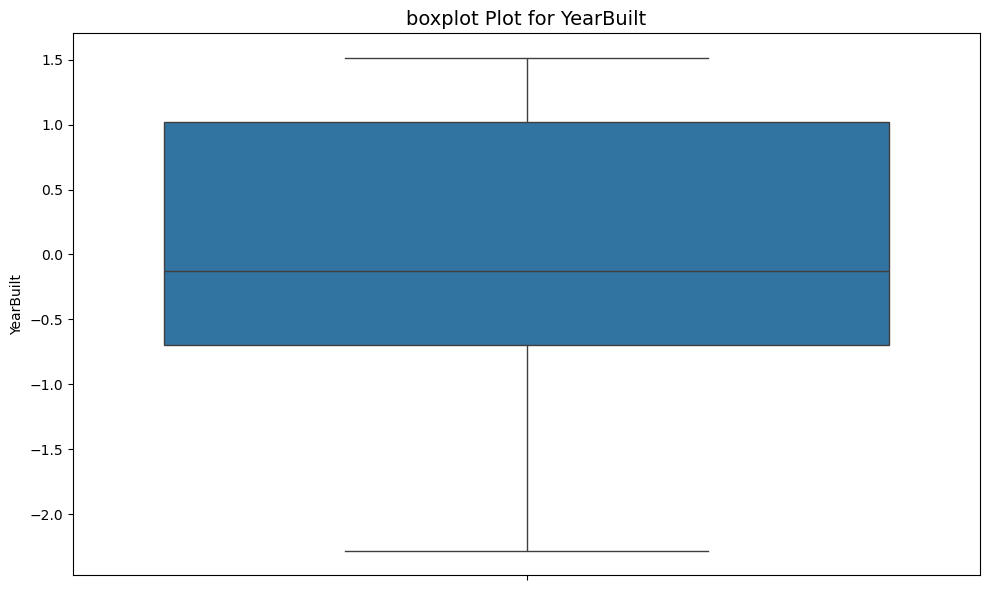

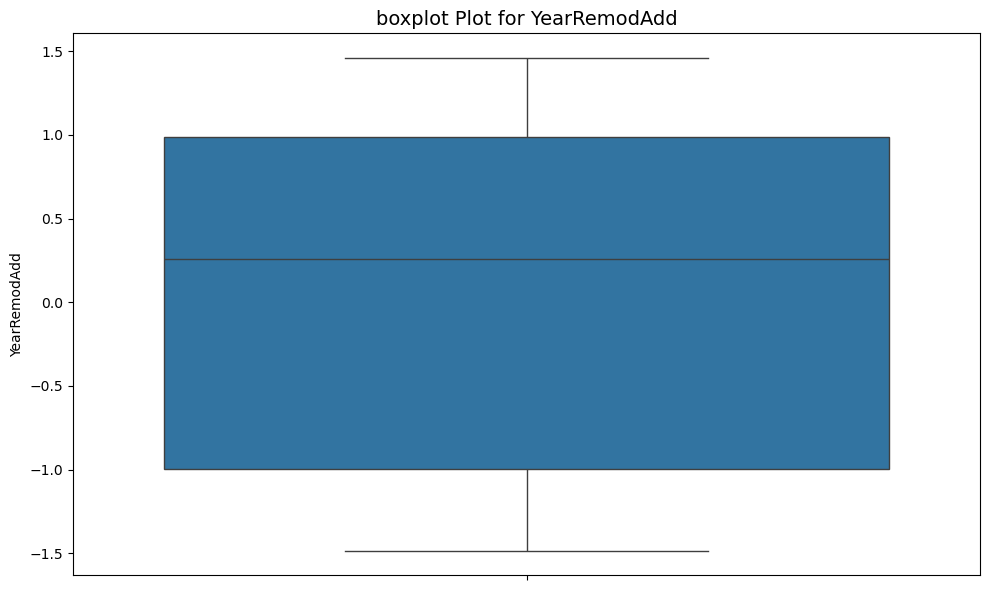

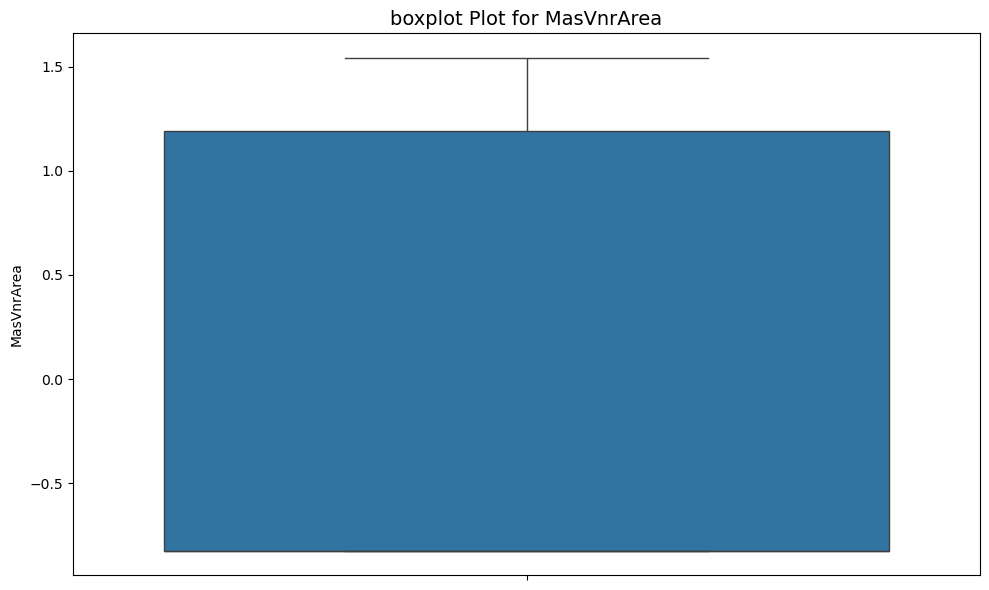

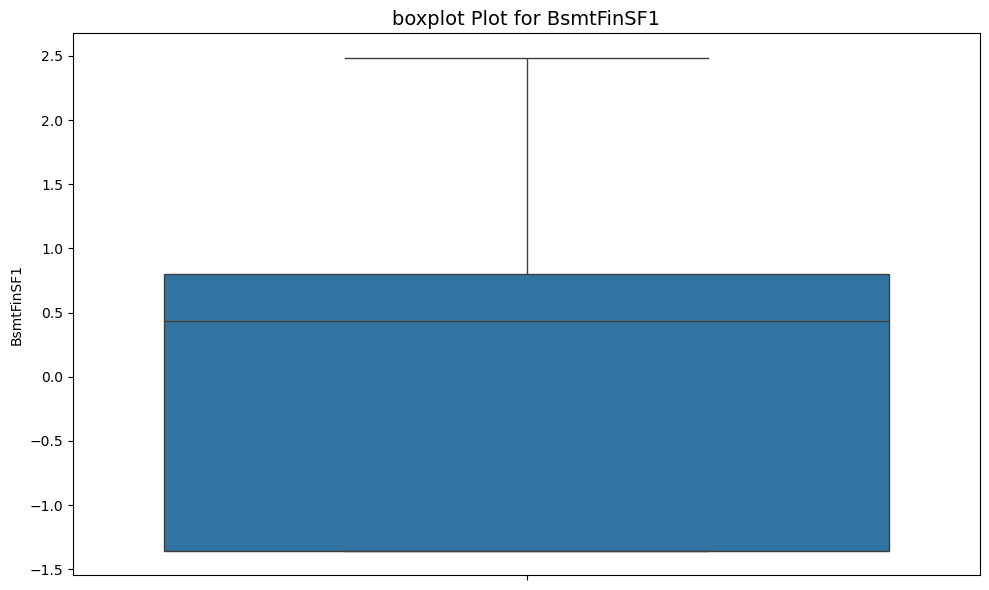

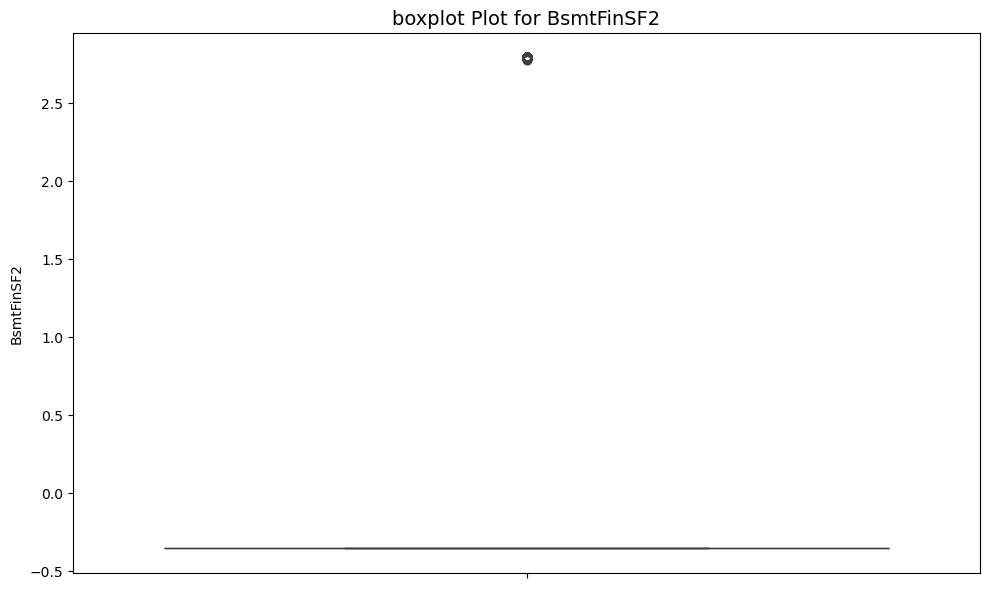

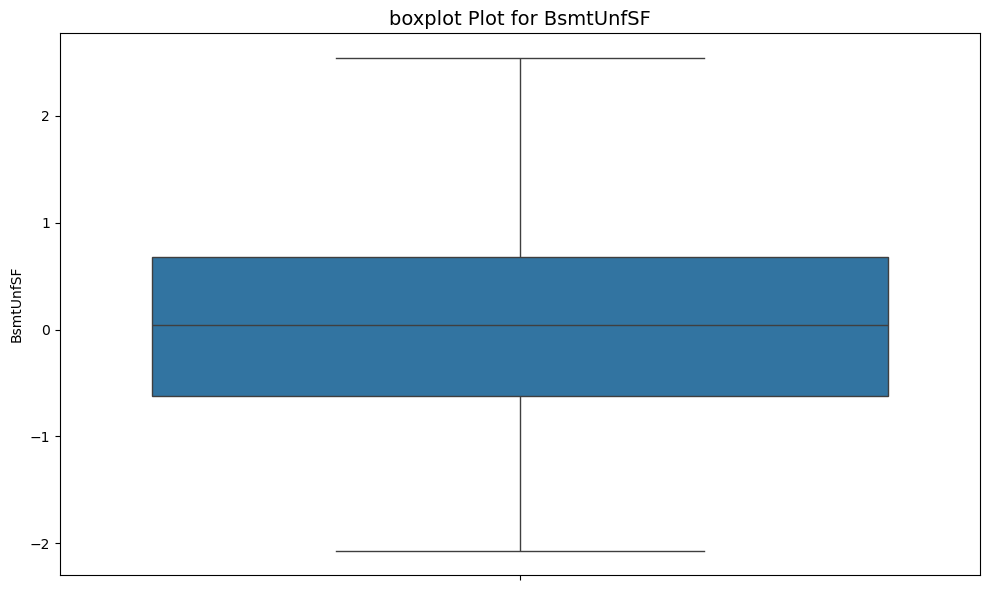

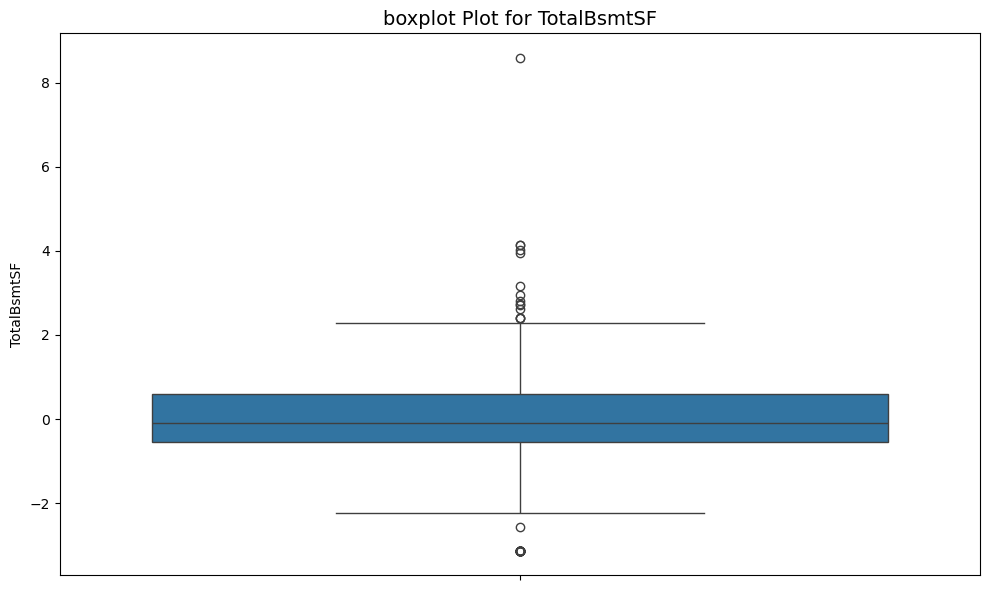

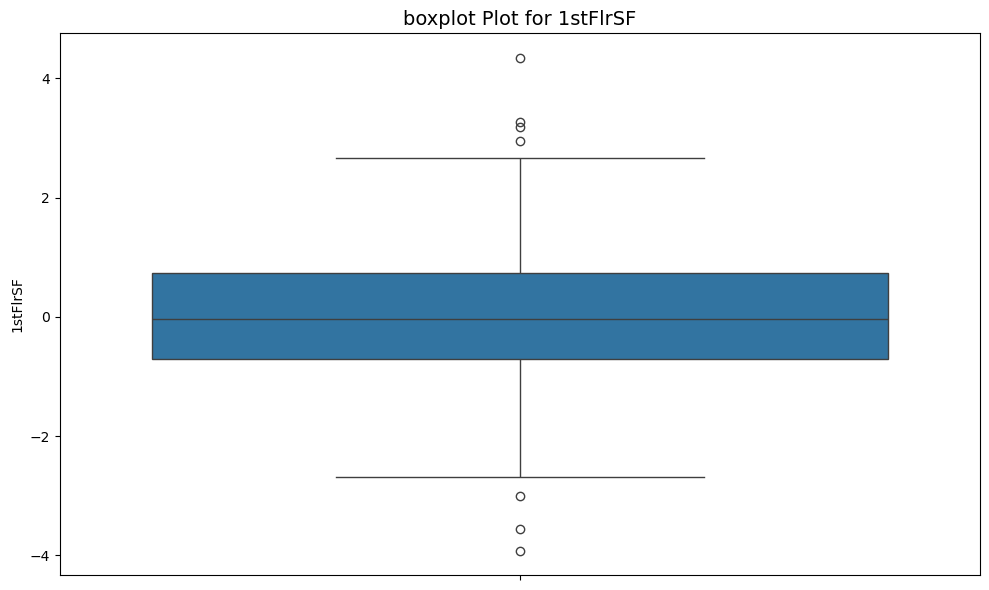

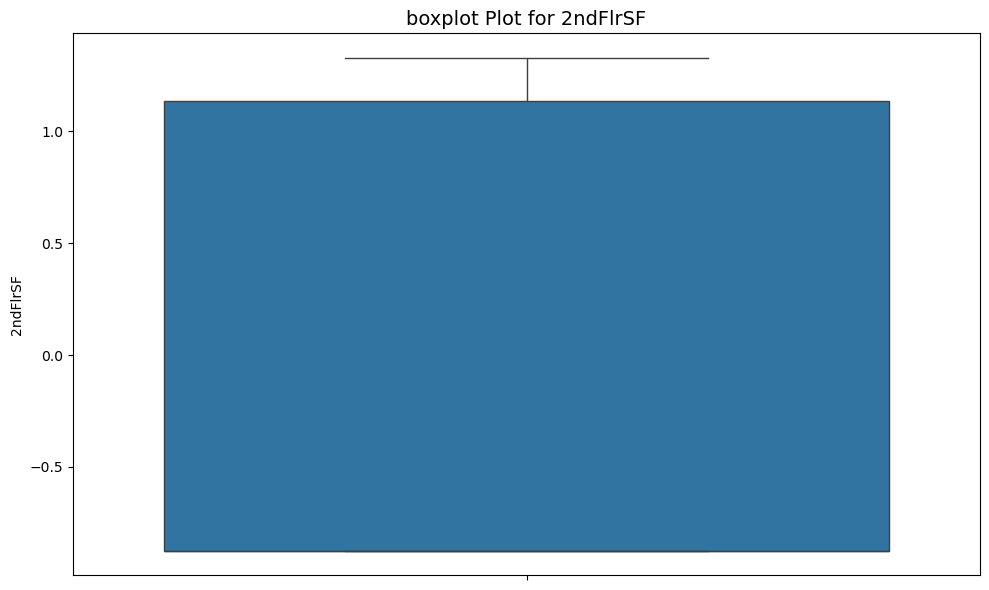

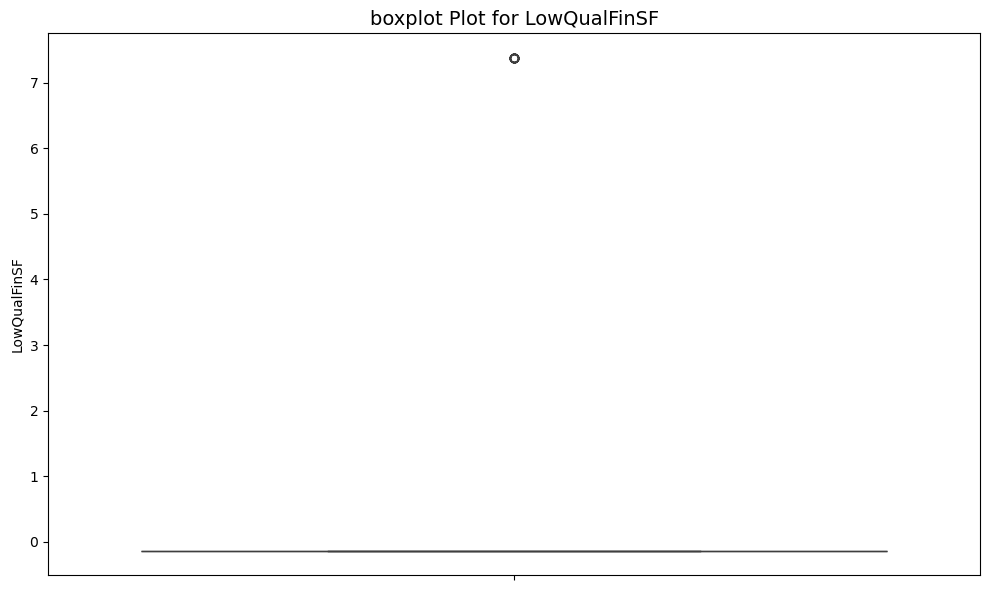

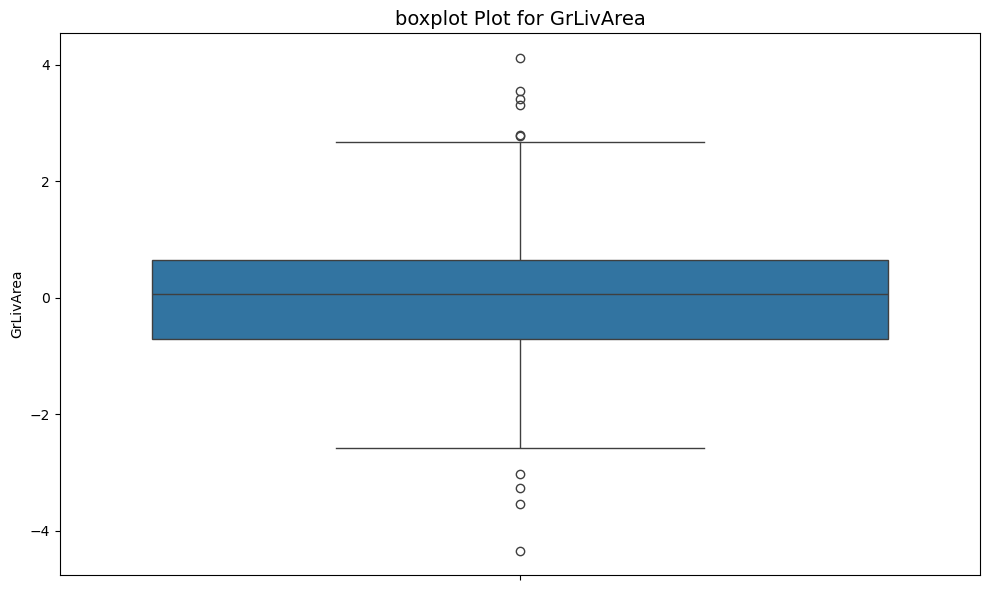

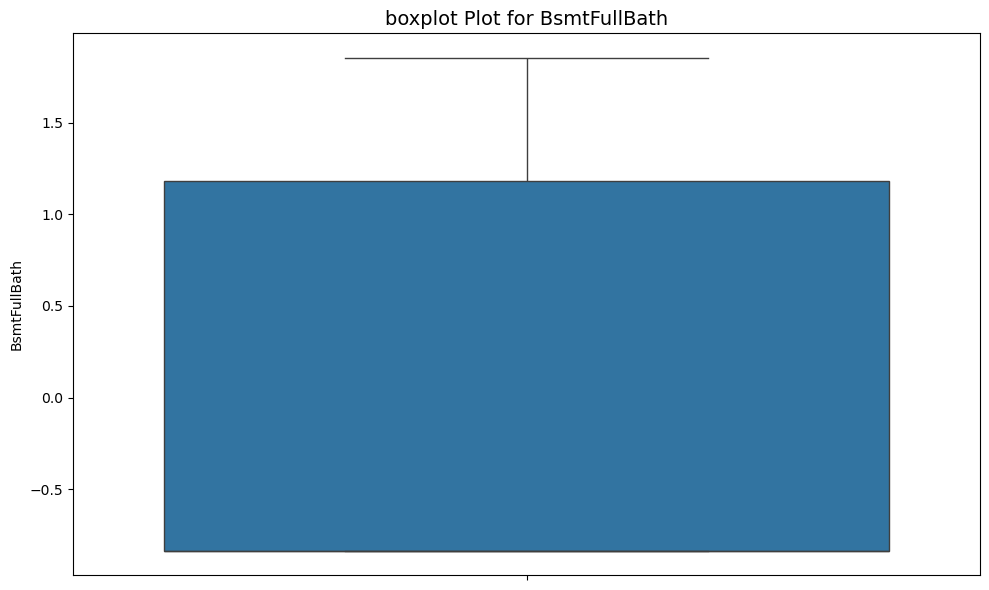

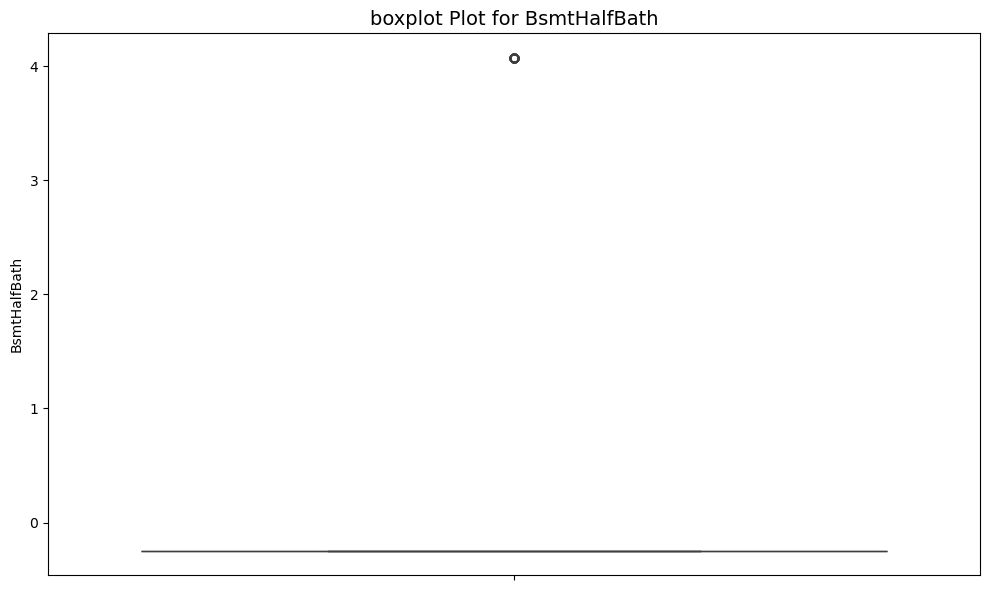

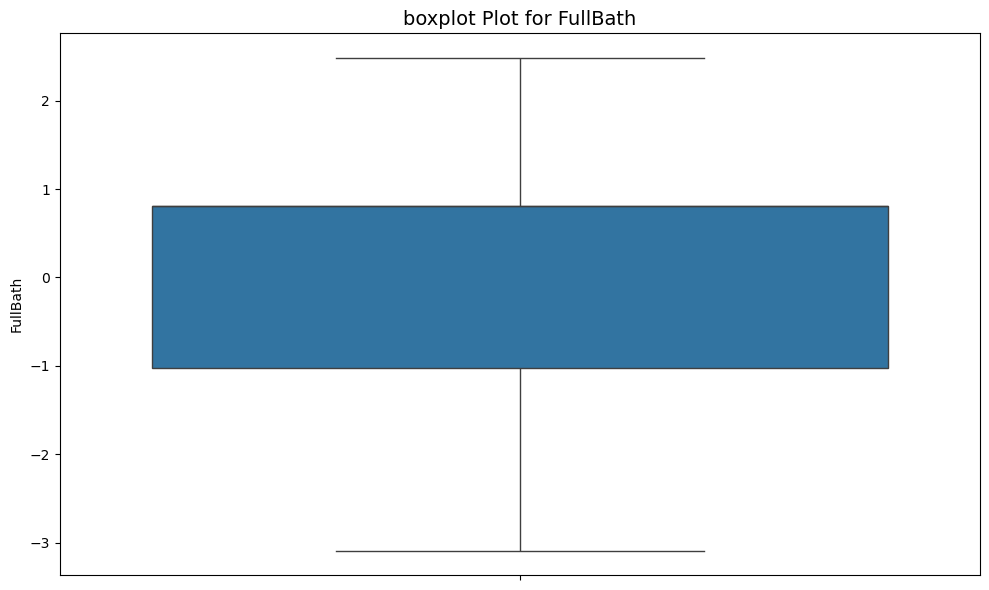

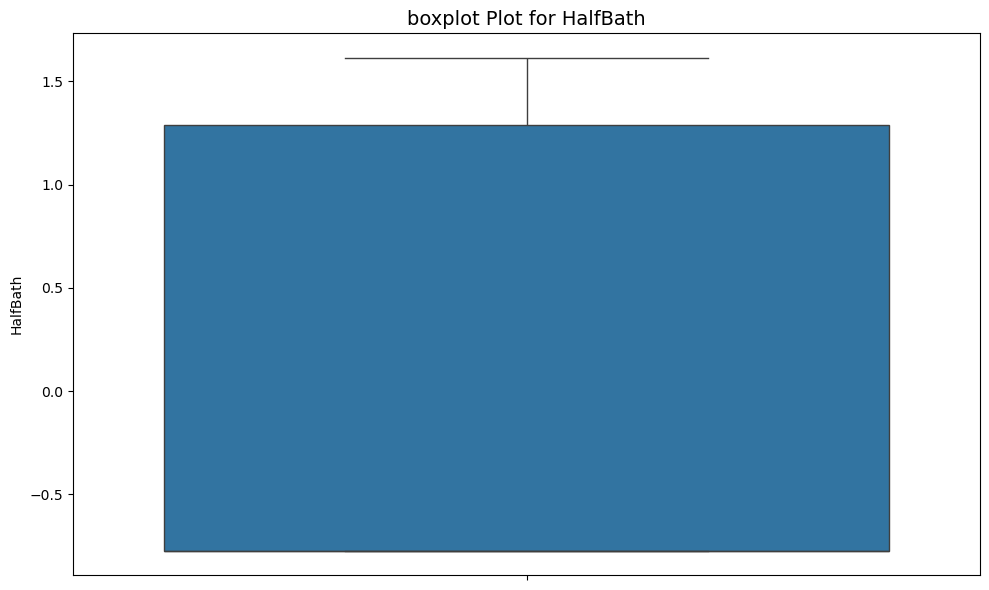

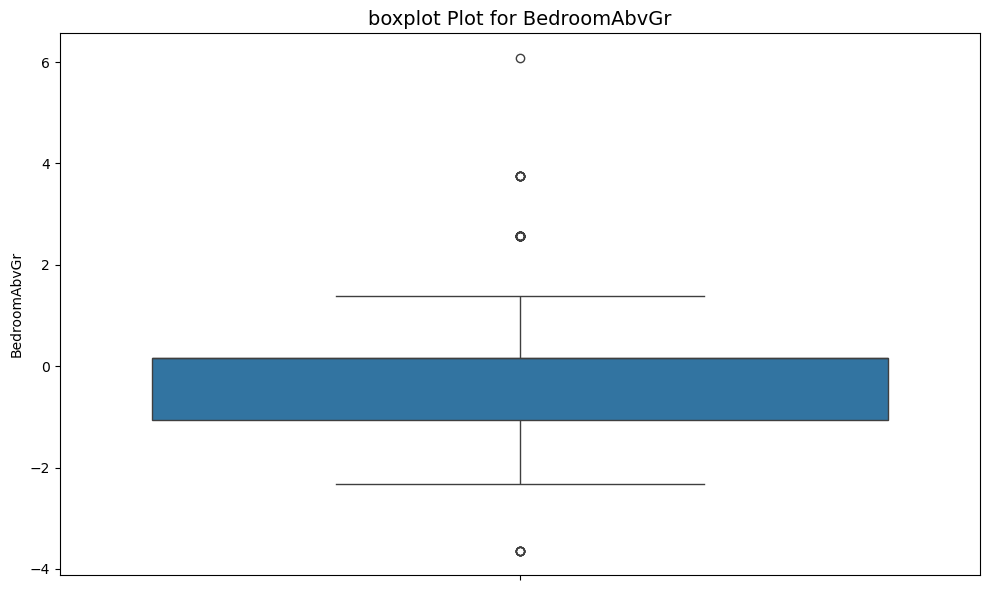

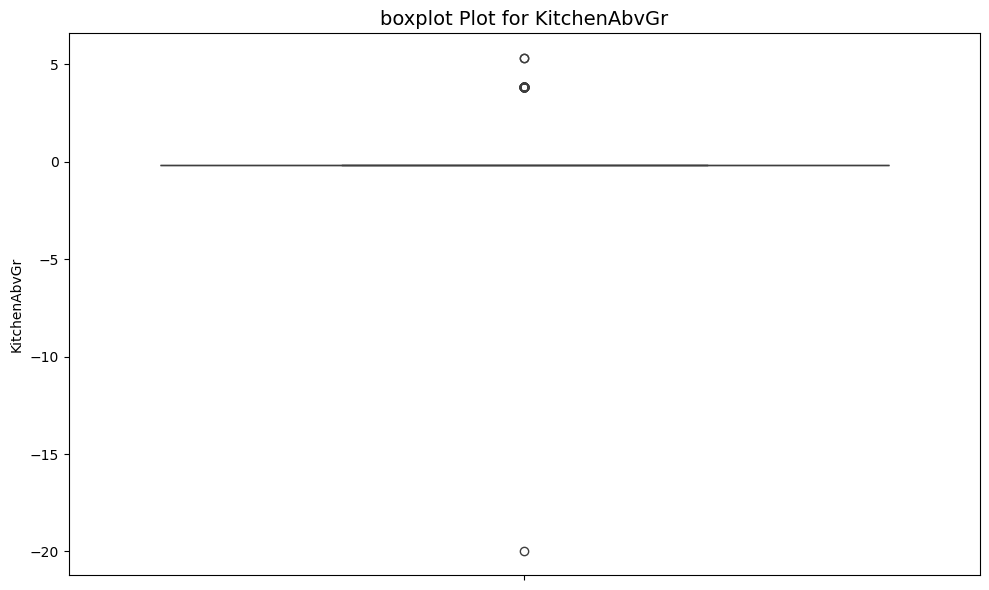

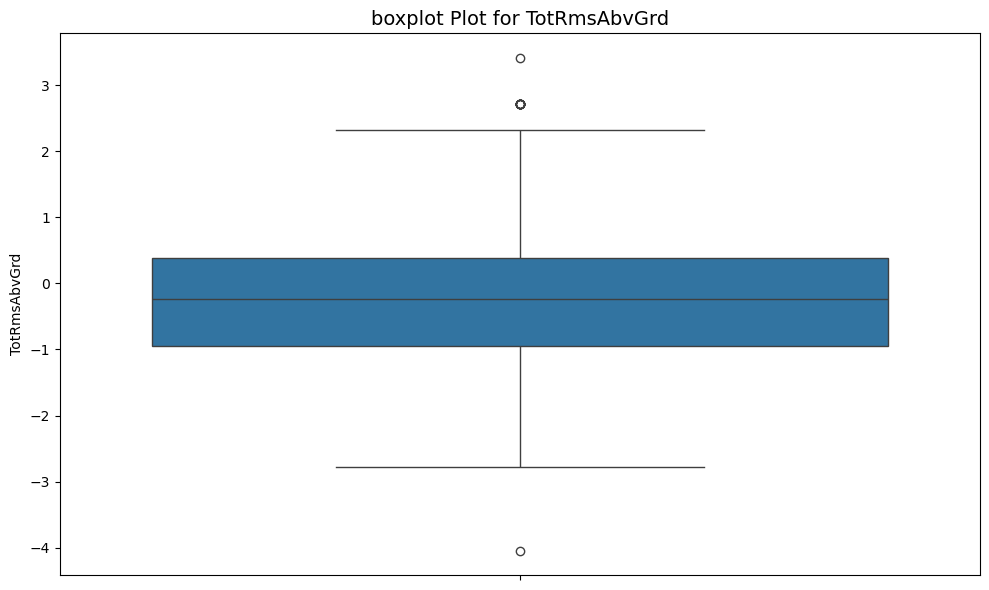

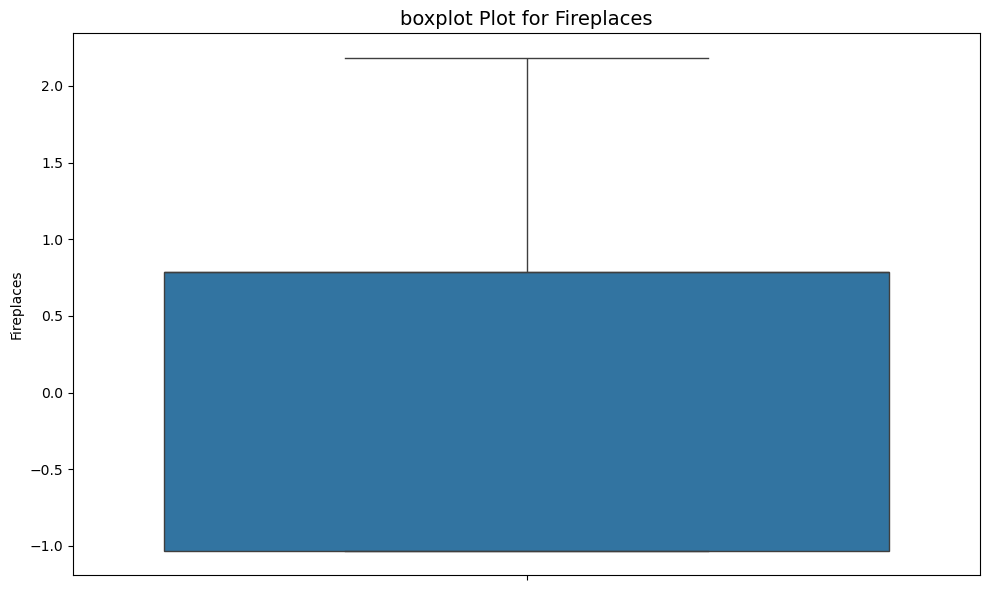

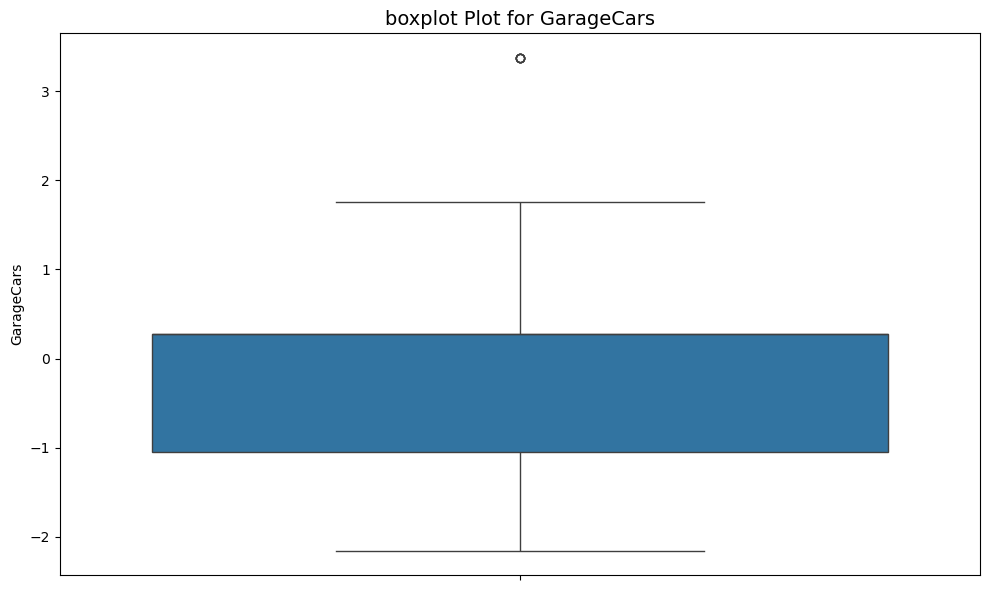

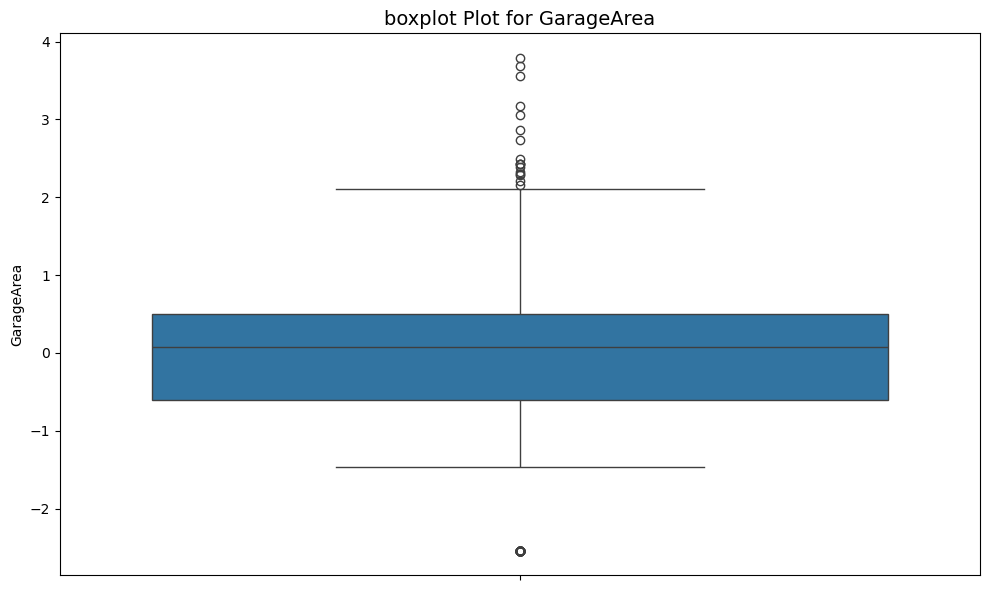

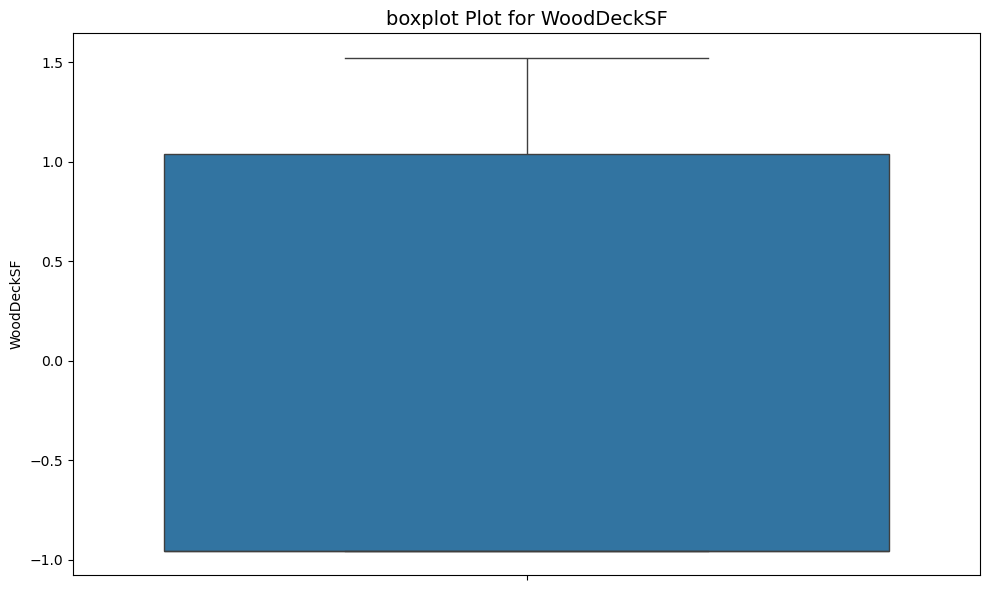

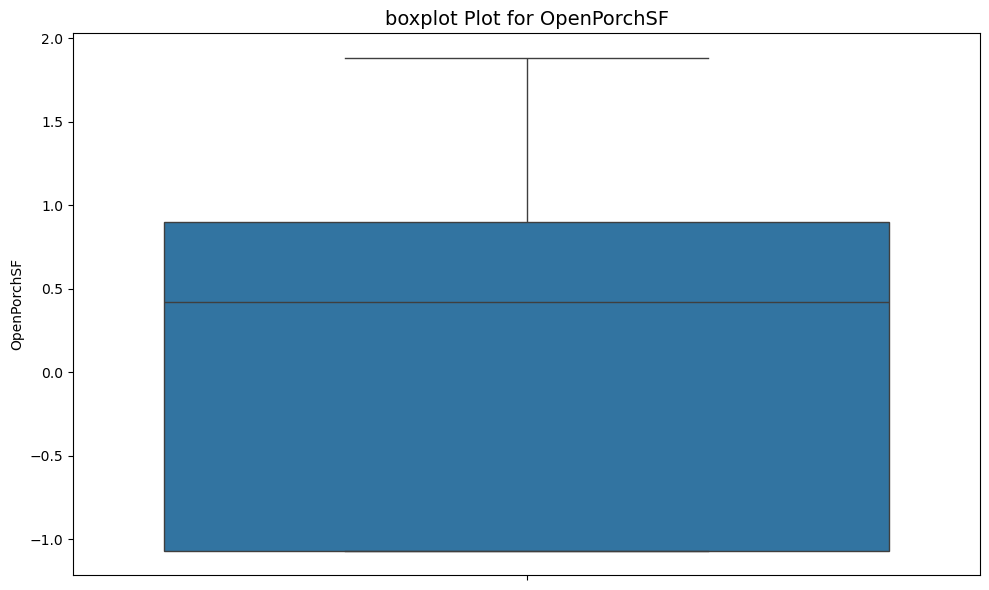

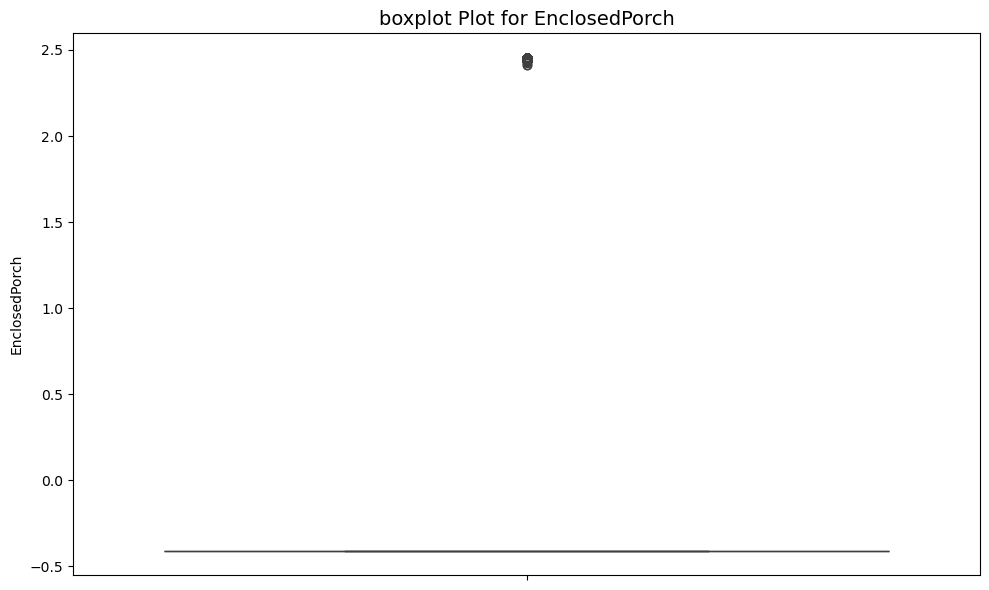

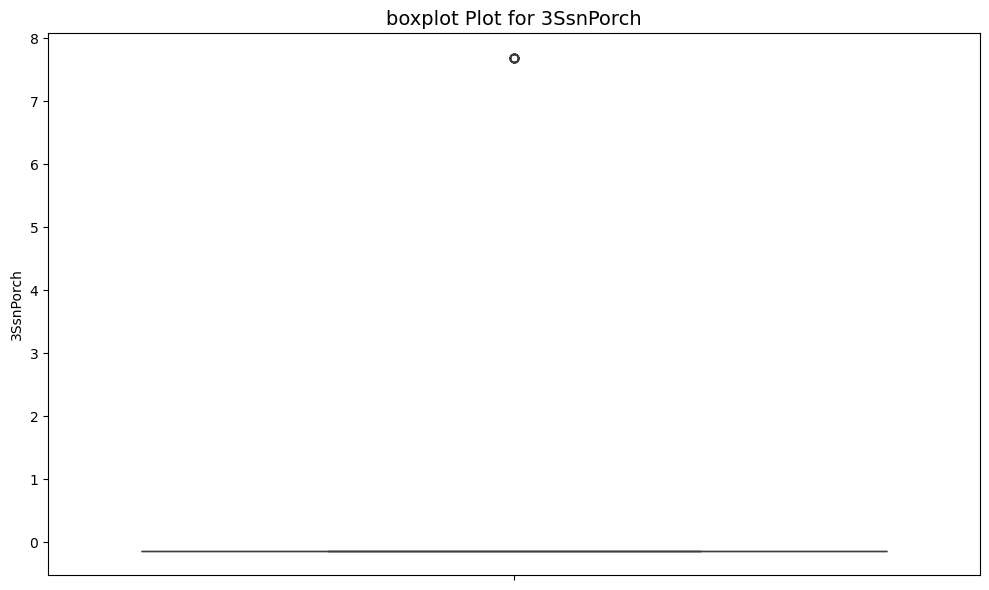

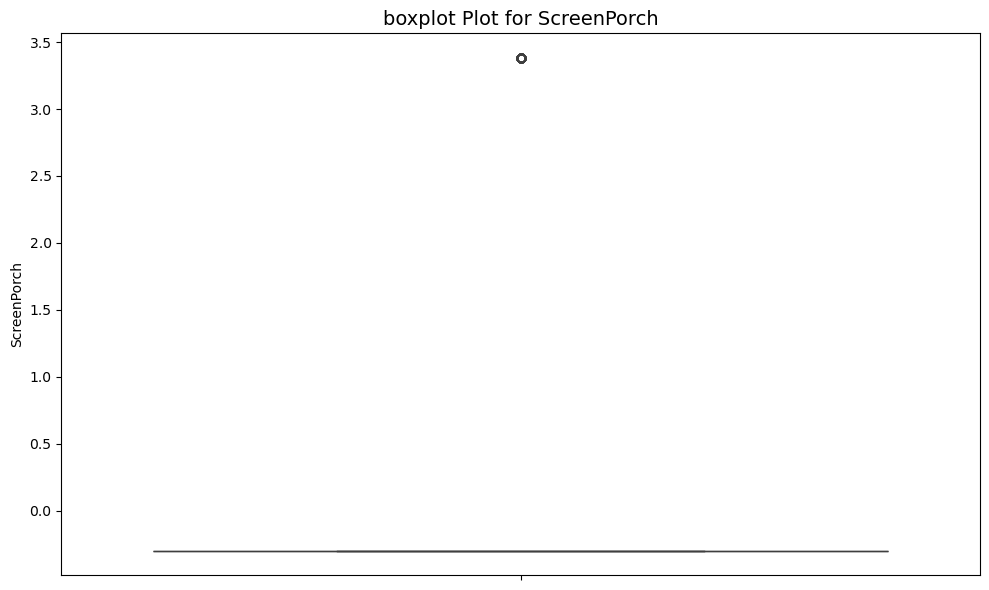

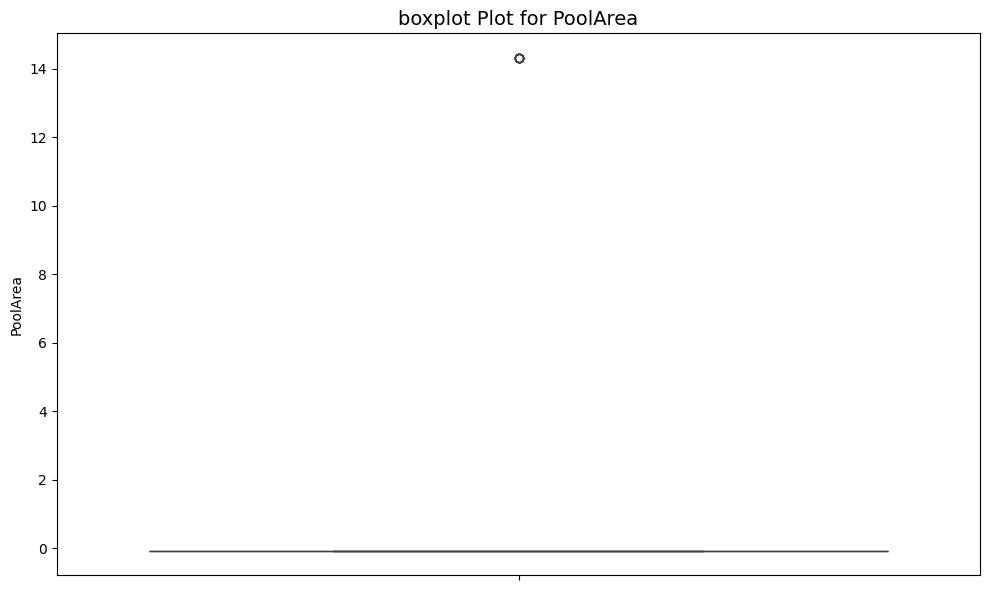

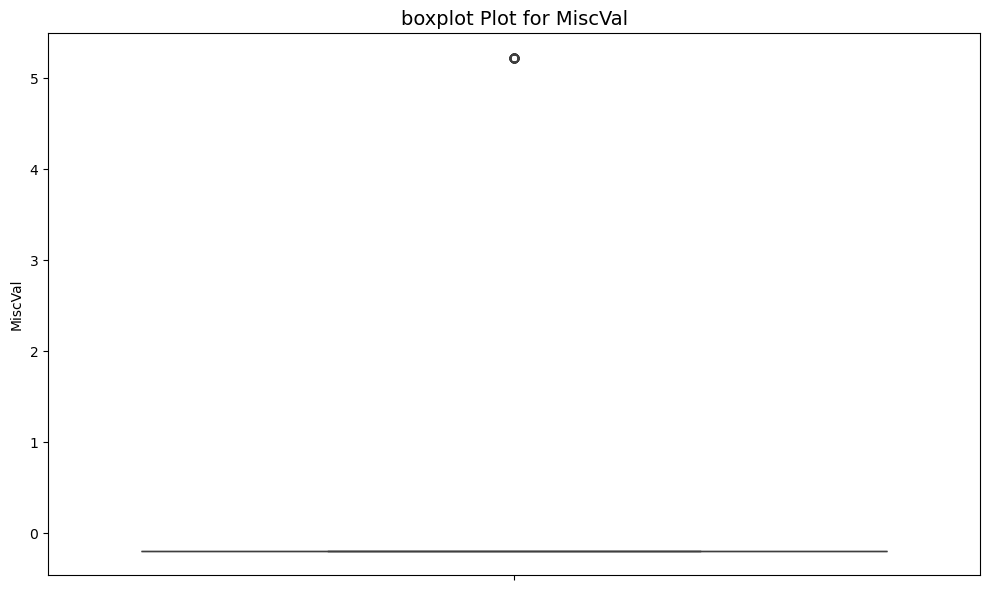

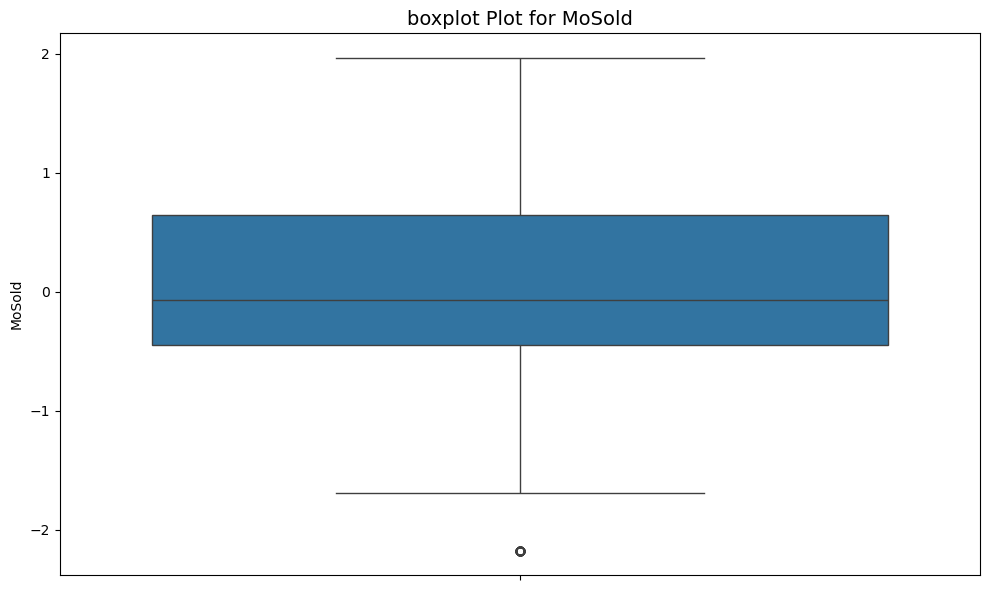

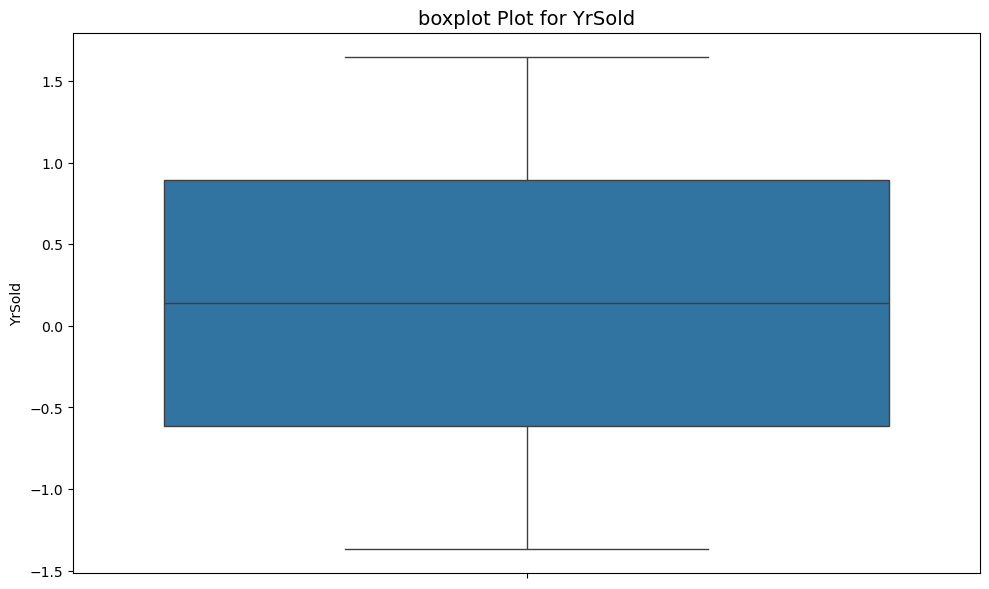

In [308]:
# Loop through each column in the DataFrame
col = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold']
for column in col:
    if np.issubdtype(X[column].dtype, np.number):  # Check if the column is numeric
        plt.figure(figsize=(10, 6))
        
        # KDE plot
        sns.boxplot(X[column])
        plt.title(f"boxplot Plot for {column}", fontsize=14)
    
        # plt.grid(alpha=0.3)
        plt.tight_layout()
        plt.show()

In [311]:
# Function to cap outliers using IQR
def cap_outliers_iqr(df):
    df_capped = df.copy()  # Make a copy to avoid modifying the original DataFrame

    # Loop through numeric columns and cap outliers based on IQR
    for column in df_capped.select_dtypes(include=[np.number]).columns:
        Q1 = df_capped[column].quantile(0.25)
        Q3 = df_capped[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Cap values outside the bounds to the lower or upper bound
        df_capped[column] = np.clip(df_capped[column], lower_bound, upper_bound)

    return df_capped

In [316]:
X_new = cap_outliers_iqr(X)

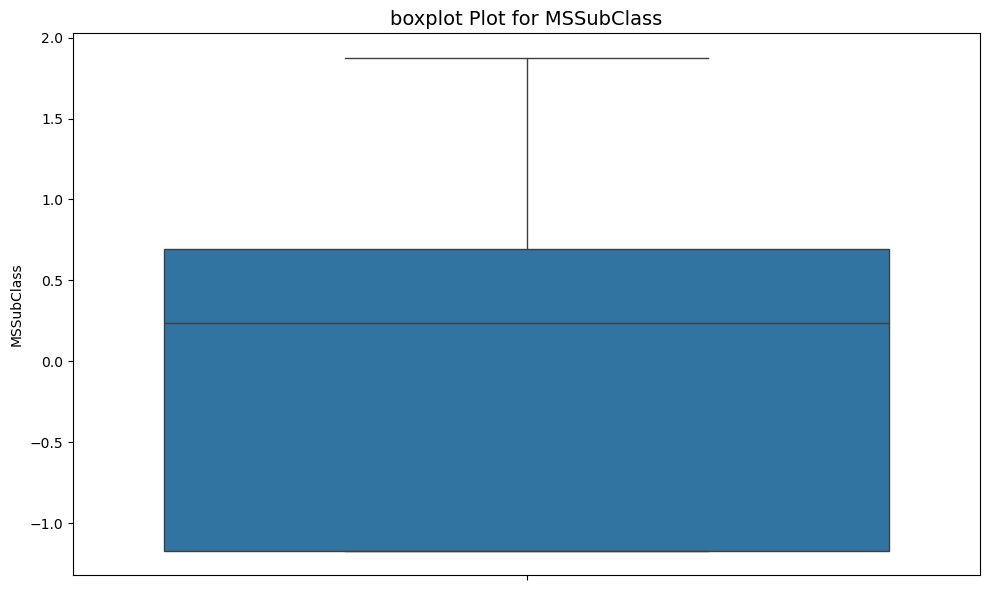

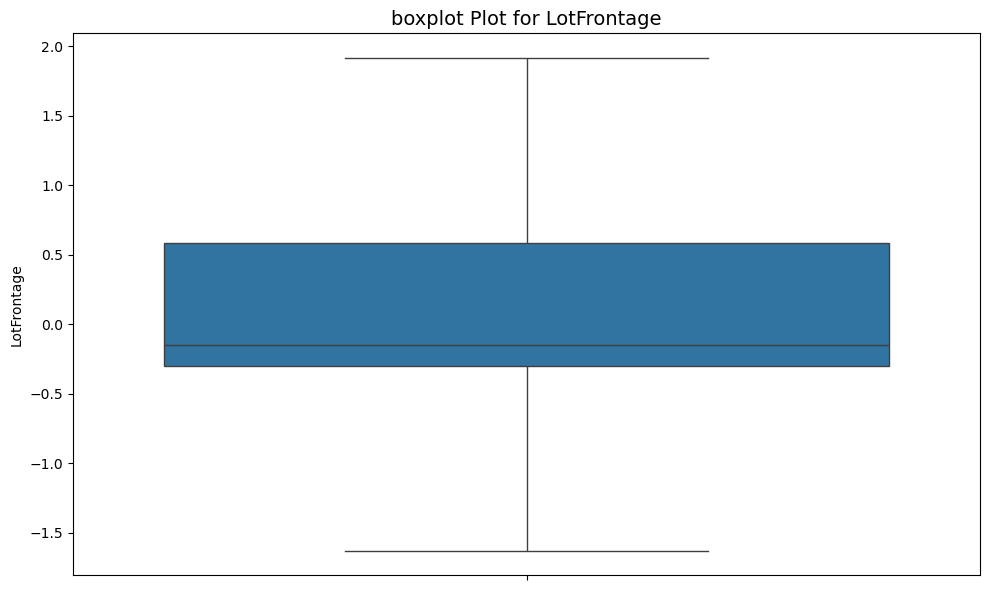

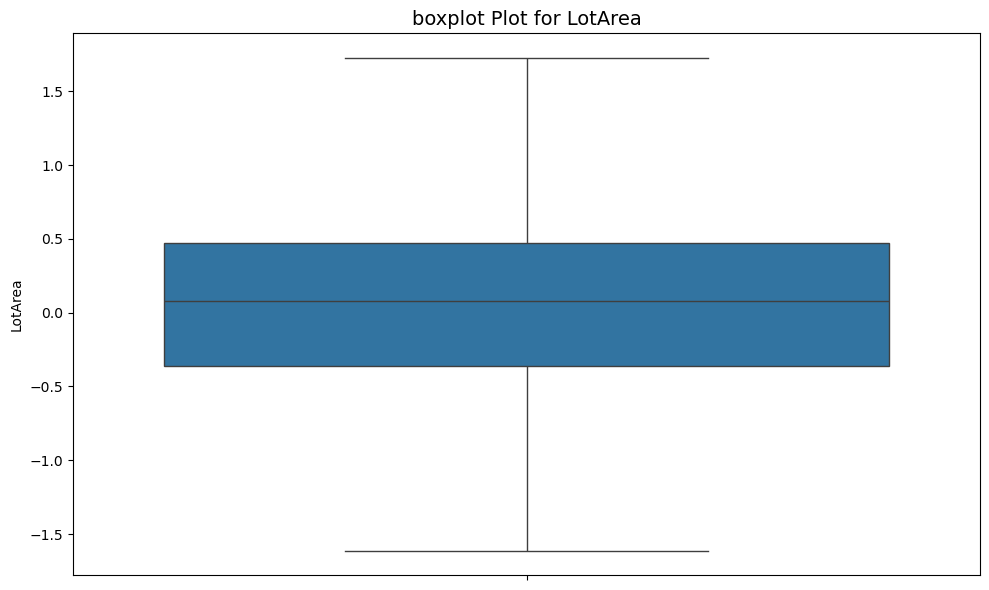

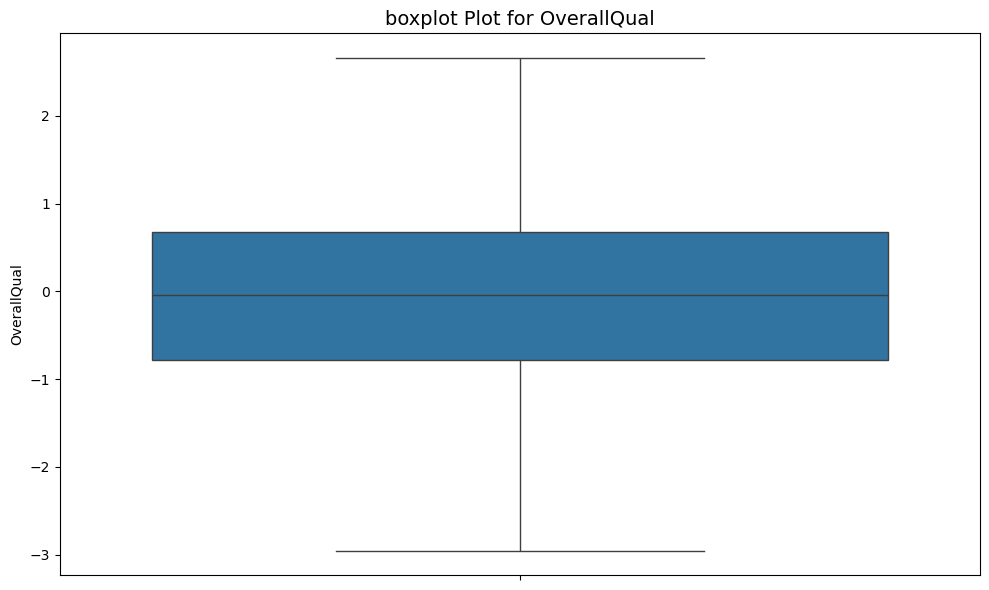

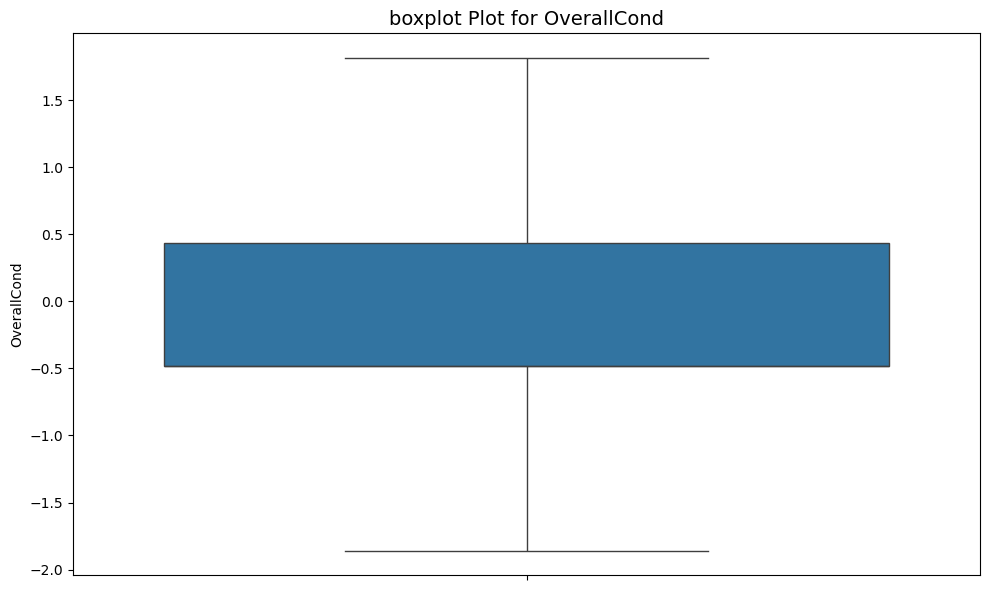

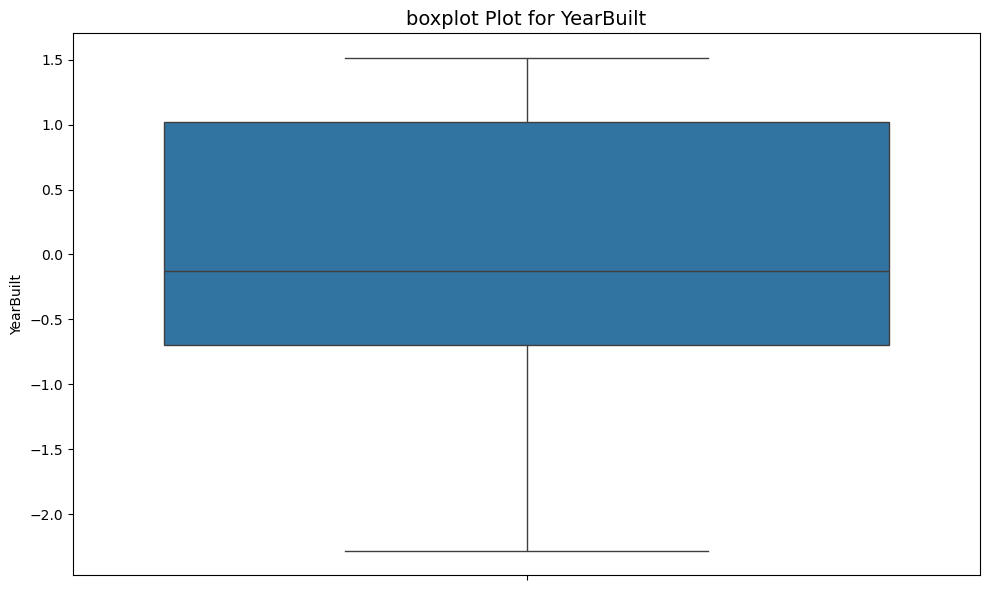

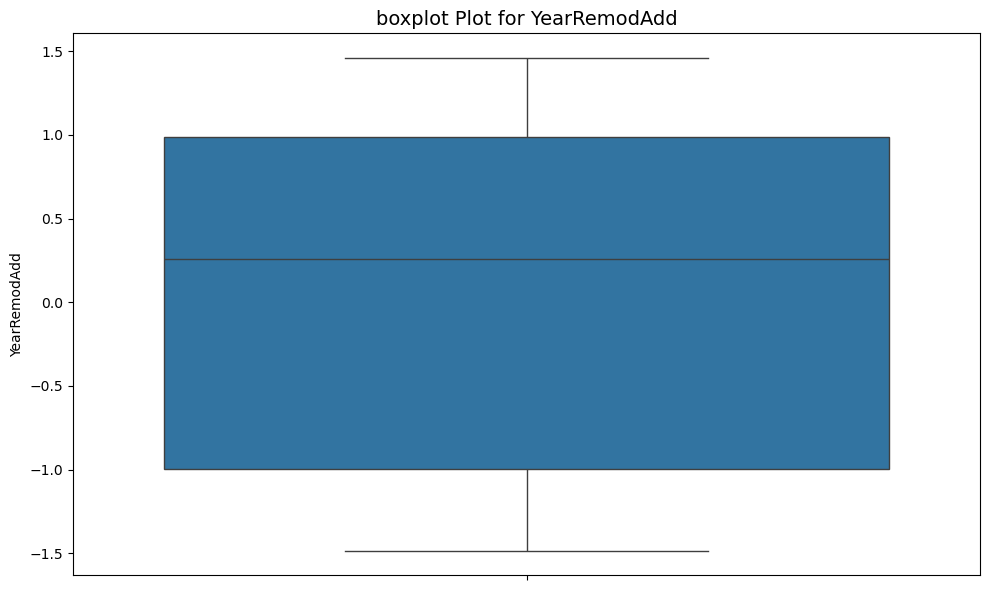

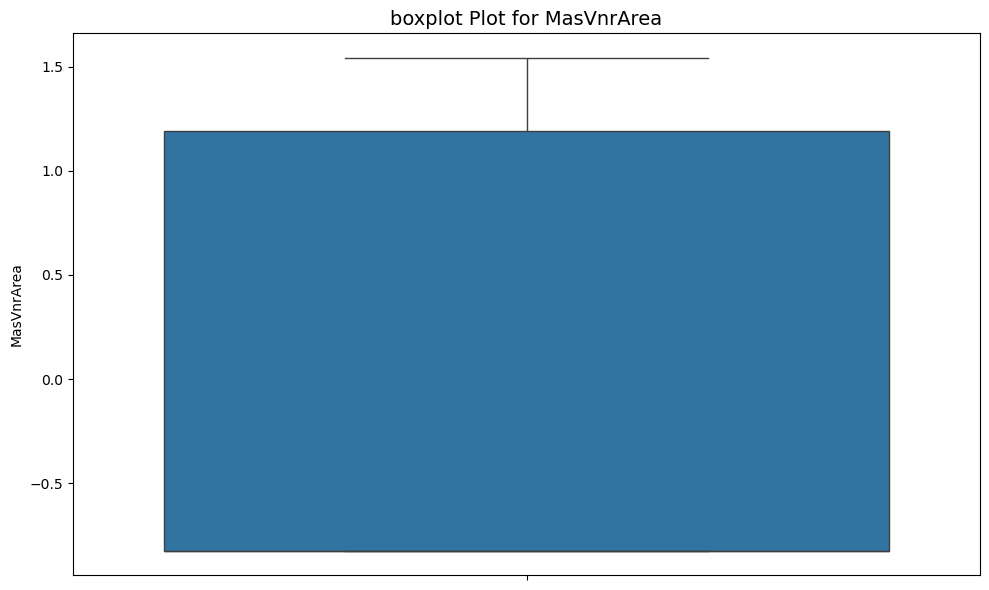

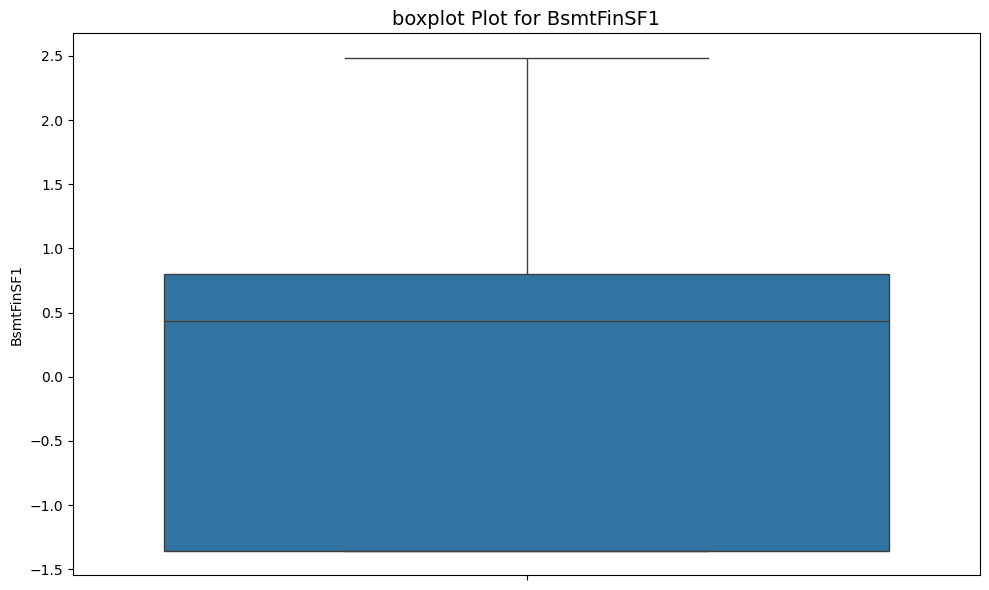

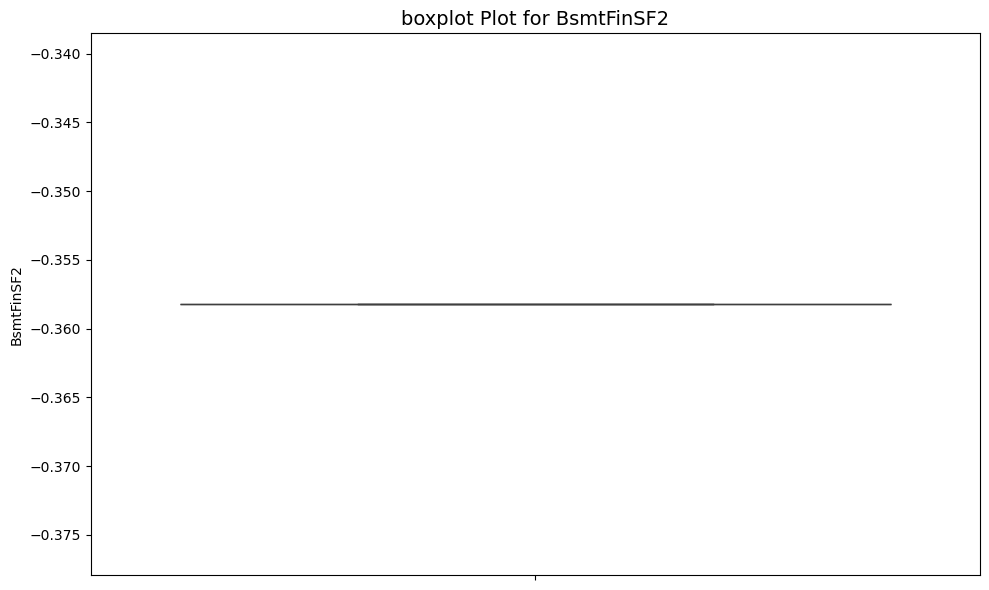

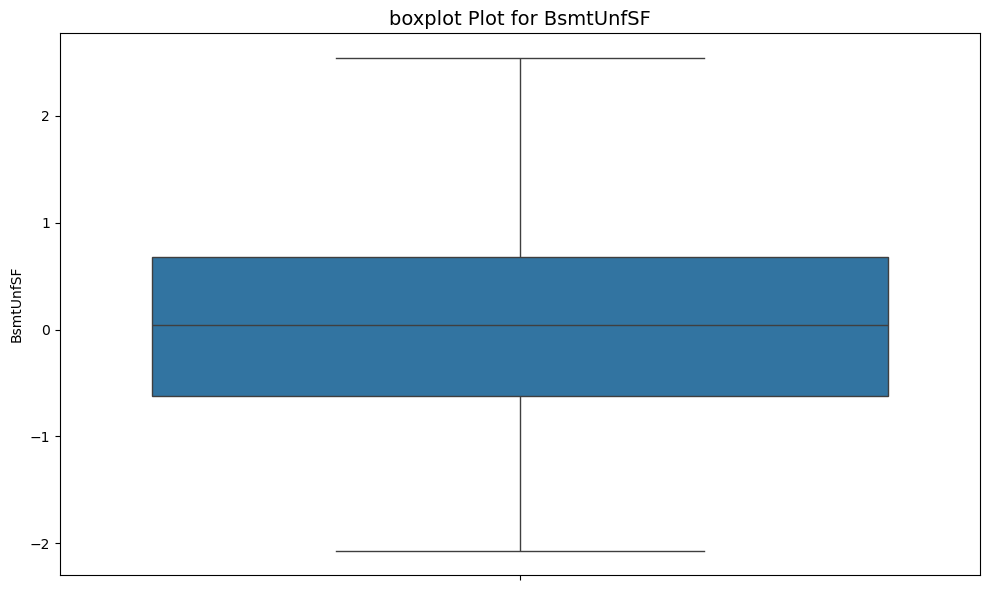

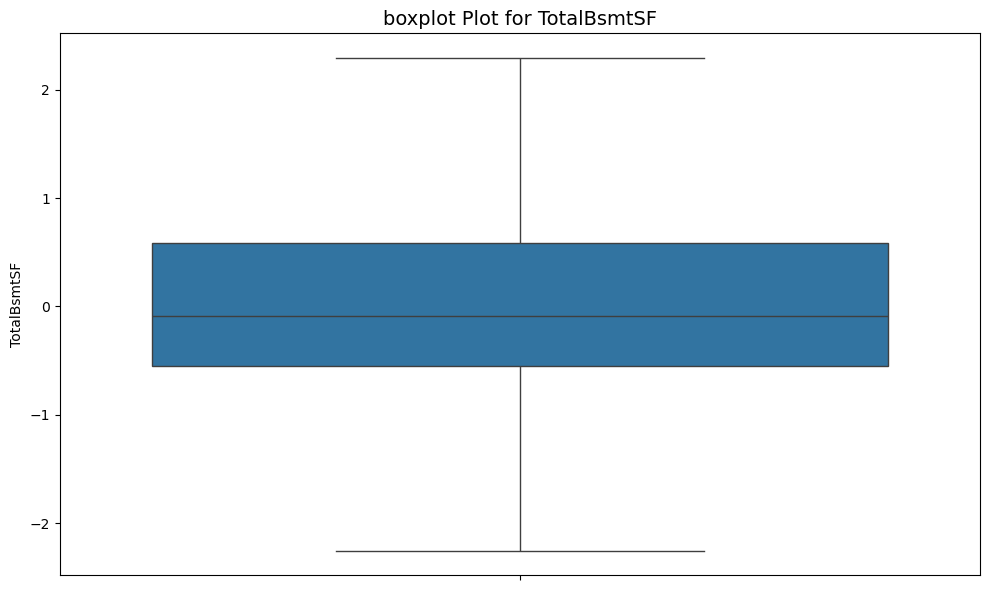

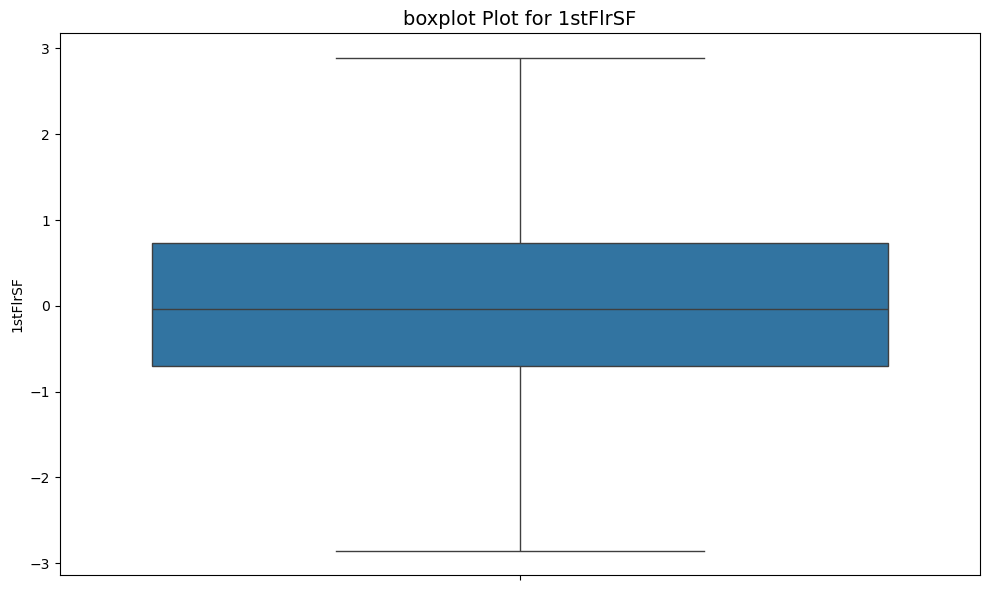

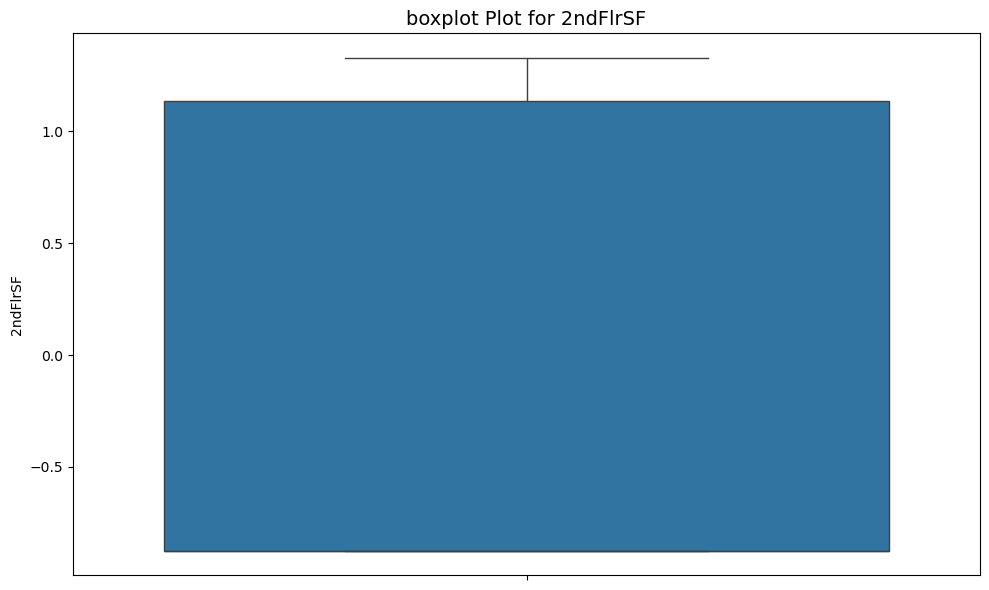

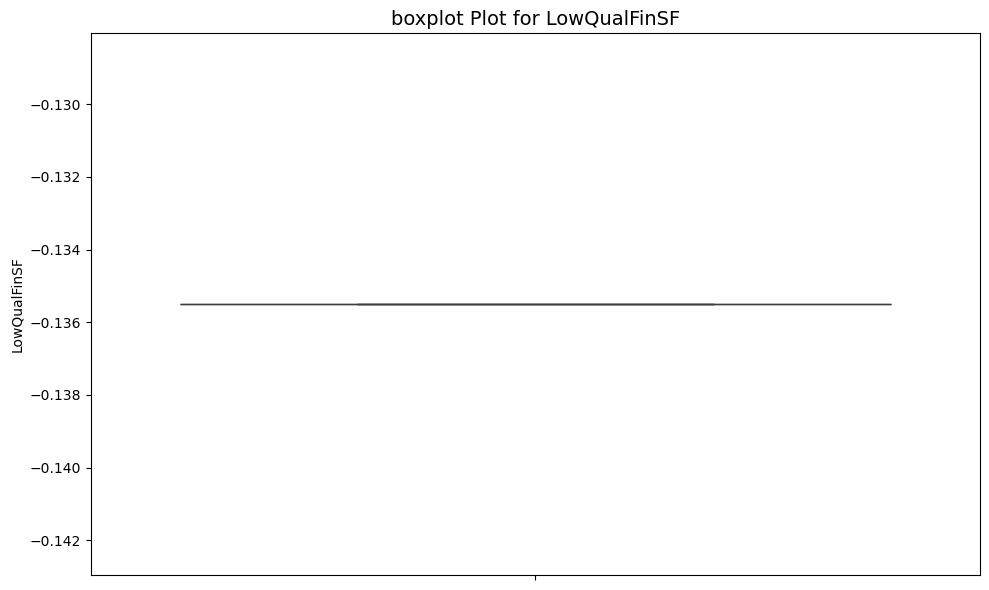

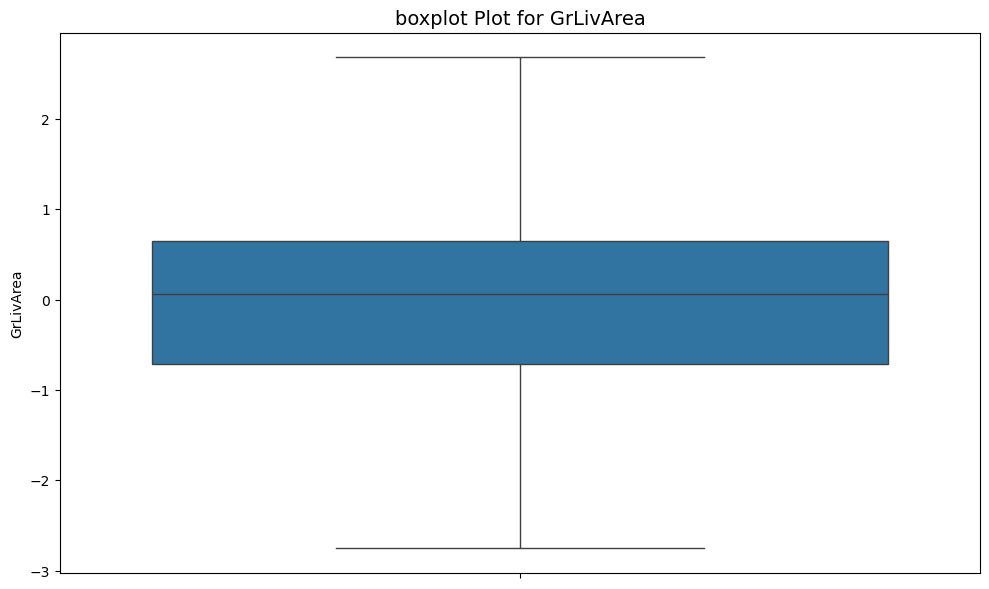

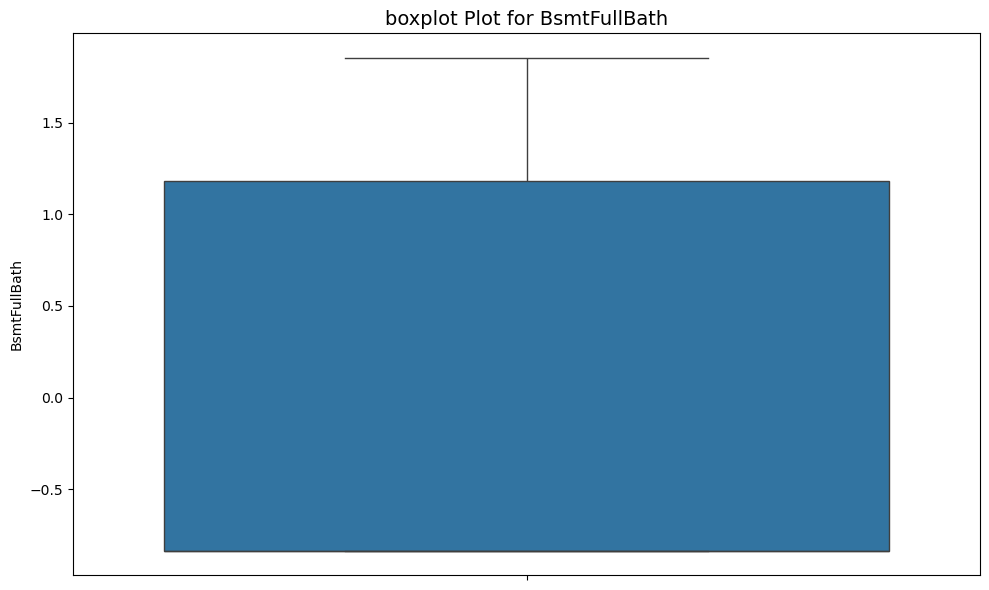

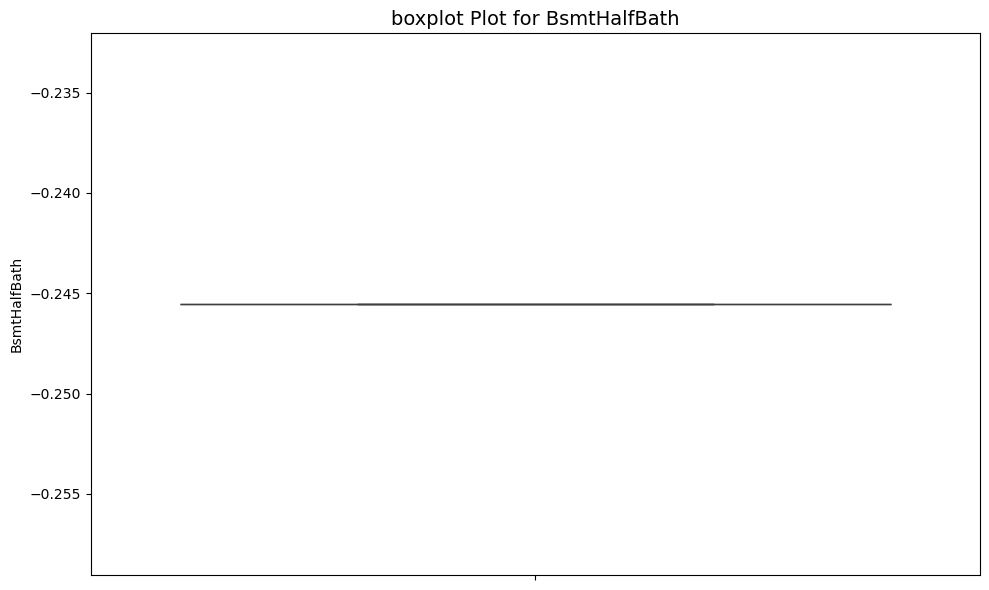

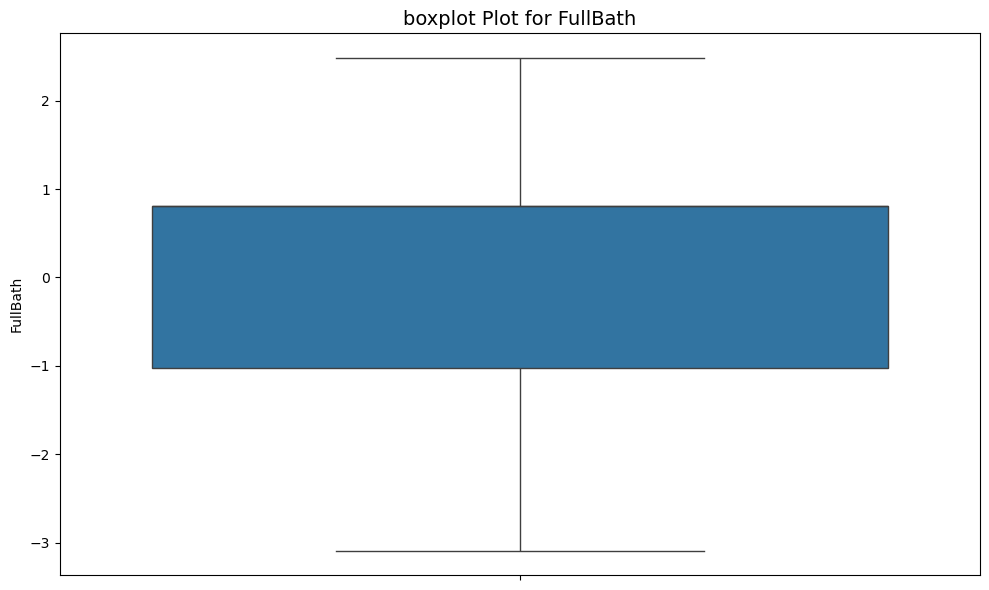

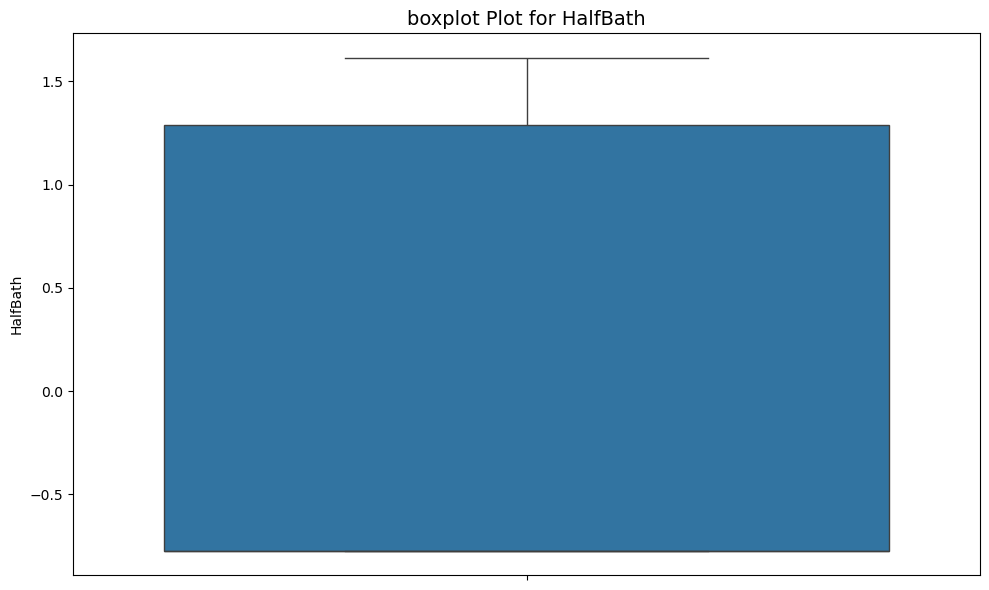

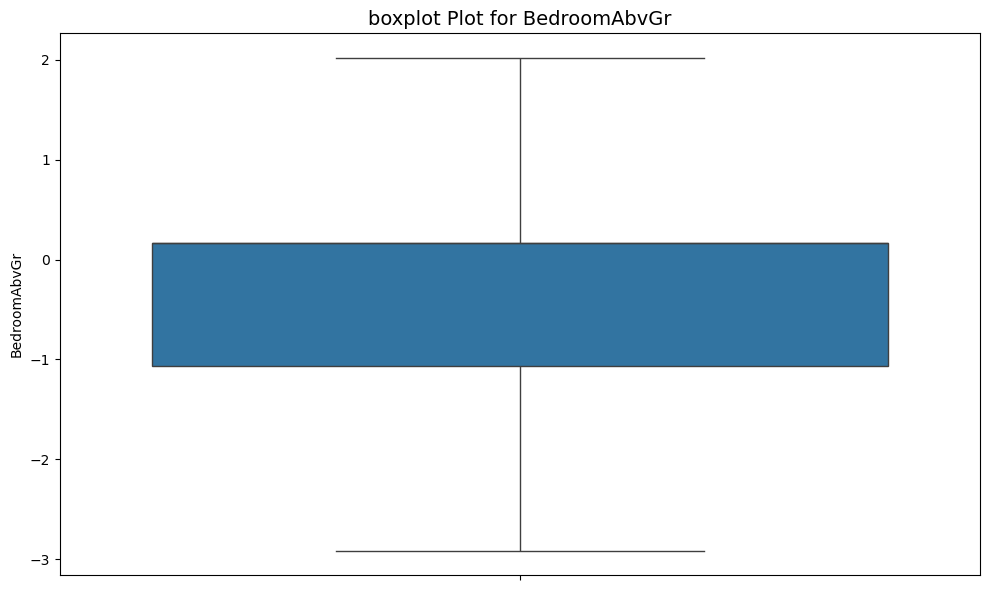

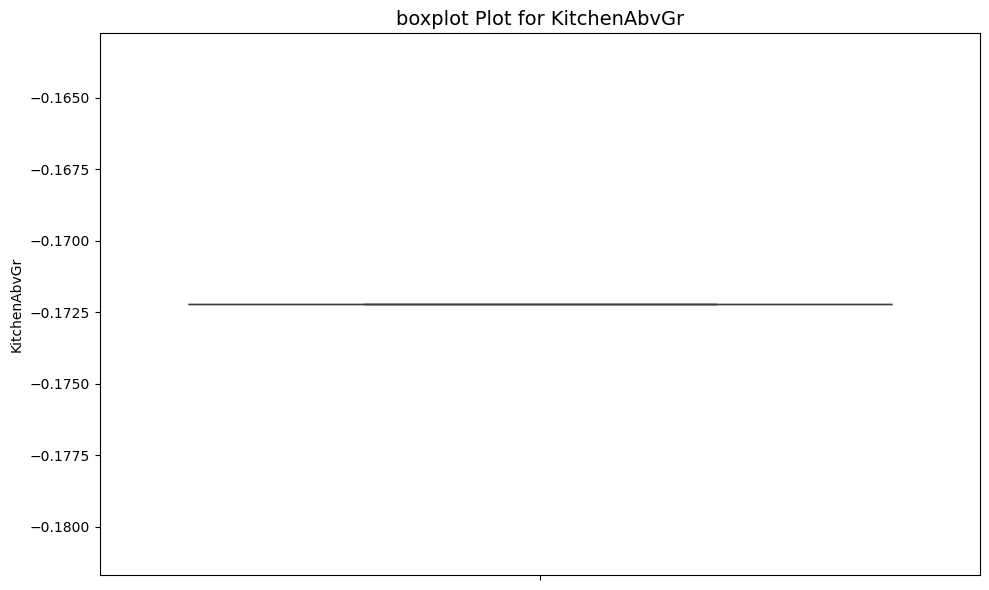

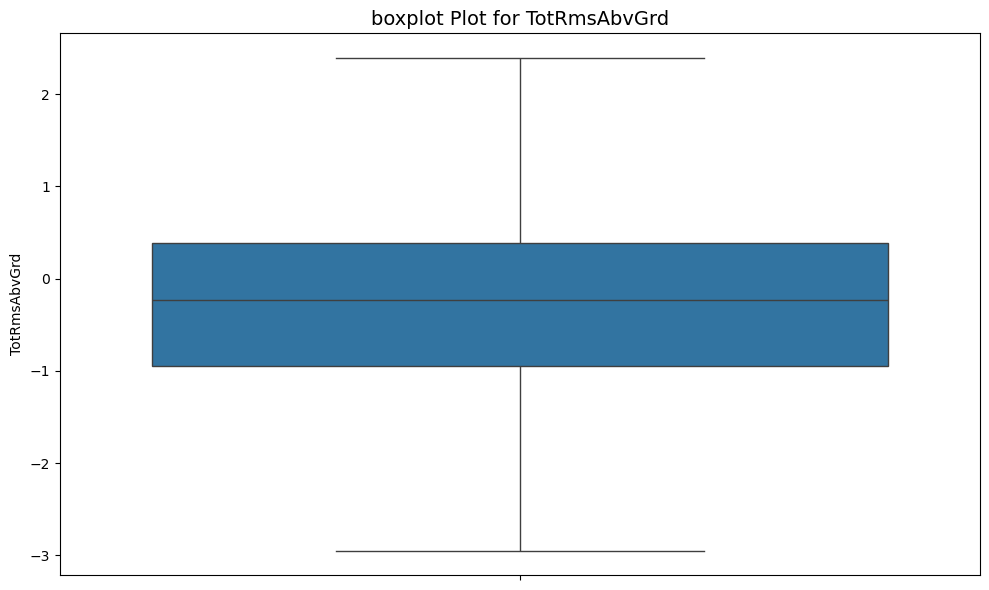

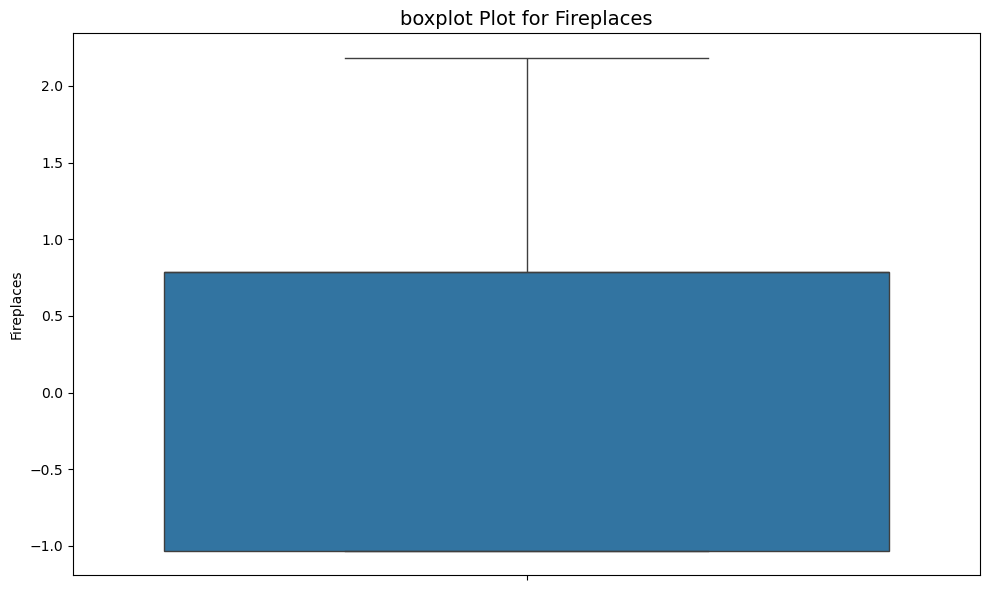

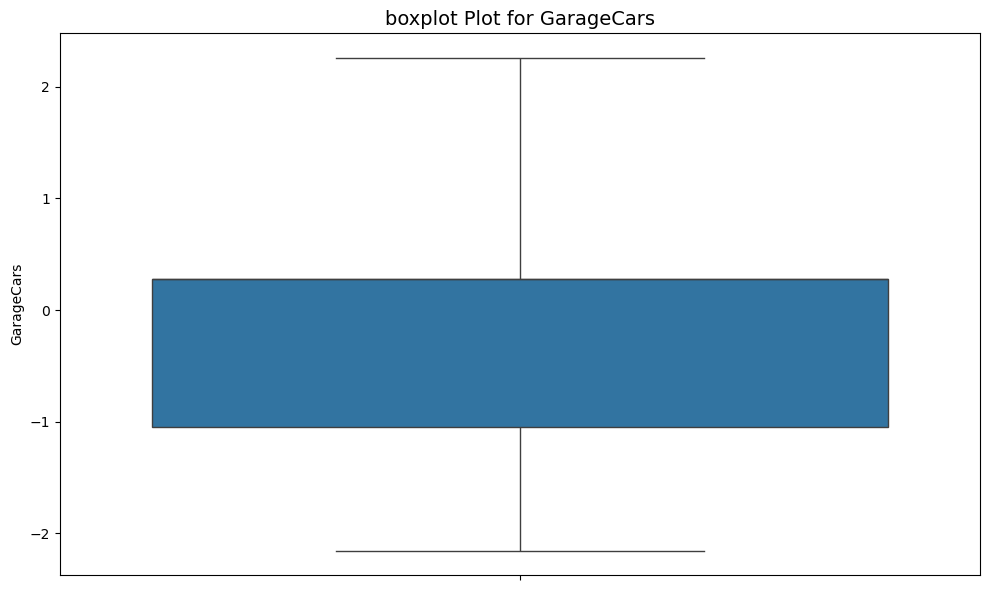

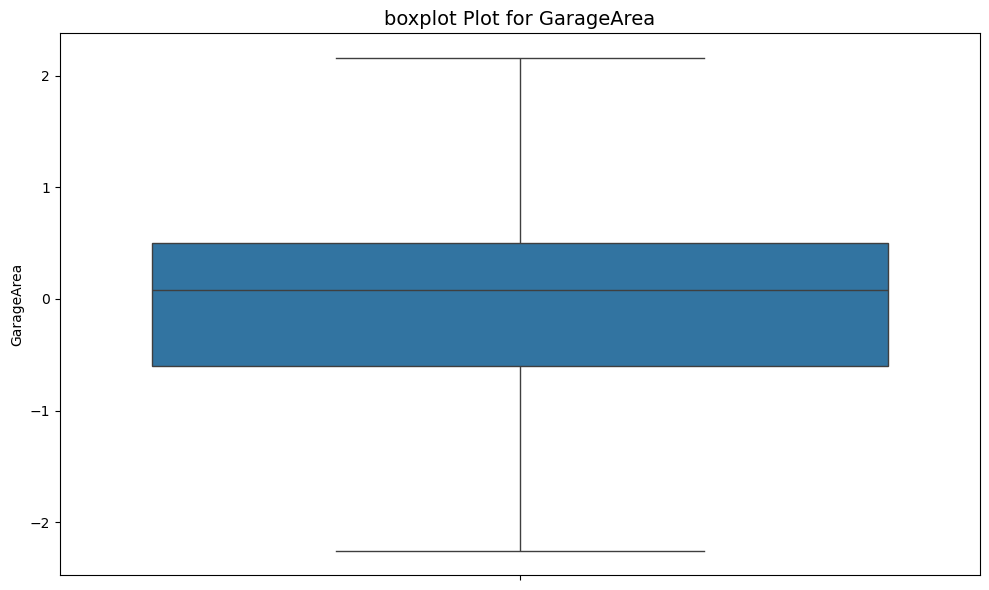

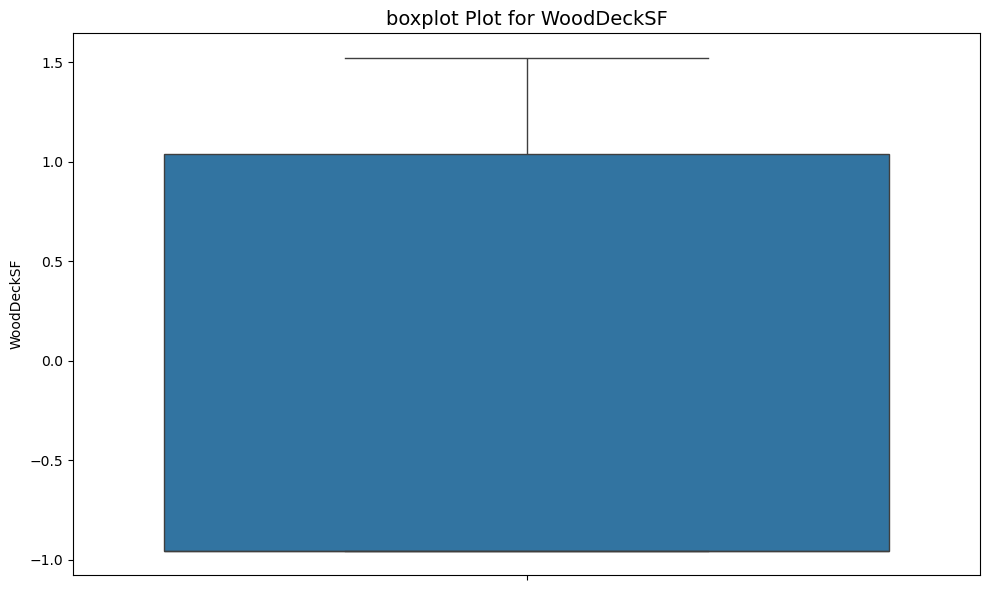

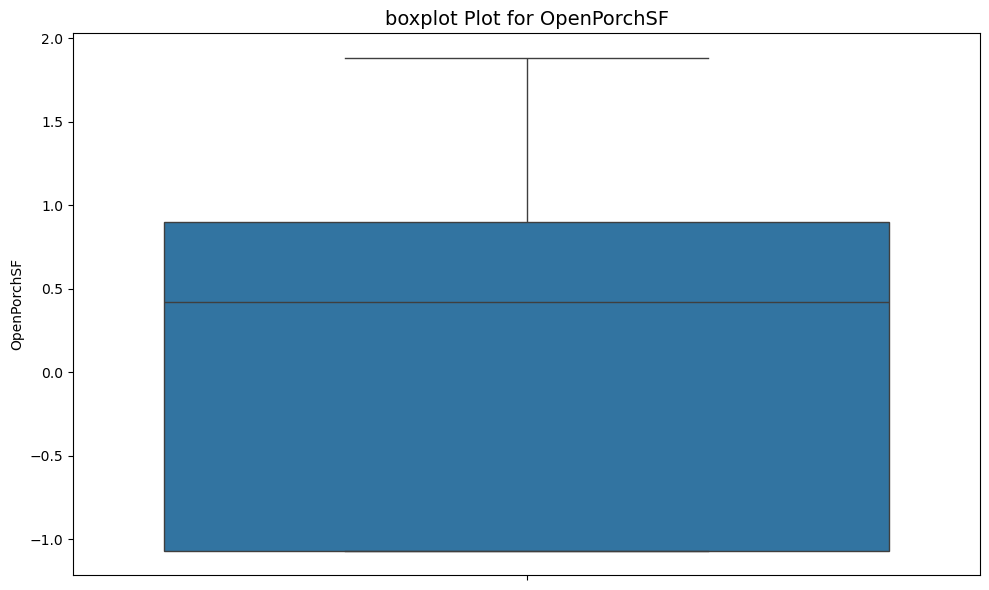

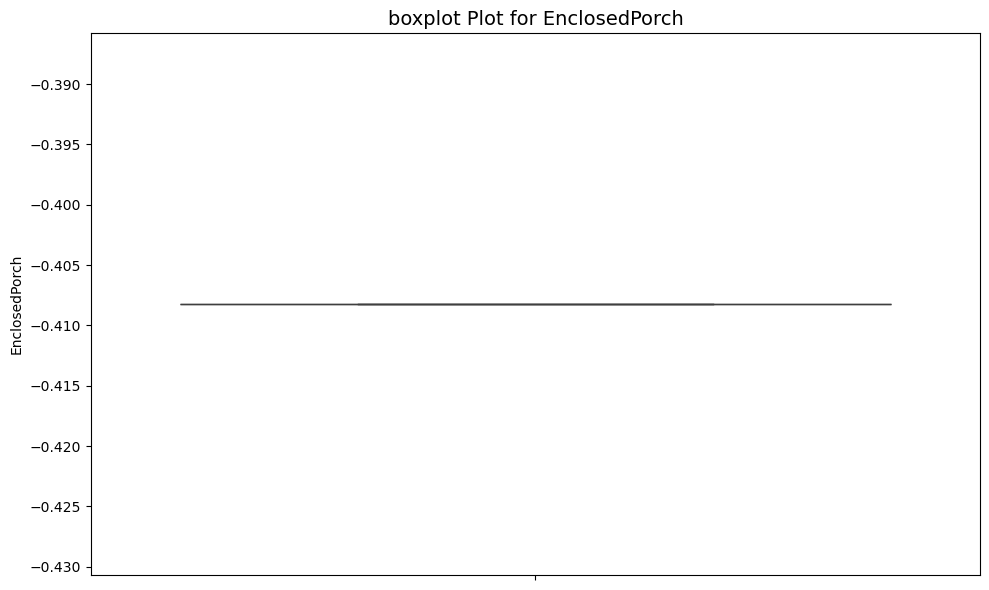

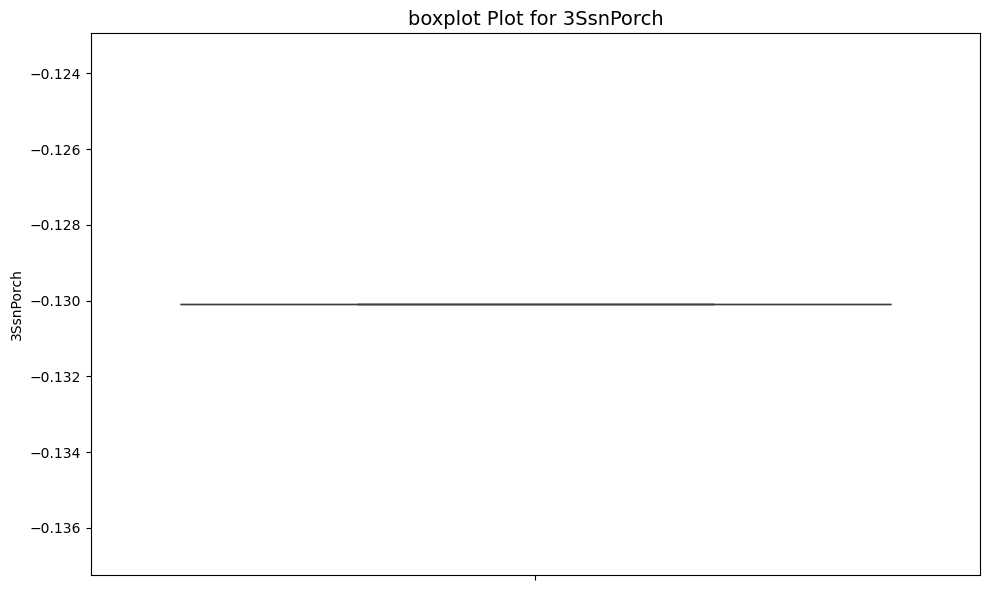

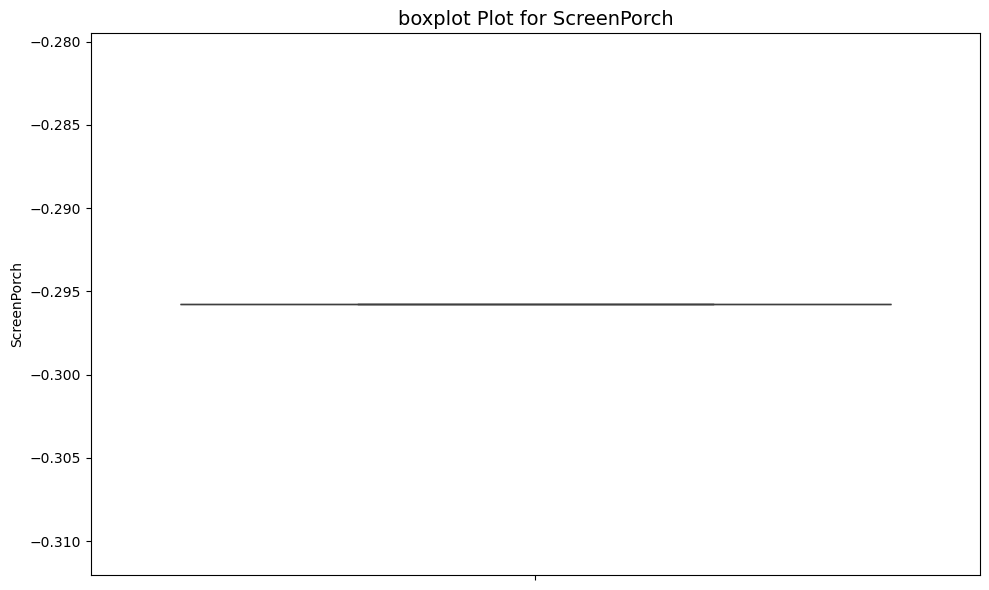

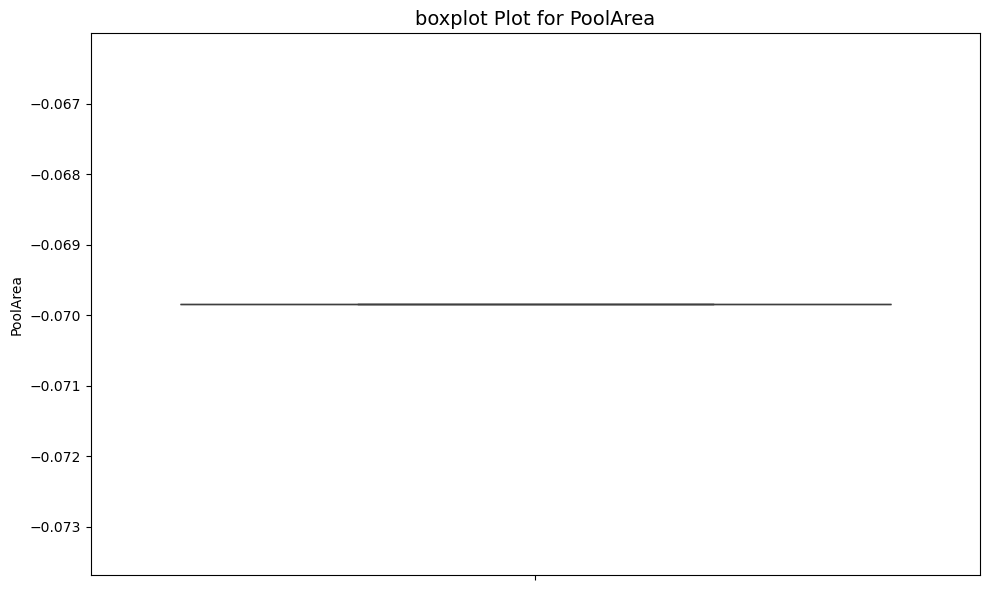

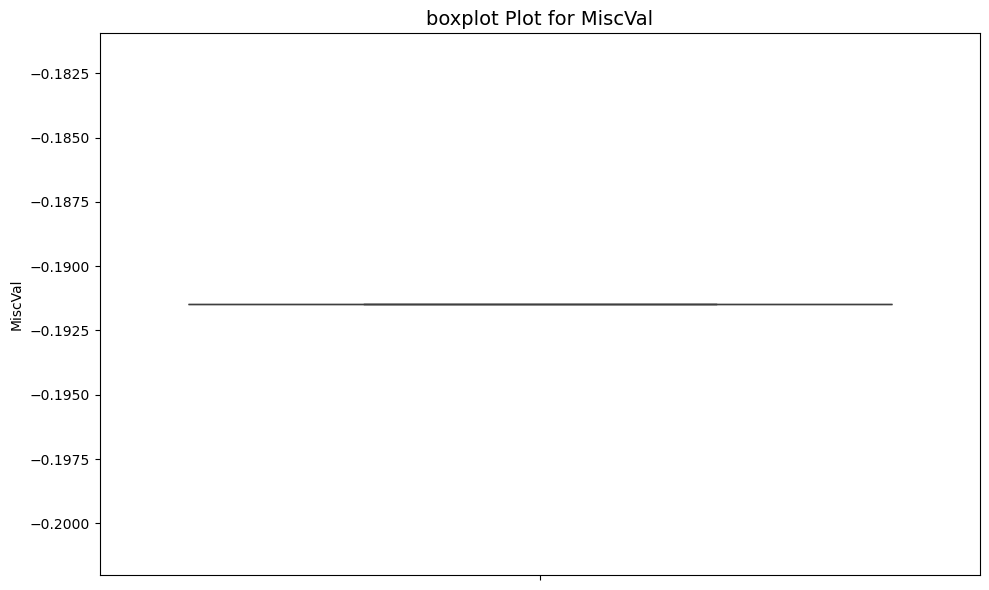

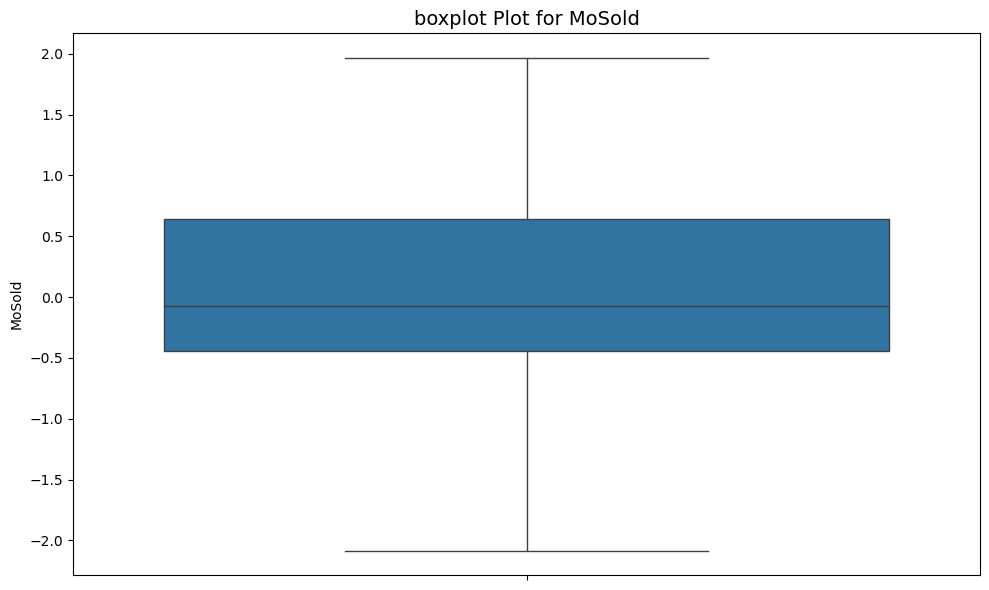

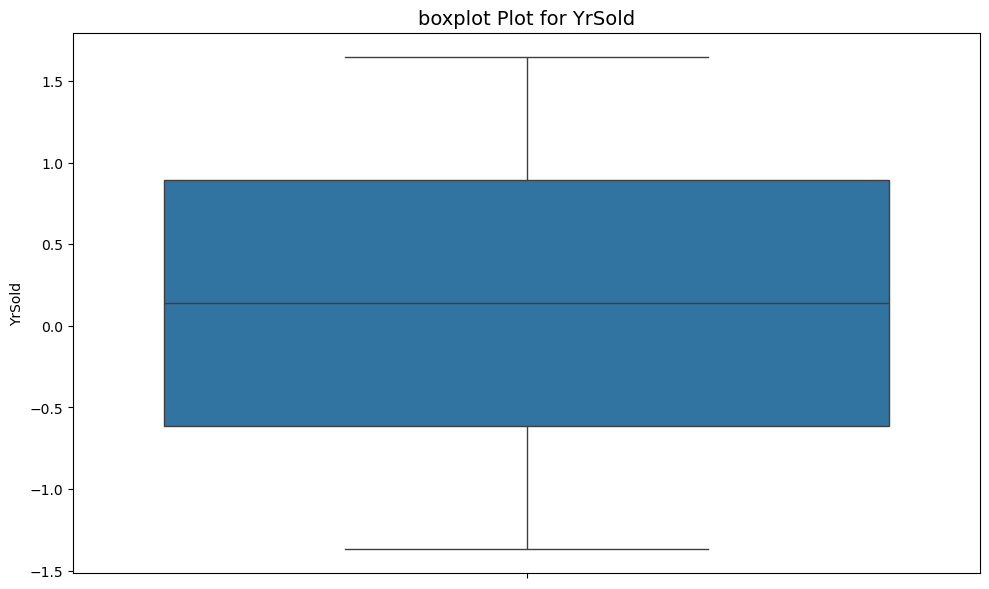

In [318]:
# Loop through each column in the DataFrame
col = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold']
for column in col:
    if np.issubdtype(X_new[column].dtype, np.number):  # Check if the column is numeric
        plt.figure(figsize=(10, 6))
        
        # KDE plot
        sns.boxplot(X_new[column])
        plt.title(f"boxplot Plot for {column}", fontsize=14)
    
        # plt.grid(alpha=0.3)
        plt.tight_layout()
        plt.show()

# Train test split

In [320]:
X_train,X_test,y_train,y_test = train_test_split(X_new,y,test_size=0.2,random_state=42)

In [323]:
X_train.shape , X_test.shape

((1153, 206), (289, 206))

In [325]:
y_train.shape,y_test.shape

((1153,), (289,))

# Scale the values

## scale train

In [329]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## scale test

In [332]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()

# sc.fit(y_train)

# y_train_scaled = sc.transform(y_train)
# y_test_scaled = sc.transform(y_test)

# Fit the model

In [335]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [337]:
model = LinearRegression()

In [339]:
model.fit(X_train_scaled, y_train)

LinearRegression()

In [341]:
y_pred = model.predict(X_test_scaled)
y_pred_train = model.predict(X_train_scaled)

In [343]:
r2 = r2_score(y_test, y_pred)
print(f'R-squared(test accuracy): {r2}')
r2_t = r2_score(y_train, y_pred_train)
print(f'R-squared(train accuracy): {r2_t}')

R-squared(test accuracy): 0.7433153439552622
R-squared(train accuracy): 0.8283470247810489


In [345]:
from sklearn.linear_model import Ridge
R_clf = Ridge(alpha=1.0)

In [349]:
R_clf.fit(X_train_scaled, y_train)

Ridge()

In [351]:
y_pred_r_train = R_clf.predict(X_train_scaled)
y_pred_r_test = R_clf.predict(X_test_scaled)

In [353]:
score_train = r2_score(y_pred_r_train,y_train)
score_test = r2_score(y_pred_r_test,y_test)
print('Train accuracy : ',score_train," Test accuracy : ",score_test)

Train accuracy :  0.7926083741106091  Test accuracy :  0.7143858026681961


In [355]:
from sklearn.model_selection import cross_val_score
# Perform cross-validation and calculate mean R^2 score
r2_scores = cross_val_score(model, X_train_scaled, y_train, cv=10, scoring='r2')
print("Mean R^2 Score:", np.mean(r2_scores))

# Display individual R^2 scores
print("R^2 Scores:", r2_scores)

Mean R^2 Score: 0.8150403898776322
R^2 Scores: [0.81211706 0.77108988 0.86703635 0.83988262 0.80350884 0.73005216
 0.84055191 0.78448718 0.83521818 0.86645972]


In [357]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

ridge = Ridge(alpha=1.0)  # Start with alpha=1.0, tune using GridSearchCV
scores = cross_val_score(ridge, X_train_scaled, y_train, cv=10, scoring='r2')
print("Ridge Mean R^2:", scores.mean())


Ridge Mean R^2: 0.8154504187065662


# using Neural networks

In [360]:
from keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [364]:
# Build advanced neural network
model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),  # Ensure this matches X_train_encoded
    Dense(400, kernel_initializer='he_uniform', activation='relu'),
    Dense(200, kernel_initializer='he_uniform', activation='relu'),
    Dense(100, kernel_initializer='he_uniform', activation='relu'),
    Dense(80, kernel_initializer='he_uniform', activation='relu'),
    Dense(50, kernel_initializer='he_uniform', activation='relu'),
    Dense(10, kernel_initializer='he_uniform', activation='relu'),
    Dense(1, kernel_initializer='glorot_uniform', activation='linear')
])

In [366]:
# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mean_absolute_error'])

In [368]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 400)                 │          82,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 200)                 │          80,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 100)                 │          20,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 80)                  │           8,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 50)                  │           4,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             510 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 195,751 (764.65 KB)

 Trainable params: 195,751 (764.65 KB)

 Non-trainable params: 0 (0.00 B)

In [370]:
# Fitting the ANN to the Training set
model_history = model.fit(X_train_scaled, y_train, validation_split=0.33, batch_size=10, epochs=100)

Epoch 1/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 38309933056.0000 - mean_absolute_error: 177740.5938 - val_loss: 5573770240.0000 - val_mean_absolute_error: 63322.1172
Epoch 2/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2997908992.0000 - mean_absolute_error: 40357.4492 - val_loss: 1083833728.0000 - val_mean_absolute_error: 24768.9668
Epoch 3/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1180492928.0000 - mean_absolute_error: 24447.6660 - val_loss: 891059968.0000 - val_mean_absolute_error: 21923.2871
Epoch 4/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 621896320.0000 - mean_absolute_error: 18082.1484 - val_loss: 903710336.0000 - val_mean_absolute_error: 22169.2891
Epoch 5/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 739954752.0000 - mean_absolute_error: 19343.3750 - val_loss: 958782848.0000 - val_mean_absolute_error: 22704.7246
Epoch 6/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 555024512.0000 - mean_absolute_error: 17146.8125 - val_loss: 81656352

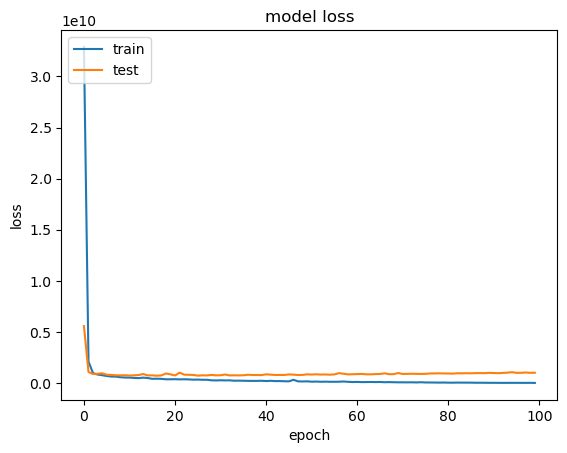

In [371]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])


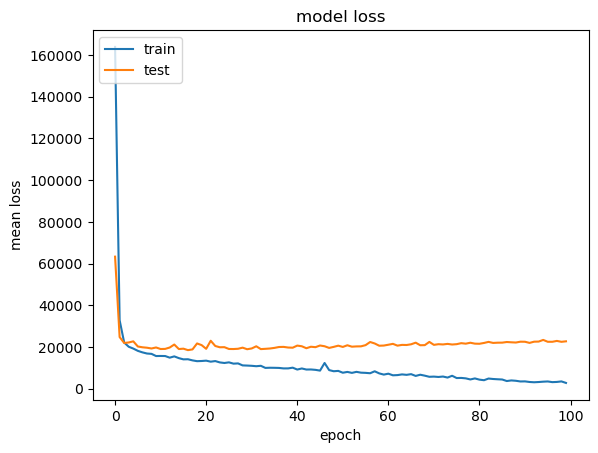

In [372]:
# list all data in history

print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['mean_absolute_error'])
plt.plot(model_history.history['val_mean_absolute_error'])
plt.title('model loss')
plt.ylabel('mean loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [373]:
# Predicting the Test set results
y_result = model.predict(X_test_scaled)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [374]:
from sklearn.metrics import mean_squared_error, r2_score
score_test_l = r2_score(y_result,y_test)
print(" Test accuracy : ",score_test_l)

 Test accuracy :  0.6604825854301453
